In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt   
import pandas as pd
import random
import numpy as np
from tqdm import tqdm
from tqdm import tnrange, tqdm_notebook
from time import sleep
import scipy
import operator
import difflib
import math

import scipy as sp
import datetime
import networkx as nx

from IPython.core.display import display,HTML
display(HTML("<style>.container { width:100% !important; }</style>"))  # to make the notebook use the entire width of the browser



try:
    import cPickle as pickle     #it is faster than pickle!
except:
    import pickle
    
import unicodedata
import networkx as nx
import itertools
import seaborn as sns   ### https://seaborn.pydata.org/tutorial/categorical.html
import time  



import plotly.plotly as py
from plotly.graph_objs import *

# i only need my credentials if i want to plot online --- and send plots to server (limits per day apply!)
#import plotly.tools as tls
#tls.set_credentials_file(username='juliettapc', api_key='deyNIvtOoDZ5PLmrHlhd')  # my plotly account credentials


import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout




########## to be able to plot offline (without sending the plots to the plotly server every time)
import plotly.offline as offline
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
################



##### for getting geolocation data  and to calculate distance between two geolocations
import requests
import json
import geopy.distance   




In [4]:
df=pd.read_csv('/home/juliaponcela/at_NICO/Supply_networks/Results/Simplified_stata_file_Pinf_vs_mulitiple_variables_monthly_slicing_dropped_overlaps_randomly_from_list_SORTED_CHRONOLOGICALLY.csv', 
                   sep=' ',parse_dates=['start_date_trans','end_date_trans'],low_memory=False)

In [10]:
# dict_mID_time_series={}
# dict_cID_time_series={}



dict_mID_time_series = pickle.load(open("/home/juliaponcela/at_NICO/Supply_networks/Results/dict_mID_time_series.pickle")) 
print len(dict_mID_time_series)
    

 
dict_cID_time_series = pickle.load(open("/home/juliaponcela/at_NICO/Supply_networks/Results/dict_cID_time_series.pickle")) 
print len(dict_cID_time_series)



169
162


P_inf        Mi        Cj            Mi_Cj  MCJ  num_trans  \
0           0    102428  20590538  102428_20590538    1          1   
1           1   2701078    402001   2701078_402001    1          2   
2           0   2701078    403431   2701078_403431    1          1   
3           0   2701078    403477   2701078_403477    1          1   
4           0   2701078    405851   2701078_405851    1          1   
5           0   2701078    408451   2701078_408451    1          1   
6           0   2701078    408591   2701078_408591    1          1   
7           0   2701078    409157   2701078_409157    1          1   
8           0   2701078   5212219  2701078_5212219    1          1   
9           0   3200280   1000019  3200280_1000019    1          1   
10          0   9101020   1000019  9101020_1000019    1          1   
11          0    504622    511951    504622_511951    1          1   
12          0   9101366   1000019  9101366_1000019    1          1   
13          0   2700530   2700542  2700530_2700542    1          1   
14          0    601101    405656    601101_405656    1          1   
15          0    504208    510105    504208_510105    4          1   
16          0    502509    516879    502509_516879    1          1   
17          0  19000783    513684  19000783_513684    2          1   
18          0   2700190   2700177  2700190_2700177    1          1   
19          0   2700190   2700189  2700190_2700189    1          1   
20          0   2700190   2700207  2700190_2700207    1          1   
21          0   2700190   2701111  2700190_2701111    1          1   
22          0   2700256   2700268  2700256_2700268    2          1   
23          0   2700256   2700271  2700256_2700271    4          1   
24          0   2700256   2700281  2700256_2700281    2          1   
25          0   2700611   2700608  2700611_2700608    1          1   
26          0    600416    512862    600416_512862    1          1   
27          0    600416    700836    600416_700836    1          1   
28          0    801148    801151    801148_801151    3          1   
29          0    801148    801161    801148_801161    1          1   
...       ...       ...       ...              ...  ...        ...   
282134      0    703370    703394    703370_703394    1          2   
282135      0    703370    703400    703370_703400    1          2   
282136      0    703370    703552    703370_703552    1          1   
282137      0    703461    703473    703461_703473    4          2   
282138      0    703461    703485    703461_703485    2          2   
282139      0    703461    703497    703461_703497    2          2   
282140      0    703370    703382    703370_703382    1          2   
282141      0    703370    703394    703370_703394    1          2   
282142      0    703370    703400    703370_703400    1          2   
282143      0    703461    703473    703461_703473    4          2   
282144      0    703461    703485    703461_703485    2          2   
282145      0    703461    703497    703461_703497    2          2   
282146      0    703370    703382    703370_703382    1          2   
282147      0    703370    703394    703370_703394    1          2   
282148      0    703370    703400    703370_703400    1          2   
282149      0    703461    703473    703461_703473    4          2   
282150      0    703461    703485    703461_703485    2          2   
282151      0    703461    703497    703461_703497    2          2   
282152      0    703370    703382    703370_703382    1          2   
282153      0    703370    703394    703370_703394    1          2   
282154      0    703370    703400    703370_703400    1          2   
282155      0    703461    703473    703461_703473    4          2   
282156      0    703461    703485    703461_703485    2          2   
282157      0    703461    703497    703461_703497    2          2   
282158      0    703370    703382    703370_703382    1          2   
282159      0    7

In [6]:
list_jobbers_tot = pickle.load(open("/home/juliaponcela/at_NICO/Supply_networks/Results/List_jobbers_tot.dat")) 
print "# jobbers:",len(list_jobbers_tot)

# jobbers: 496


In [11]:
lista_m=[]
lista_c=[]

print "# jobbers:",len(list_jobbers_tot)

print 

for item in df.Mi:
    if item not in list_jobbers_tot:
        lista_m.append(int(item))
    
print len(lista_m)    
lista_m=list(set(lista_m))
print "# manuf.:",len(lista_m)


pickle_manuf="/home/juliaponcela/at_NICO/Supply_networks/Results/List_manufacturers_tot.dat"
pickle.dump(lista_m, open(pickle_manuf, 'wb'))
print "written:",pickle_manuf



print 
for item in df.Cj:
    if item not in list_jobbers_tot:
        lista_c.append(int(item))
    
      
print len(lista_c)    
lista_c=list(set(lista_c))
print "# contr.:",len(lista_c)  
pickle_contr="/home/juliaponcela/at_NICO/Supply_networks/Results/List_contractors_tot.dat"
pickle.dump(lista_c, open(pickle_contr, 'wb'))
print "written:",pickle_contr



# jobbers: 496

214691
# manuf.: 921
written: /home/juliaponcela/at_NICO/Supply_networks/Results/List_manufacturers_tot.dat

260477
# contr.: 7272
written: /home/juliaponcela/at_NICO/Supply_networks/Results/List_contractors_tot.dat


In [59]:
496+921+7272

#print type(lista_m[0])  # int


8689

In [6]:
df.columns


Index([u'P_inf', u'Mi', u'Cj', u'Mi_Cj', u'MCJ', u'num_trans',
       u'start_date_trans', u'start_time_trans', u'end_date_trans',
       u'end_time_trans', u'first_day_trans', u'last_day_trans',
       u'length_trans', u'period_end', u'first_date_mi_cj',
       u'first_time_mi_cj', u'first_day_mi_cj', u'net_adj_gross',
       u'tot_pos_gross', u'tot_neg_gross', u'frac_neg_pos', u'acumm_pos_gross',
       u'accum_num_trans', u'k_M_fin', u'k_C_fin', u'num_M_i', u'num_C_i',
       u'num_J_i', u'num_M_j', u'num_C_j', u'num_J_j', u'k_M_fin_accum',
       u'k_C_fin_accum', u'artificial_start_date_trans',
       u'artificial_start_time_trans', u'overlap', u'year', u'N', u'L',
       u'CC_m_fin', u'CC_c_fin', u'betweenness_m_fin', u'betweenness_c_fin',
       u'max_clique_size_m_fin', u'max_clique_size_c_fin', u'kshell_m_fin',
       u'kshell_c_fin', u'p_inf_prev_trans', u'accum_inf_prev_ij',
       u'accum_inf_prev_neighb_i', u'frac_accum_inf_prev_neighb_i',
       u'accum_inf_prev_neighb_j'

In [8]:
len(df.columns)

67

In [8]:
for i in range(5):
    print df.iloc[1]
    print
 
    


P_inf                                             1
Mi                                          2701078
Cj                                           402001
Mi_Cj                                2701078_402001
MCJ                                               1
num_trans                                         2
start_date_trans                1985-01-01 00:00:00
start_time_trans                           00:00:00
end_date_trans                  1985-01-04 00:00:00
end_time_trans                             00:00:00
first_day_trans                                   0
last_day_trans                                    3
length_trans                                      4
period_end                                        1
first_date_mi_cj                         1985-01-01
first_time_mi_cj                           00:00:00
first_day_mi_cj                                   0
net_adj_gross                                -41842
tot_pos_gross                                   947
tot_neg_gros

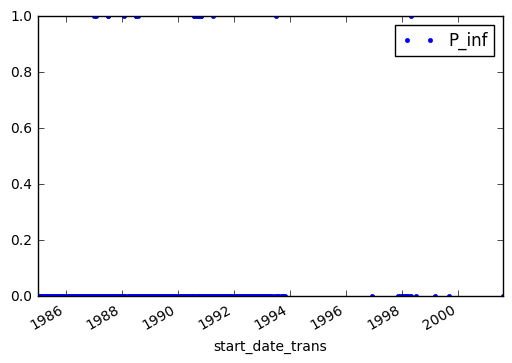

In [9]:
test=df[df['Mi_Cj'].str.startswith('6203279_')]   # i get a subsample of the data: only those columns with 
test.plot(x='start_date_trans',y='P_inf',ls='',marker='.')  # method of the datafram to plot directly!!
#.str.startswith is a method to get only the selection of data i want
# _  means whatever the last output from the last cell was

#test.set_index('start_date_trans').plot()  # i can plot all variables at once
#test.set_index('start_date_trans')  # this part is to set which one is my x variable

#test.set_index('start_date_trans').groupby(pandas.TimeGrouper('MS')).apply(lambda x: len(x['Cj'].unique())).plot()
#test.set_index('start_date_trans').resample('M')['Cj'].apply(lambda x: len(x.unique())).plot()  


In [97]:
### hand-picked examples of long time series:

# lista_m=[2390206,9101500,207901,501803,10500138,100389,202897,114819,103779,2316377,110671,108601,10502196]
# lista_c=[104978,2003624,102660,2393359,2392859,2366318,2398540,2364864,201901,20594159,2003648,2366016,2002619,2395484,100845 ,100237,2392859 ,2392793]

2392069
8 7 1491 82

# points: 82  # errors: 8    # unique contractors: 7


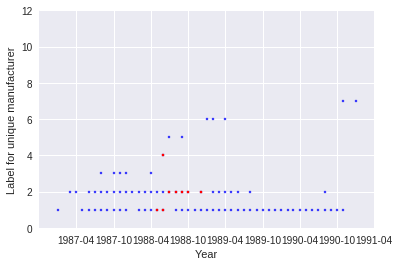

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2392069.pdf
2392070
4 8 1948 30
5144589
0 3 426 14
2392082
1 3 579 26
5079068
1 1 515 17
2392094
1 1 699 23
2392100
1 2 518 18
2392112
3 11 2101 143
505195
0 2 484 17
2392124
0 4 303 7
2392136
1 1 579 18
5144656
1 1 303 6
2392148
0 7 1735 58
5275733
0 1 118 4
2392151
3 5 456 35
5275741
0 1 181 7
2392161
0 4 395 17
5177455
0 1 57 2
5013616
0 1 729 2
5144693
0 1 27 1
5275768
1 1 797 21
2392185
0 6 1401 39
2392197
3 7 639 25
5210249
1 1 1094 9
2392203
10 11 2191 259

# points: 259  # errors: 10    # unique contractors: 11


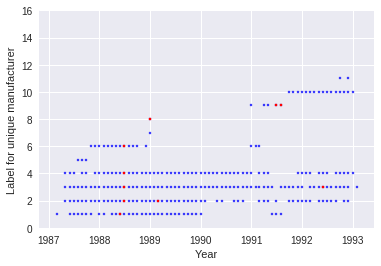

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2392203.pdf
2392215
0 4 1005 49
5275806
0 1 183 1
2392227
0 1 182 4
5275814
0 1 1552 6
2392239
1 6 244 12
2392240
1 4 610 14
5275830
0 1 58 2
5013695
0 1 52 2
2392264
2 11 1403 36
5275849
0 1 27 1
2392276
0 1 212 7
5177561
0 1 150 3
2392288
3 5 487 17
5243106
0 1 272 5
2392291
3 7 669 46
2392318
2 4 1064 44
2392321
1 2 213 6
2392331
0 4 395 6
2392343
1 6 2434 189
2397572
0 2 456 3
2392355
19 13 819 56

# points: 56  # errors: 19    # unique contractors: 13


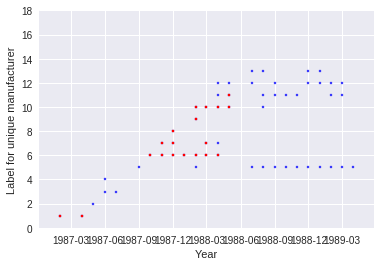

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2392355.pdf
409649
0 3 913 22
2392367
1 6 730 19
2392379
2 2 669 22
2392380
5 9 700 40
2392392
1 6 523 13
2392409
6 9 914 86
2392410
0 4 576 10
5276004
7 1 212 7
2392422
7 10 761 48

# points: 48  # errors: 7    # unique contractors: 10


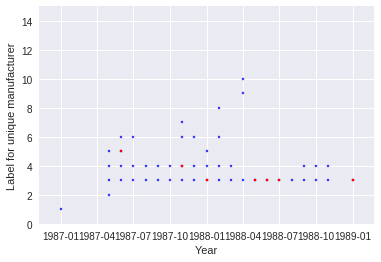

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2392422.pdf
2392434
1 1 30 1
5276020
0 1 30 1
2392446
1 5 2101 21
2392458
0 3 274 10
5183972
1 1 150 1
2392471
11 8 1552 76

# points: 76  # errors: 11    # unique contractors: 8


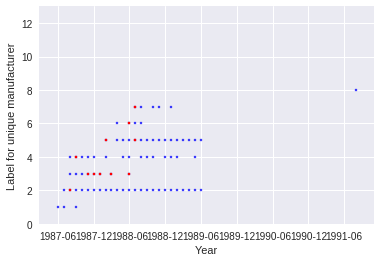

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2392471.pdf
2392483
0 2 335 6
2392495
6 11 914 38
2392501
4 13 2556 174
5210550
4 1 1826 43
2392513
1 13 1125 60
2392525
2 3 822 33
5243343
0 1 333 2
2392537
1 4 426 16
2392549
6 8 3105 167
2392550
2 2 90 4
2392562
3 4 1034 54
2392574
3 3 457 16
2392586
1 3 370 16
2392598
1 2 122 6
5276187
0 1 30 1
2392604
1 2 1309 38
5276195
0 1 183 1
2392616
2 5 1095 70
5210666
0 1 761 3
5145132
0 1 58 2
2392628
0 4 669 32
2392631
2 16 2342 41
5145144
0 1 58 2
2392641
6 10 944 57
2392653
1 5 945 31
5210712
0 2 119 3
2392665
0 3 182 5
5243483
0 1 27 1
5248442
0 1 29 1
5210720
0 1 29 1
5243491
0 1 27 1
2392677
0 2 243 9
5276268
0 1 608 3
5243505
0 1 27 1
2392690
2 8 760 43
5177984
0 1 30 1
5243521
0 1 28 1
2392707
3 11 2040 66
2392720
3 10 1430 66
2392732
2 6 973 47
2321178
0 3 89 7
2392744
3 5 3440 89
2392756
4 14 973 89
502558
0 1 211 7
2392768
1 4 1276 44
2392771
2 4 2314 69
2360007
0 6 881 46
2392781
4 17 1187 71
5243

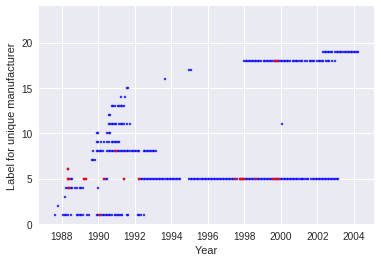

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2392793.pdf
2360032
0 1 852 28
2392801
1 8 608 25
2392811
6 9 1917 171
2360044
0 8 789 14
5276403
1 1 180 1
2392823
1 6 396 14
2360056
0 3 365 19
409728
2 2 1521 39
2392835
2 2 791 27
2360068
0 1 152 4
2360071
0 5 579 35
5014286
0 4 1439 35
2392847
4 11 3105 340
2360081
1 8 1856 111
600878
0 1 27 1
2392859
7 18 1979 188

# points: 188  # errors: 7    # unique contractors: 18


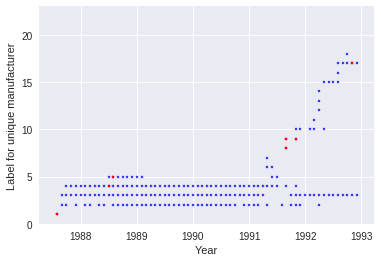

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2392859.pdf
2392860
1 5 825 47
2360093
0 1 304 3
5276446
0 1 90 2
2360101
3 12 1550 26
2392872
1 4 544 21
2360111
0 1 28 1
2392884
1 14 1307 52
5276470
0 1 244 6
2360123
0 2 213 8
2392896
4 10 1398 113
2392902
1 2 2403 40
2360135
1 6 1642 110
5008184
0 1 91 1
2392914
2 4 518 35
2360147
0 1 29 1
5309268
0 2 517 2
5243734
0 1 29 1
2392926
3 9 1276 71
2360159
3 4 822 30
2360160
0 5 913 80
2392938
1 5 243 20
2360172
0 4 1825 61
2392941
8 9 1795 28

# points: 28  # errors: 8    # unique contractors: 9


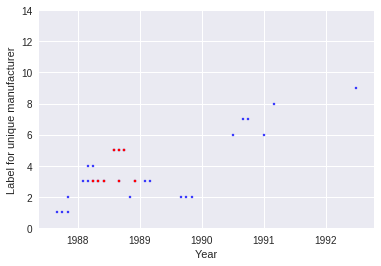

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2392941.pdf
2392951
2 3 2039 51
2360184
1 5 305 20
2392963
0 1 89 3
2360196
0 1 425 3
5276551
0 1 91 3
5243785
0 2 91 3
2360202
0 3 1097 32
2392975
1 4 334 4
5243793
0 2 60 3
5211026
1 2 486 12
2360214
1 8 671 31
2392987
0 5 183 8
5276578
3 2 152 4
2392999
1 2 274 5
2393001
1 5 1582 50
2360238
0 5 850 18
2360241
0 3 518 18
2360251
2 8 456 38
2393025
0 2 700 23
2360263
3 8 1005 67
2393037
1 9 365 21
2360275
0 1 89 3
5276632
1 2 1915 2
2393049
0 5 182 12
2393050
0 4 273 4
2360287
1 2 760 6
2393062
1 10 2160 50
153084
1 2 1033 27
2360299
0 10 791 48
2360305
0 3 457 29
2393074
2 10 1276 62
2360317
0 2 914 31
2393086
3 4 546 38
2360329
0 5 820 6
2393098
1 4 699 8
5178381
0 1 58 2
2393104
1 14 1430 123
2397699
1 4 1036 47
2360342
0 2 761 3
2393116
8 8 2738 48

# points: 48  # errors: 8    # unique contractors: 8


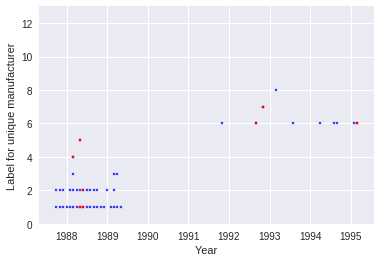

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2393116.pdf
2360354
1 10 1733 83
409777
1 5 2770 91
2393128
14 16 1765 136

# points: 136  # errors: 14    # unique contractors: 16


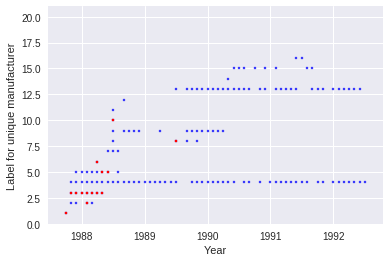

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2393128.pdf
5276713
0 1 29 1
2393131
3 5 1918 73
2360366
0 5 1765 8
2393141
1 11 1307 71
2360378
2 3 1125 39
2360381
0 3 669 24
2393153
1 4 243 17
2360391
2 6 1399 32
5211212
0 2 1735 3
2393165
2 4 1885 48
5014611
0 1 30 1
2360408
0 4 1125 34
2360411
4 3 518 36
2393189
0 2 121 4
2393190
5 7 1368 76
2360433
2 4 1643 82
2393207
2 3 365 18
2360445
0 2 730 40
2393219
2 6 2252 215
2393220
0 2 485 4
2360457
3 12 850 48
2393232
1 3 1246 4
2360469
1 1 911 23
2393244
4 6 1918 77
2360482
0 6 1064 40
2393256
11 8 2829 34

# points: 34  # errors: 11    # unique contractors: 8


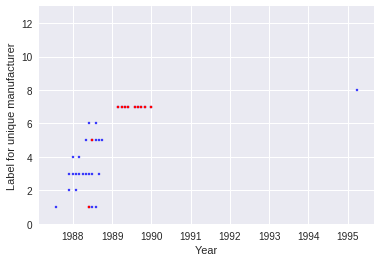

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2393256.pdf
2360494
1 3 1459 69
2393268
5 5 789 25
2000055
6 4 2129 63
2360512
0 2 487 17
2393281
3 8 1215 47
2360524
0 1 30 1
2393293
4 10 1307 44
2393301
0 2 335 13
2360536
0 2 91 4
2310351
0 1 60 2
2393311
19 16 2890 74

# points: 74  # errors: 19    # unique contractors: 16


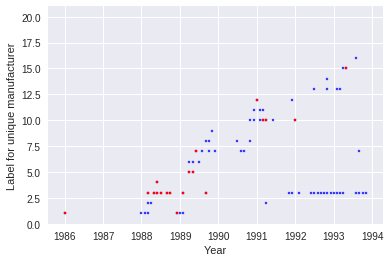

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2393311.pdf
2360548
1 3 761 8
2360551
0 6 1187 82
2000106
0 3 90 5
2393323
1 4 488 8
2360561
0 1 579 18
5211379
0 1 182 1
2393335
0 5 2222 55
2360573
4 4 3653 111
2000131
0 2 2433 16
2360585
0 2 579 20
2393360
2 8 851 43
2360597
0 1 395 6
2360603
0 3 457 5
2393372
7 14 2768 87

# points: 87  # errors: 7    # unique contractors: 14


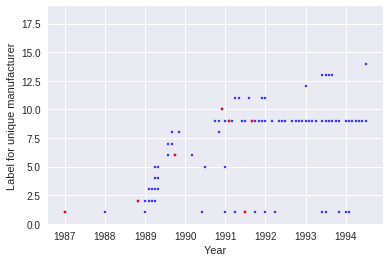

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2393372.pdf
409819
1 9 2647 102
2393384
3 4 1703 27
2360627
0 1 579 4
2393396
10 2 850 13
2393402
3 4 2981 59
2360639
1 2 579 34
2360640
0 1 60 2
2393414
1 6 3376 32
2360652
5 15 1398 107
2393426
1 7 881 66
2360664
2 10 1765 58
2393438
6 10 942 51
2393441
2 2 1095 22
2360676
0 3 760 14
2393451
1 2 1034 17
2360688
0 2 580 25
2360691
1 9 1460 51
2393463
3 5 1123 67
2360706
0 4 364 4
2393475
2 6 882 18
2000261
6 2 3286 76
2360718
0 3 515 9
2393487
10 5 1126 38

# points: 38  # errors: 10    # unique contractors: 5


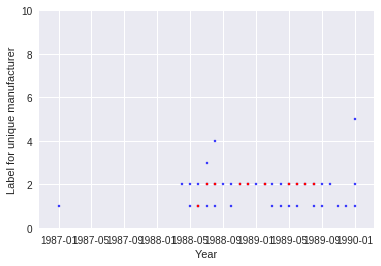

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2393487.pdf
2393499
6 5 427 31
404378
19 1 6754 197
2393505
2 7 1460 59
5014948
0 1 89 1
2324155
0 7 364 26
5014951
0 1 850 3
2393517
0 5 820 15
2360755
0 2 549 12
2393529
4 3 1065 17
2393530
0 6 669 30
2360767
0 3 425 12
2393542
0 1 91 2
5146057
0 1 515 6
2360780
1 2 1369 54
2393554
4 9 3103 152
2360792
2 5 1519 28
2393566
4 7 1064 42
2360809
0 2 638 11
2360810
0 2 1156 22
2393581
0 5 1185 57
2360822
0 1 60 2
2360834
4 16 2495 71
2364530
1 2 1094 17
2393608
0 9 486 33
2393611
0 2 30 2
2360846
0 1 883 12
2393621
7 5 1307 74

# points: 74  # errors: 7    # unique contractors: 5


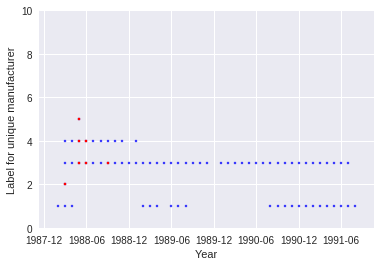

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2393621.pdf
2360858
3 7 1398 63
2360861
0 2 244 12
2393633
1 8 1642 37
2360871
0 4 1673 37
2393645
2 4 1215 46
5178927
0 1 29 1
2360883
1 5 1337 50
5211700
0 1 149 2
2393657
2 2 273 9
2360895
0 1 30 1
2393669
2 4 700 9
2393670
2 2 886 35
5211719
0 1 27 1
2360913
6 8 1703 58
2393682
1 3 1216 40
153187
1 1 1185 10
2360925
6 5 2069 164
2393694
1 2 670 16
2393700
1 3 882 6
2360937
0 2 365 12
2393712
6 20 2191 270
2360949
0 2 579 19
2360950
1 3 457 28
2393724
2 4 668 39
2393736
6 24 1398 103
5047948
0 1 90 1
2360974
0 4 1034 34
5047951
0 1 60 1
5211794
0 2 27 2
2393748
0 2 365 9
2393751
0 3 244 7
2360986
1 3 273 10
2393761
8 15 729 129

# points: 129  # errors: 8    # unique contractors: 15


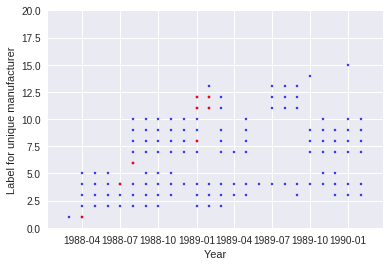

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2393761.pdf
2360998
2 6 1368 35
2361000
0 7 396 23
5277353
0 1 180 1
2393773
1 4 454 19
2361012
2 7 1795 80
2393785
0 1 29 1
153205
13 8 2283 137

# points: 137  # errors: 13    # unique contractors: 8


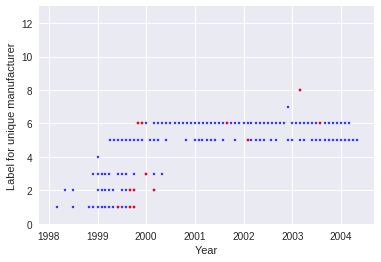

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/153205.pdf
2361024
0 8 1246 98
5048001
0 1 29 1
2393797
0 3 1613 60
5280036
0 1 91 3
2393803
3 4 1705 65
5277388
0 1 29 1
2393815
3 3 304 11
2361048
1 6 1307 47
5620004
0 1 425 2
2361051
1 3 973 45
2393827
1 7 942 62
2361061
0 4 486 32
2393839
0 4 2555 114
2393840
5 4 1400 19
2361073
5 6 2069 90
5146355
0 1 28 1
2393852
3 14 608 68
2361085
0 2 516 10
5211905
3 1 91 3
2393864
2 11 1400 58
2361097
3 6 1034 18
2361103
0 2 912 9
2393876
1 6 1186 92
2361115
1 1 305 2
2393891
2 5 1246 51
100134
0 4 880 23
2361127
0 2 791 24
2393906
0 2 305 7
2361139
1 2 89 4
2361140
0 2 365 22
5244730
0 1 244 1
100158
6 54 2190 689
2361152
1 7 2251 116
2393921
0 3 425 19
2393931
1 8 730 22
2361164
0 5 637 47
153229
1 1 639 20
2393943
2 5 2251 85
2361176
0 3 151 7
2393955
1 4 2921 104
2361188
0 4 1764 64
2361191
1 11 1398 68
5015406
0 2 1307 10
2393967
1 3 543 24
2393979
1 5 729 32
2393980
2 2 91 3
100225
3 9 1368 84
2361218
0 4

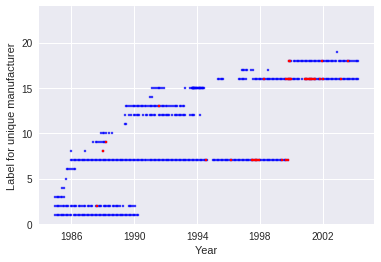

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/100237.pdf
2361231
0 5 1307 61
2394005
0 2 729 23
2361243
0 2 486 6
5212065
0 1 57 2
2361255
0 2 425 6
2394029
3 2 334 11
2394030
3 10 1399 38
2361267
0 2 181 7
2394042
0 1 639 19
2361279
0 2 273 9
2361280
1 2 213 5
2397857
1 4 1917 58
100298
0 3 668 40
2361292
0 1 576 19
2394066
0 11 790 44
2361309
1 5 1247 35
2394078
1 4 456 9
2394081
6 12 639 38
2361322
2 4 546 32
100331
1 2 484 12
100341
0 1 152 3
2361334
1 1 578 15
2394108
2 4 852 40
2394111
6 17 3287 117
5212162
0 1 30 1
2394121
0 2 91 2
2361358
4 9 911 46
2361361
0 2 243 3
2394133
2 2 1034 26
5244951
0 1 30 1
2361371
1 3 791 14
2394145
2 7 1460 52
2361383
0 1 790 23
2394157
5 12 790 48
104115
1 4 395 26
2361401
0 2 213 11
2394170
0 1 91 2
5212219
1 2 454 4
2361413
0 1 485 15
2394182
2 5 882 22
5015625
2 2 2647 35
2361425
1 3 608 15
2394194
2 6 336 19
2394200
7 10 1703 188

# points: 188  # errors: 7    # unique contractors: 10


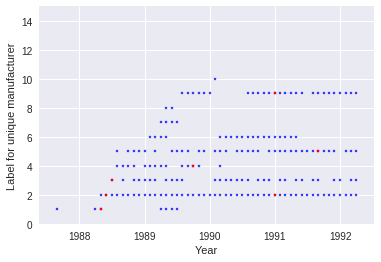

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2394200.pdf
5212251
4 1 211 6
2361437
1 2 302 19
2394212
2 9 1308 58
2361449
8 6 3956 129

# points: 129  # errors: 8    # unique contractors: 6


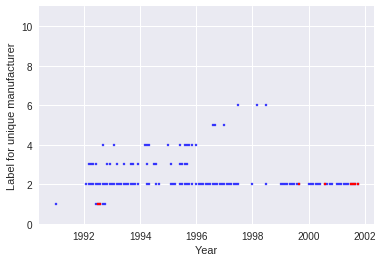

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2361449.pdf
2361450
0 1 30 1
409959
1 2 761 22
5245036
0 1 729 3
2394224
1 2 2495 78
5245044
0 1 272 1
5212278
0 1 27 1
2394236
3 8 821 53
5212286
0 1 27 1
2361474
0 9 669 57
5245060
0 1 272 1
2394248
0 4 303 9
2394251
5 3 1064 33
2361486
3 2 394 8
2394261
0 3 699 28
2361498
0 4 1066 26
100511
1 5 849 43
2361504
1 5 2464 18
2394273
1 4 517 22
1902763
3 2 1218 35
2361516
1 2 244 9
2394285
1 2 669 17
2361528
0 1 121 4
2394297
2 3 1064 89
2361531
0 3 517 22
5002954
0 1 60 2
2394303
5 4 1035 53
100547
1 6 2555 162
2361541
14 5 1247 31

# points: 31  # errors: 14    # unique contractors: 5


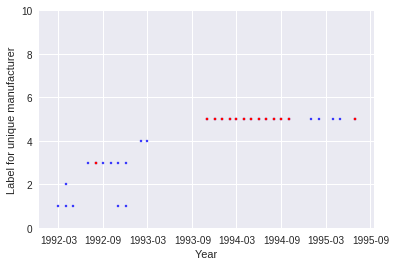

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2361541.pdf
2397900
0 1 91 3
2394315
7 17 1125 96

# points: 96  # errors: 7    # unique contractors: 17


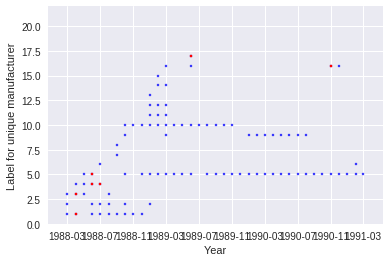

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2394315.pdf
100559
0 10 972 46
100560
3 7 1368 82
2361553
0 2 305 16
5212375
0 1 487 13
5212383
0 4 126 12
2394339
2 1 213 7
2394340
2 4 759 39
2361577
0 1 89 3
2394352
0 6 517 26
100596
1 2 88 3
2361589
0 2 881 39
2361590
0 4 396 20
2394364
1 7 1916 159
60000517
0 1 91 2
2361607
0 4 1066 94
2394376
4 4 1156 50
5221420
0 1 213 1
2361619
0 2 151 7
2394388
2 3 820 51
2394391
0 9 1124 53
2361632
0 3 425 16
2394406
1 6 1277 116
2366739
3 5 548 23
2361644
0 3 333 6
5245230
0 1 333 2
2394418
1 4 608 4
2361656
0 1 454 9
2394431
2 7 882 44
2361671
0 5 1095 57
2001226
2 2 2424 21
2394443
1 3 364 22
100687
6 18 6877 290
513763
0 2 272 16
2394455
0 4 790 30
2361693
0 2 578 9
2001251
0 2 58 2
2361701
0 3 882 35
4000109
0 1 91 1
2394479
1 2 456 12
2394480
0 2 121 4
2361723
0 6 274 12
2394492
1 3 303 9
5278081
0 2 303 12
5278082
0 1 30 1
2361735
0 1 60 2
2394509
2 5 516 19
2361747
1 3 670 39
5245338
0 2 941 18
513775
4

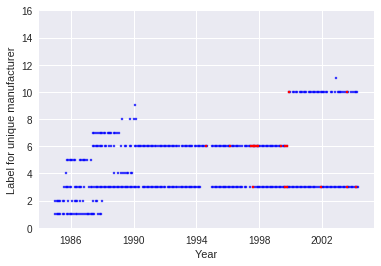

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/100845.pdf
2361838
0 1 213 6
2001391
0 1 30 1
2361841
0 1 152 2
2394613
1 11 607 49
2361851
8 4 2374 95
2394625
1 7 1186 32
2361863
0 2 395 13
2394637
0 7 637 30
100882
0 2 364 11
2361875
0 3 120 9
2361887
1 3 789 45
2394662
0 2 91 4
2361899
0 3 424 7
15501871
0 1 21 1
2361905
1 5 456 14
2394674
0 4 760 56
2001469
0 9 1276 41
2394686
3 7 1460 66
2361929
0 5 1460 137
2394698
0 6 759 23
2394704
0 3 364 15
2361942
0 1 547 17
15501911
0 1 24 1
2394716
0 4 1521 138
2361954
0 2 90 3
5287014
0 1 364 1
2394728
1 4 546 12
2394731
1 6 242 9
2361966
0 1 213 1
2394741
0 3 150 7
2361978
0 3 122 7
2361981
1 8 425 40
2394753
1 4 851 48
2361991
0 5 851 31
2362004
2 10 942 34
2394777
1 7 1125 61
2362016
1 2 1307 52
2394789
1 5 2464 34
2394790
0 4 1794 65
2362028
0 1 305 10
2362031
0 5 577 30
2394807
2 10 1215 38
2362041
0 1 244 8
5180090
0 1 89 3
502901
0 4 910 33
2394819
0 3 181 10
2394820
0 7 1247 59
2362053
0 5 121 11


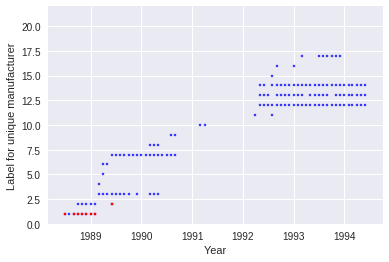

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2394959.pdf
2394960
0 3 576 10
2362193
0 2 972 19
5278546
0 1 7 1
5180247
0 1 30 1
2362201
5 8 1674 100
2394972
0 5 1215 101
2362211
0 1 333 9
2394984
0 2 364 16
2362223
1 3 2129 39
2321555
0 4 819 50
2394996
0 4 850 27
5213045
0 1 30 1
2362235
0 1 121 2
2395009
0 4 790 26
2395010
0 6 484 28
4000651
1 1 30 1
2395022
0 9 2159 120
101266
0 1 333 11
2362260
0 1 91 3
15502231
1 1 29 1
2395034
1 3 1856 73
2362272
0 2 639 4
2362284
0 1 303 10
2395058
0 7 790 57
2395061
1 8 1552 22
2362296
1 2 486 21
2362302
0 2 243 10
2395071
0 5 1154 34
2362314
0 4 1094 8
2395083
0 4 882 9
2362326
1 4 637 29
2395095
1 2 576 22
152559
0 1 89 3
2395101
2 4 576 8
101345
0 8 4412 262
2362338
1 1 1124 24
2362341
0 2 517 9
2395113
1 10 1861 60
5008551
0 1 91 3
2362351
0 1 395 11
2395125
0 3 821 71
5049337
0 2 545 13
2362363
0 2 303 11
5278716
0 4 1460 9
2395137
0 9 1217 60
2362375
3 5 487 32
2395149
1 1 396 4
2362387
6 9 1490 70
239

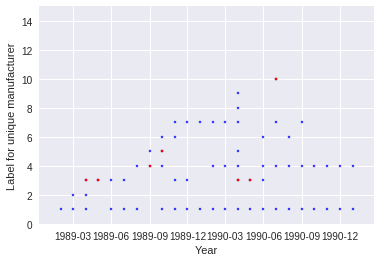

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2395231.pdf
2362466
0 2 334 4
2395241
0 2 361 13
2362478
0 3 486 18
15502447
0 2 91 2
2362481
2 4 1005 48
2395253
1 8 760 50
2389681
0 6 454 20
2362491
0 5 759 63
101503
6 2 6481 206
2395265
1 10 1430 114
5180557
0 1 272 1
2362511
0 7 1247 56
5278864
1 1 364 7
2362521
1 5 850 23
2395290
0 2 1216 42
2362533
8 11 577 32

# points: 32  # errors: 8    # unique contractors: 11


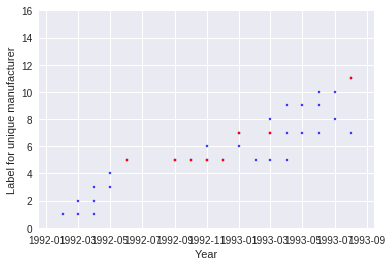

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2362533.pdf
2395307
1 2 670 11
2362545
1 4 1216 20
5147827
1 1 29 1
2395319
3 3 1035 44
5180600
0 1 29 1
2362557
0 1 272 6
2395332
0 6 606 24
2362569
0 2 2070 88
2362570
1 2 334 11
2395344
0 5 914 19
2362582
0 3 364 22
2395356
1 7 1856 85
5003130
0 1 364 1
2362594
0 5 1247 51
2362600
1 1 182 5
2395371
2 8 819 86
2362612
0 4 182 14
2395381
1 5 757 21
2362624
0 3 942 4
2395393
0 8 1522 65
2395401
6 8 1154 39
5049611
0 1 1062 12
2362636
2 8 2983 38
2395411
2 6 1975 126
2362648
0 4 576 28
2362651
0 3 395 14
2395423
2 5 546 17
2395428
1 2 637 19
2362661
2 2 244 11
20594101
0 1 119 4
2395435
0 1 336 11
2362673
1 7 456 42
2395447
1 5 1794 48
2362685
8 13 1613 137

# points: 137  # errors: 8    # unique contractors: 13


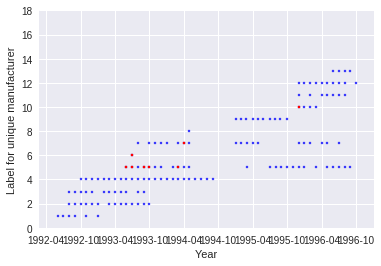

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2362685.pdf
2395459
0 3 486 7
2395460
2 6 2310 76
2362697
2 4 1278 36
2395472
1 14 3133 165
2002267
1 5 760 54
2395484
9 11 3590 324

# points: 324  # errors: 9    # unique contractors: 11


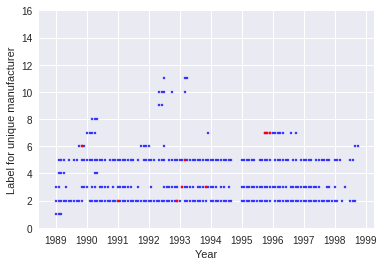

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2395484.pdf
2366039
0 1 211 4
2362727
0 2 606 7
2395496
0 4 1276 47
5246318
0 1 272 1
2362739
0 1 273 1
2362740
0 3 2251 91
5246326
0 1 272 1
200055
3 6 1248 9
2395514
1 7 698 16
2362752
1 1 547 17
5246342
1 1 30 1
2362764
0 1 29 1
2002322
4 26 303 79
2395541
0 2 1307 23
2362776
0 4 423 23
2395551
1 9 484 24
2362788
0 2 729 16
2362791
1 3 486 6
2395563
1 9 2006 93
2395575
0 2 1277 46
5246393
0 2 241 2
5213630
0 1 30 1
2362818
0 4 334 13
2395587
0 6 1035 16
2362821
0 3 424 18
101837
1 1 1368 32
2395599
0 3 609 13
5213649
0 1 333 8
2395605
0 5 887 14
2362843
0 1 242 4
2395617
0 5 484 6
2362855
0 3 944 12
2395629
0 5 1002 23
2395630
2 6 760 10
2362867
1 3 790 21
2366780
1 2 150 7
2395642
0 8 910 36
4001278
1 1 29 1
2362879
0 2 302 3
2362880
0 1 91 3
2002437
0 1 180 1
2395654
0 5 1154 55
2362892
1 5 517 15
2395666
0 11 1094 55
2362909
0 1 1000 26
2362910
0 2 456 6
2395681
0 11 941 40
2366015
0 3 213 7
101928


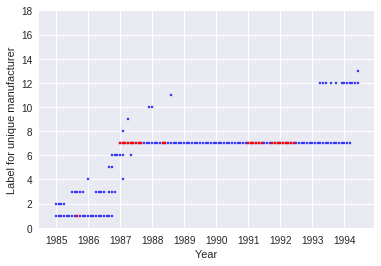

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2002553.pdf
2395770
0 1 364 1
2363008
0 7 637 36
2363011
0 2 821 46
5246598
0 1 307 5
152882
12 3 1399 56
2363021
0 6 333 37
2395794
0 2 152 6
2395800
0 4 1215 34
2363033
0 3 486 25
2002589
0 3 183 5
2002590
2 6 637 45
2395812
0 8 882 28
2363045
0 3 546 24
2392689
3 6 2161 128
5279402
0 1 272 6
2363057
1 12 1368 68
2002619
12 10 4075 204

# points: 204  # errors: 12    # unique contractors: 10


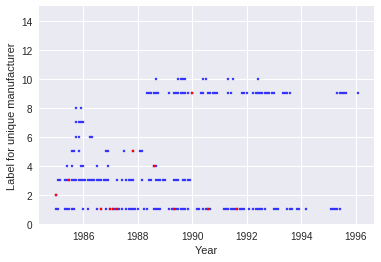

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2002619.pdf
2395836
0 1 59 2
2363069
2 2 2190 60
5213886
0 1 121 1
2366016
17 10 1917 188

# points: 188  # errors: 17    # unique contractors: 10


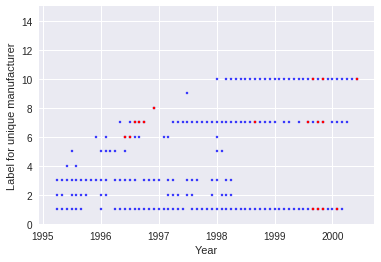

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2366016.pdf
200384
0 3 395 9
2363082
0 4 1247 38
2395851
1 3 272 4
2002644
0 1 180 1
2395861
4 16 2009 113
2363094
0 1 729 24
2363100
0 4 578 20
5279453
0 1 425 2
5246687
0 1 60 2
2002656
0 4 576 23
2395873
5 9 4775 163
102121
0 3 180 8
2002668
0 4 849 27
2395885
4 14 941 58
2002671
1 4 729 45
5213940
0 1 547 2
2395897
0 10 1340 79
5246717
0 1 29 1
2395903
0 2 576 26
2363136
0 2 60 2
2395915
0 1 91 3
2363148
0 2 121 2
2002701
1 5 667 12
5246741
0 1 29 1
2395927
0 2 972 30
200475
2 4 1429 31
2395939
0 1 30 1
2395940
0 4 1066 67
2310791
0 2 89 3
2395952
0 3 330 8
5050169
0 1 150 5
2395964
0 2 364 10
2363197
6 8 2585 161
2363203
0 4 2463 128
2395976
0 3 483 9
19000631
0 1 5 1
102222
0 5 941 48
2363215
0 2 272 9
200529
6 10 2952 78
2395988
0 9 1226 56
2395991
1 7 548 27
2363227
1 3 637 40
2396002
0 11 364 42
5607267
0 1 91 1
2363239
0 2 121 3
2363240
1 7 1429 35
2396014
2 13 1803 125
5607279
0 1 125 5
102258


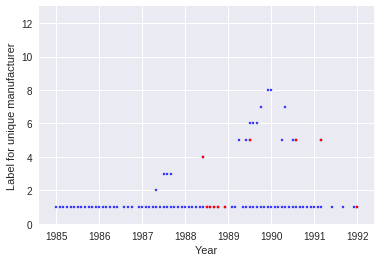

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/200621.pdf
2363318
1 1 1217 17
404809
0 1 639 9
2363321
2 9 1916 125
102337
0 1 29 1
2396099
0 11 1186 74
2396105
0 4 454 7
2365431
0 2 790 22
2363343
0 7 637 30
2396117
1 3 1156 27
2363355
1 12 1916 70
2396129
2 10 1674 36
2396130
10 14 1429 114

# points: 114  # errors: 10    # unique contractors: 14


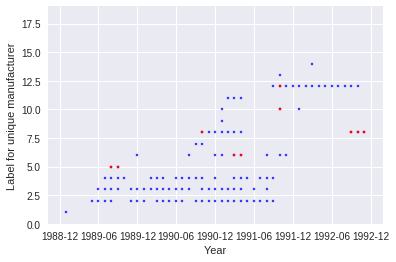

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2396130.pdf
2363367
2 3 1978 54
5279720
0 1 58 2
2396142
1 5 548 24
2363379
0 5 545 24
2396154
0 7 1370 100
2363392
0 2 150 3
2396166
1 6 670 31
2365800
1 3 1123 58
5246989
0 1 29 1
2363409
0 7 1186 33
2396178
2 11 1521 106
2396181
0 1 211 3
2396191
0 11 1309 43
2363434
0 2 364 20
2396208
1 9 851 57
2396211
0 6 486 18
102453
2 12 2341 93
2363446
0 5 911 34
2396221
0 5 1340 21
5214270
0 2 1217 3
2363458
0 2 546 17
2363461
0 2 699 17
2396233
0 4 819 17
2363471
0 2 606 23
2396245
2 12 821 119
2363483
0 2 1521 57
2396257
0 1 820 27
200803
1 5 973 7
2363495
0 6 333 20
5148777
0 1 29 1
2396269
1 3 456 16
2396270
1 5 455 17
2363513
3 3 1826 55
2396282
1 1 489 17
2361346
0 2 1460 42
2363525
0 3 423 15
2396294
0 3 183 10
5279879
0 1 365 1
200840
0 1 365 1
2396300
0 4 1705 48
2363537
0 2 182 2
2396312
1 6 2190 68
2363549
0 5 1124 55
2363550
0 1 1733 54
20582559
1 1 29 1
5247136
0 1 729 2
2396324
0 5 2191 133
236356

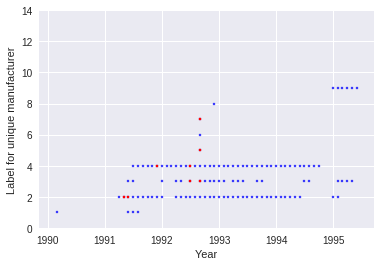

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2003351.pdf
2363801
3 7 2340 85
2363811
1 3 788 4
2396580
3 13 1826 112
5083564
0 1 364 8
2003375
6 4 456 34
5181872
0 1 455 14
5254558
0 1 609 4
5281865
0 1 456 8
2363835
1 4 1185 44
2396609
0 7 1246 55
2396610
2 10 1095 31
2003399
3 1 91 3
2396622
0 2 456 12
2363859
0 2 211 9
2363860
1 2 1276 12
5247446
0 1 487 7
2003417
5 9 1246 55
2396634
0 8 517 25
5247454
0 1 242 2
2363872
0 4 879 11
102881
0 14 2249 101
2003429
2 8 484 60
5247462
1 2 638 3
2363884
3 8 1974 100
2365522
0 2 180 5
5083631
1 1 30 1
201200
1 5 2768 94
2396658
0 6 820 52
2396661
1 3 2221 96
2363896
0 2 941 37
2363902
0 6 1215 70
2396671
0 4 183 10
5178113
0 1 30 1
2363914
0 2 91 5
2396683
0 3 609 26
2363926
0 5 454 20
2396695
0 4 548 22
2003481
6 9 1003 64
2396701
1 10 1368 90
102945
1 1 211 3
2363938
1 10 576 46
2003491
1 19 1491 137
2363941
6 10 2037 127
2396713
1 13 1580 101
5280303
0 1 30 1
2003508
10 4 425 27
2396725
0 4 334 10
2003

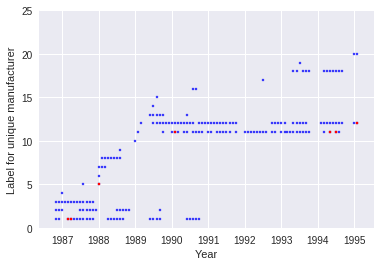

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2003648.pdf
2396865
0 11 2342 114
2003651
1 8 303 21
5214920
0 1 61 2
2003661
0 1 91 3
2364116
0 4 395 19
2396889
2 5 515 22
2396890
1 5 484 18
5051101
0 5 1321 9
2364128
0 2 152 5
2364131
1 3 485 22
5247721
0 2 1825 4
2396907
0 2 395 14
2364141
0 5 1184 27
5214963
0 1 151 3
2003703
0 4 851 11
2396920
3 12 944 55
2364153
0 5 606 30
5214971
0 1 30 1
2003715
0 1 29 1
5280516
0 1 456 11
2364165
0 6 484 22
5280524
1 1 394 2
2396944
0 4 395 9
2364177
0 1 423 13
5280532
0 1 243 1
9900822
2 1 180 2
2396956
5 7 972 44
2364189
0 3 729 18
2364190
0 2 211 3
201509
0 1 30 1
2396968
0 2 302 2
2396971
0 9 1367 81
5280559
0 1 364 1
2003764
5 4 820 78
2396981
1 1 2007 43
2364220
2 5 1245 39
2003776
0 1 30 1
2396993
0 2 120 5
2364232
0 3 453 14
2003788
0 1 181 4
2397018
0 1 333 11
2397021
6 12 4533 332
2364256
0 8 1002 66
1502694
4 1 364 4
2397031
0 1 333 11
2003818
0 2 396 11
2364268
0 1 974 27
2364271
1 1 972 18
2397043

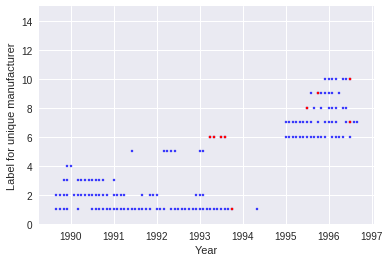

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2397066.pdf
2397067
0 14 1460 43
2364301
2 4 3712 14
2003855
9 4 1368 51
5247888
0 2 243 8
2397079
1 3 1672 83
2397080
1 10 515 68
2364323
0 2 760 15
2397092
0 8 425 24
2364335
0 1 121 4
2397109
0 6 1887 77
2397110
0 1 524 17
2364347
0 2 545 15
5247934
3 1 20 3
2397122
0 10 1185 86
103366
0 2 242 8
2364359
1 8 1126 37
2397134
1 7 607 48
2364372
0 3 274 10
2397146
0 4 1126 39
503290
11 12 6442 102

# points: 102  # errors: 11    # unique contractors: 12


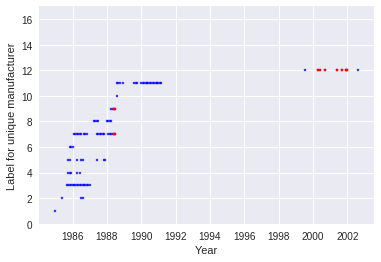

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/503290.pdf
2364384
0 6 1735 69
2397158
0 3 545 25
2397161
0 2 394 5
2364396
6 5 392 22
2364402
1 5 851 32
2397171
1 5 334 18
20594159
9 16 1884 123

# points: 123  # errors: 9    # unique contractors: 16


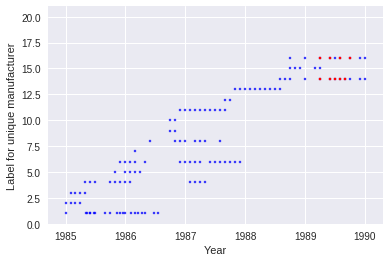

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/20594159.pdf
2364414
0 1 152 4
2397183
0 3 334 13
5248000
0 1 30 1
2364426
0 1 30 1
2397195
0 5 881 22
2397201
0 9 942 64
2364438
4 7 1002 45
2397213
0 4 912 34
2364451
0 5 425 49
201765
0 8 2890 92
2364454
0 2 149 5
5182505
0 2 1034 7
5248043
0 3 485 4
2364463
1 3 336 17
2397237
0 3 973 25
2364475
0 7 2402 95
2397249
3 10 1215 49
2397250
0 6 364 13
2364487
4 7 2344 110
2397262
0 9 1154 52
201807
0 5 1401 44
2364499
1 4 882 20
2364505
2 3 699 12
2397274
0 3 183 7
2364517
0 2 1064 10
2397286
1 12 1399 70
2364529
0 6 425 22
2397298
0 3 514 10
5248116
0 1 30 1
2397304
1 8 881 23
5248124
0 2 760 5
2364542
1 4 456 15
5149824
0 1 333 1
2397316
0 3 423 9
2364554
0 3 336 7
2397328
0 6 1246 59
2397331
7 7 2949 130

# points: 130  # errors: 7    # unique contractors: 7


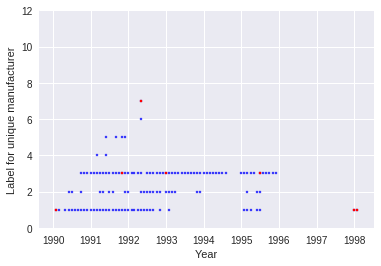

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2397331.pdf
2364566
0 3 275 10
2397341
0 3 1914 77
2364578
0 6 1094 41
2364581
0 3 333 15
2397353
10 10 1215 42

# points: 42  # errors: 10    # unique contractors: 10


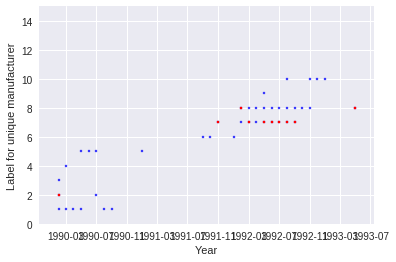

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2397353.pdf
2364591
0 1 242 6
5215412
0 1 122 1
2397365
0 1 302 9
5313727
0 1 274 1
2364608
1 8 670 29
2397377
0 2 119 6
2364611
0 3 302 18
5260515
3 1 1161 33
2397389
3 5 2587 84
2397390
0 3 180 15
20595577
0 1 122 4
2364633
0 2 547 21
2397407
0 2 149 5
2364645
0 2 394 7
5293073
0 1 152 5
2397419
1 12 1368 62
2397420
0 3 455 11
2365650
0 4 545 17
2364657
1 7 851 47
2364670
0 2 1247 33
201984
1 5 1644 52
2364682
0 9 1248 52
5281040
0 1 60 2
2364694
0 2 333 10
103706
2 10 1855 52
20596351
0 10 1734 58
2397468
0 6 761 25
2397471
0 1 27 1
103718
0 1 30 1
2364712
0 2 183 2
2397481
0 9 1095 133
103731
0 5 4016 141
2364724
0 2 547 6
2365662
0 2 1460 43
5248310
0 1 364 2
2397501
0 1 517 16
103743
7 11 4928 92

# points: 92  # errors: 7    # unique contractors: 11


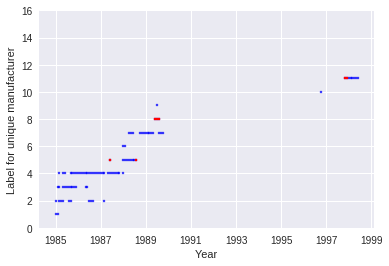

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/103743.pdf
2364736
0 1 121 4
2397511
0 4 701 11
202058
0 1 1794 50
103755
0 1 57 2
2364748
0 2 333 4
2364751
0 4 425 16
2397523
1 8 973 84
2364761
0 7 790 59
2397535
0 3 2405 88
5215587
0 1 1035 3
2364773
1 5 1248 31
5084520
0 1 183 1
2397547
0 2 333 12
202095
1 7 1033 51
2364785
1 4 973 24
2397559
0 5 513 24
2397560
1 9 1248 57
202113
2 17 4594 282
2364803
0 3 759 12
5248388
0 1 182 1
5248396
0 1 30 1
2364815
1 4 882 31
2397584
3 7 1126 48
2364827
1 4 821 20
2397596
0 6 1126 43
2397602
3 16 1460 121
202149
0 7 4198 37
2364839
0 5 243 13
5248434
0 1 485 2
2364852
0 6 1855 54
2397626
0 6 1276 49
2397638
0 10 336 33
2397641
1 5 1184 71
2364876
0 1 29 1
2360226
0 2 365 6
5150164
0 1 303 2
103895
0 1 211 5
2364888
0 7 609 58
2364891
0 5 1095 17
5248477
0 1 668 18
2397663
2 8 453 35
2364906
0 1 303 3
5243815
0 1 579 2
104701
0 9 2432 94
2364918
0 3 455 21
2397687
0 2 363 8
13200981
3 1 1094 3
5248515
0 1 91 2


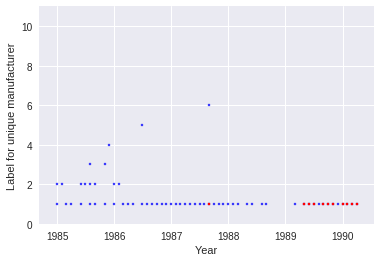

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/202319.pdf
2397778
0 5 914 58
2397781
0 7 545 17
2365017
6 21 2007 260
2397791
24 6 456 44

# points: 44  # errors: 24    # unique contractors: 6


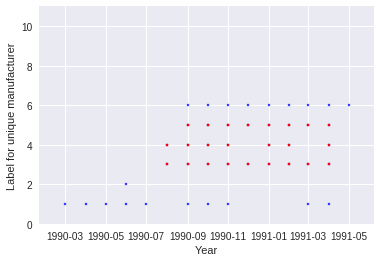

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2397791.pdf
2365029
0 3 455 17
2365030
0 1 759 22
5215854
0 1 61 2
2397808
0 5 2219 78
2365042
1 7 1095 89
2397811
0 7 883 19
2397821
0 5 761 25
2365054
0 1 180 6
5248647
0 1 89 1
2397833
2 5 364 20
2397845
0 4 1156 77
2365081
1 2 1066 2
202401
0 2 150 6
2365091
1 3 973 42
2397869
0 2 1521 56
2397870
0 3 425 8
20595656
0 4 454 28
503411
0 4 3376 154
2365111
0 6 637 53
104127
0 4 119 7
2397894
1 4 517 11
104140
0 1 423 8
2365133
0 1 30 1
5183182
0 1 242 8
2397912
0 1 972 25
2365145
0 3 698 23
2397924
0 7 3560 138
2365157
0 4 1856 60
2397936
0 2 213 7
5215994
1 1 180 4
104188
7 3 5902 139
2365182
0 1 486 15
2397951
0 3 1185 18
2397961
1 3 3286 91
2365194
0 3 242 22
2365200
0 2 699 3
2397973
0 2 1034 42
5216028
0 1 29 1
2397985
0 2 29 2
2365224
0 10 486 35
2397997
3 9 3958 227
2398001
0 10 852 55
2365236
0 2 272 9
5003572
0 1 30 1
2398011
6 9 1125 48
5216060
0 1 120 2
2365248
0 5 609 22
2365251
0 4 364 11
57

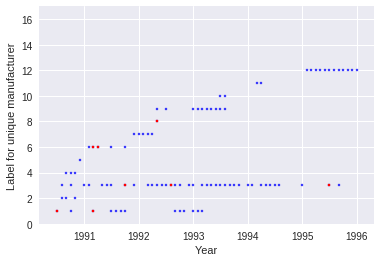

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2398281.pdf
2389782
0 2 152 6
2398291
0 1 1126 36
5254841
0 1 425 3
5281881
0 1 91 3
2365534
3 9 2190 99
2300000
4 5 1825 5
2398308
0 4 578 13
2398311
0 2 152 3
5216362
0 1 756 21
5281903
0 1 61 2
2398321
5 14 3651 109
5216370
0 1 30 1
2365558
0 1 29 1
2365561
0 1 972 28
2365571
0 5 1310 58
2398345
0 1 29 1
2365583
5 2 852 25
5216400
0 1 180 1
2398357
0 2 700 22
2398369
3 9 1187 89
2398370
0 5 1278 70
5216419
1 1 2078 12
5216427
0 1 181 7
2365613
0 4 576 12
2398382
0 5 944 35
2365625
1 3 911 43
2398394
2 3 426 15
2398400
0 1 91 3
2300099
1 1 29 1
2365637
0 3 333 23
2398412
0 2 242 5
2365649
2 5 668 15
2300114
0 5 515 33
2398424
0 4 911 9
2365818
3 3 1916 72
5216478
0 1 89 1
2398436
1 6 729 21
2365820
0 4 454 17
2365674
3 9 1005 60
2398448
0 3 515 13
2398451
2 9 1218 91
5642486
0 1 487 2
2365823
1 2 1368 18
5216508
0 1 364 1
2398461
0 4 608 27
2365698
0 2 606 6
2300163
0 1 30 1
2365704
0 4 1065 33
2398473


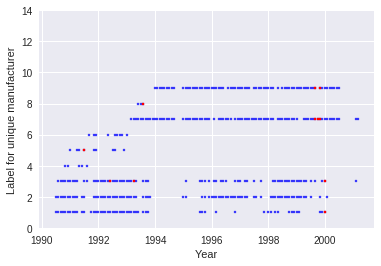

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2398540.pdf
2365777
1 5 791 50
2365838
0 4 698 20
2398552
0 3 517 29
405221
0 1 607 17
2365792
1 10 2068 137
2365793
0 3 423 15
2365794
10 2 913 30
2365795
0 1 759 11
2398564
0 3 761 23
2365797
0 3 608 12
2365798
0 1 60 2
2365799
1 6 1034 99
5290015
1 1 29 1
2365801
0 5 1003 46
2365802
0 5 698 26
2365804
1 4 730 45
2365805
0 3 1672 76
2365806
0 6 760 19
2365807
0 1 637 18
2398576
0 4 183 7
2365810
0 2 975 26
2365811
2 2 1276 45
2365812
0 4 1580 52
2365813
0 4 911 41
2300278
0 3 1094 33
2365815
0 2 729 21
2365816
0 3 639 21
2365817
0 4 849 23
104826
0 1 637 13
2365819
0 1 151 5
2398588
0 5 699 43
2365821
0 2 1034 24
2365822
0 4 822 32
2398591
2 5 2040 173
2365824
0 5 1003 77
2365825
0 3 424 16
2365826
3 8 1488 42
2365828
3 4 1460 14
2365829
0 1 1521 45
2365830
1 4 880 18
2365831
2 2 1824 49
2365832
0 1 791 23
2365833
1 1 150 5
2365834
0 1 333 8
2365835
0 1 29 1
2365836
0 1 29 1
2365837
0 6 729 27
2398606
1

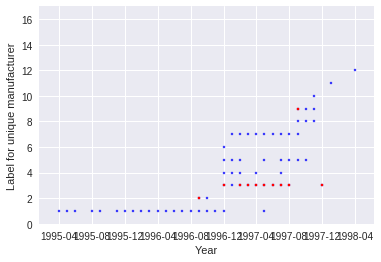

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2366054.pdf
2366055
5 3 883 26
2366056
0 1 485 12
2398825
0 1 30 1
2366058
0 1 2009 64
2366059
0 1 610 20
2366060
0 2 518 19
2366061
0 4 1248 105
2366062
6 6 1674 64
2366063
3 5 1733 89
2366064
0 2 944 59
5184113
0 1 364 9
2366066
0 1 152 5
2366067
4 1 3013 97
2366068
0 2 883 4
2366069
0 4 395 21
2366070
0 5 669 39
2366071
0 4 944 46
2366072
0 2 487 17
203385
2 2 2555 30
507601
2 5 3529 124
2365887
0 1 30 1
2366076
1 3 1399 25
2366077
0 1 243 3
2366078
0 1 61 2
2366079
0 3 670 29
2366080
0 6 517 45
2398849
8 7 3074 182

# points: 182  # errors: 8    # unique contractors: 7


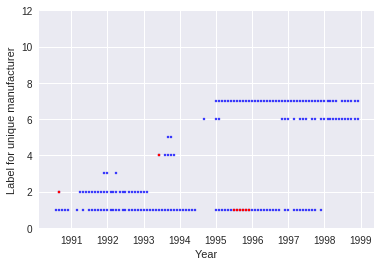

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2398849.pdf
2398850
1 8 1307 89
2366083
0 3 212 3
2366084
2 4 1399 54
2366085
1 3 426 12
2366086
0 2 668 17
2366087
1 5 487 26
2366088
2 3 1460 84
2365796
0 6 333 25
2366090
0 3 607 16
2366091
1 2 942 39
2366092
0 1 90 3
2398862
0 5 1368 23
2366095
0 1 212 7
2366097
1 3 638 21
2366098
3 1 2191 71
105107
1 1 849 23
2366100
0 2 244 5
2366101
0 1 942 30
2366103
0 3 760 39
2366104
1 3 760 43
2366105
5 3 2008 79
2398874
0 4 700 12
5216923
0 1 30 1
2366108
3 6 1673 97
2366110
0 4 701 31
2366111
0 1 304 10
2366112
3 5 758 15
2366113
0 1 365 11
203427
4 11 2798 173
2366116
0 6 1065 34
2398886
0 12 820 34
2366119
0 4 546 6
2366120
1 4 515 12
2366121
0 2 484 19
2366122
0 1 396 10
2366123
2 4 881 61
2366124
0 2 608 16
2366125
1 6 1033 18
2366126
5 6 1246 64
2366128
0 2 516 17
2366129
0 4 516 22
2398898
0 5 395 16
2366132
2 2 365 13
2366133
3 3 1429 49
5053110
0 1 29 1
2366135
0 1 181 6
2398904
0 3 973 49
5282489
0 4

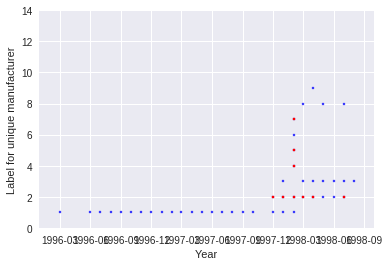

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2366187.pdf
2366188
0 1 486 13
2366189
2 1 1491 48
2366190
0 2 608 15
2366191
1 4 1398 55
2366192
1 2 546 7
2366193
0 4 244 11
2366194
1 1 272 4
2366195
0 1 152 5
2366196
0 1 90 3
2398965
1 1 911 29
2366199
0 4 394 26
5217016
0 1 30 1
2366201
0 1 243 4
2366202
0 1 60 2
105211
1 10 1185 91
2366204
0 1 29 1
2366205
0 2 275 9
2366206
0 1 1307 43
2366208
0 4 1369 50
2398977
2 4 516 5
2366210
0 2 91 2
2366212
0 1 151 4
2366213
3 2 1916 58
2366215
0 6 1033 108
2366216
0 3 637 37
2366217
0 1 515 11
2365911
0 2 303 2
2366220
0 2 121 5
2398989
0 2 119 5
2398990
0 1 90 3
2366224
0 1 29 1
2365912
6 3 456 11
2366226
0 1 336 10
2366227
1 3 910 32
2366228
0 3 1155 43
5249813
0 1 364 2
5085974
0 3 121 3
2366231
8 4 1824 89
2366232
1 3 578 26
400154
2 1 152 2
2399003
0 4 119 9
2366236
0 2 849 13
5249821
0 1 60 2
2366239
0 1 152 4
2366240
0 7 425 17
2366241
0 1 272 2
2366242
1 5 1488 49
2366243
1 7 791 38
2366244
0 5 974 

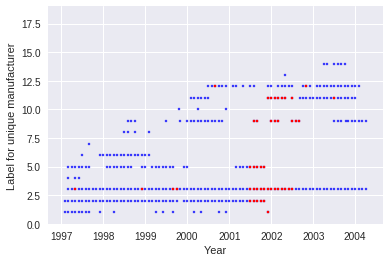

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2366318.pdf
2366319
1 2 244 8
2399088
0 2 850 24
2366321
1 2 1276 11
2366322
0 1 484 16
2399091
0 12 912 35
400245
0 2 637 14
5249910
0 1 60 2
2366328
1 3 364 11
2366329
2 3 787 30
2366330
4 7 1001 57
2366331
0 1 515 17
5217148
0 1 60 2
2366333
0 2 394 13
2366334
2 4 973 26
2366337
0 1 788 19
2399106
0 2 1246 44
2366340
0 2 182 2
2366341
2 2 336 7
2366342
0 2 90 3
2366343
0 1 456 10
2366345
0 2 394 16
2366346
0 3 1093 42
2366347
0 3 394 14
400270
0 3 333 12
2366351
0 5 545 11
2366352
4 2 1033 51
2399121
0 1 27 1
2366354
0 2 90 5
2366355
0 2 394 13
2366356
1 3 1340 68
2366357
0 2 242 9
2366358
6 4 1093 72
2366359
0 1 122 3
2366360
0 1 486 6
5249945
0 2 1980 2
2399131
0 8 1126 54
2366364
1 3 971 15
2366365
1 1 29 1
2366368
0 3 425 16
5055441
0 1 60 2
2366374
1 2 517 12
2399143
3 9 1794 49
2366376
0 2 364 17
2366377
0 1 27 1
2366378
0 2 275 3
2366379
2 4 699 32
2366382
0 1 1399 46
2366383
0 4 974 47
2366384


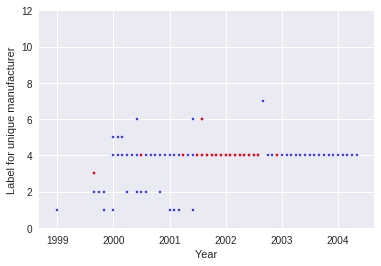

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2366397.pdf
2365941
7 7 1429 108

# points: 108  # errors: 7    # unique contractors: 7


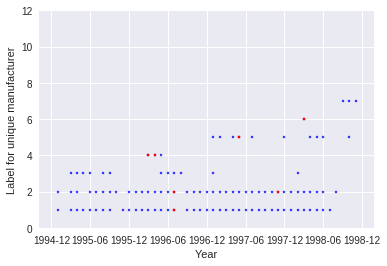

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2365941.pdf
2366400
0 2 122 3
2366401
0 4 456 25
2366402
0 3 517 22
2365942
0 2 364 4
2366407
1 4 395 11
2366408
0 1 30 1
2366409
1 2 394 10
2366410
0 2 242 9
2399179
0 4 912 20
5249996
0 3 182 4
2366415
0 2 29 2
400336
0 1 152 5
2365944
0 1 761 25
2366418
0 2 364 3
2366419
0 4 637 15
2366420
0 1 121 2
105429
2 7 3406 128
2300886
1 2 119 3
2366423
0 1 364 12
2399192
2 4 850 70
2366426
0 1 60 2
2366427
0 2 484 8
2366432
0 1 29 1
2366433
0 4 729 38
2366435
0 2 241 9
2366436
0 2 941 7
2366437
0 3 211 10
2366438
3 3 849 30
2300904
1 3 2555 9
2399209
0 2 1856 64
2399210
0 2 424 15
2366443
0 1 363 11
2366444
0 1 181 5
2366445
1 2 272 8
105454
1 4 2799 160
2366448
0 1 303 8
2365808
0 4 395 10
2366450
0 3 576 14
2366453
5 2 1337 66
2399222
2 3 1003 27
2366455
0 4 425 14
2366456
2 2 91 4
2366458
3 8 911 26
2366459
8 6 789 41

# points: 41  # errors: 8    # unique contractors: 6


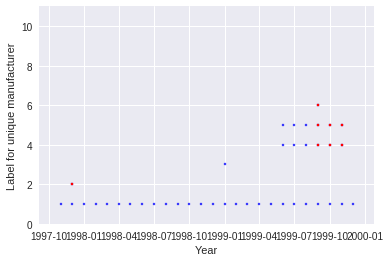

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2366459.pdf
2366460
0 4 272 12
2366461
0 1 30 1
2366462
11 4 1611 57
2366463
1 3 1125 12
2366464
3 2 1215 43
400385
0 1 29 1
2366466
0 2 698 22
2366467
0 1 303 9
2366469
3 4 608 21
2366470
0 1 89 3
2366471
0 4 486 31
2366472
0 1 698 14
2366474
1 4 1125 20
2366475
5 4 972 39
2366476
1 3 333 10
2365954
0 2 211 10
2399246
0 2 577 21
2366479
1 2 819 28
2366480
0 1 606 19
2366481
1 4 729 31
2366482
0 1 303 9
2365955
1 1 89 1
2366487
0 1 29 1
2366488
8 5 667 65

# points: 65  # errors: 8    # unique contractors: 5


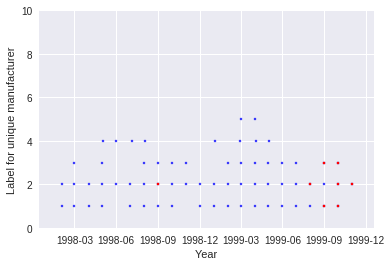

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2366488.pdf
2399258
0 4 272 15
2399261
1 5 1125 31
2366494
0 3 302 8
2366495
4 5 1519 44
2366496
0 3 668 21
2366498
0 1 364 6
2366499
0 1 272 9
2366500
0 2 210 3
2366501
0 4 667 26
2399271
0 2 546 16
2366504
5 4 578 32
2366505
0 1 29 1
2366507
0 1 121 4
2366508
0 3 241 11
2366509
4 2 1490 50
2366510
1 5 484 10
2366511
3 5 606 27
2366514
1 3 91 6
2399283
2 5 1034 42
2366517
4 7 729 38
2366518
1 1 29 1
2366519
0 2 90 3
400440
0 1 1794 59
2360500
0 1 91 3
2366523
0 3 516 24
2366525
0 1 333 10
2366526
0 1 515 14
2399295
2 5 1491 58
2366530
0 2 180 3
2366532
0 3 333 27
2399301
0 1 180 5
2366534
0 3 274 11
2366537
0 2 544 4
2366538
0 1 394 8
2393271
0 3 2559 7
2366540
4 6 944 48
2366541
0 1 213 7
2366542
1 2 788 16
2366543
0 1 303 6
2366544
0 2 791 31
2399313
0 2 975 45
2366546
1 1 29 1
2366547
1 3 760 17
2366548
1 2 302 9
115897
0 2 272 4
2366553
0 2 333 10
2366554
3 5 636 21
2366555
0 1 303 9
400476
3 7 1550 

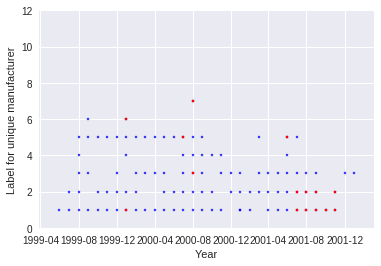

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2366724.pdf
2366726
5 2 699 44
2366729
0 1 29 1
2366730
4 2 822 31
2366733
1 3 638 26
2366734
0 1 303 9
2366735
0 2 212 3
400658
0 2 1825 38
5250323
0 1 91 2
2366740
13 5 852 47

# points: 47  # errors: 13    # unique contractors: 5


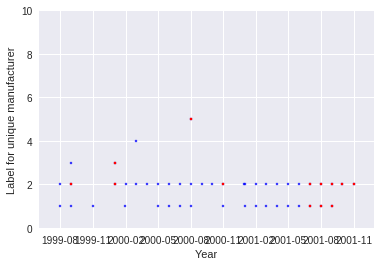

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2366740.pdf
400661
0 1 180 1
2366744
0 4 365 5
2366745
3 1 456 15
2366746
2 3 791 31
5250331
0 1 30 1
2366748
12 4 1004 65
2366749
0 2 334 12
2366750
2 2 334 16
400671
1 6 910 33
2399520
0 4 761 28
2366754
2 2 1399 44
5217571
0 1 272 1
5283108
0 1 30 1
2301222
0 2 150 7
2366759
1 1 180 6
2366760
1 1 29 1
2366761
1 3 181 3
2366762
3 4 576 36
2366763
5 4 516 24
2399532
1 10 1337 68
2366002
1 4 821 7
2366766
3 4 457 16
2366769
1 1 29 1
2366770
2 3 1063 27
2366003
0 2 304 12
2366772
0 1 454 7
2366773
12 5 1977 61

# points: 61  # errors: 12    # unique contractors: 5


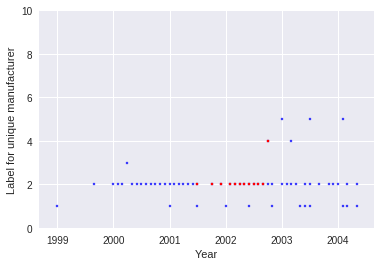

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2366773.pdf
2366774
0 2 273 11
2366776
6 1 790 25
2366777
1 1 638 17
2366778
8 1 790 24
5283132
0 1 60 2
2366782
0 1 27 1
2366783
4 1 243 8
5217601
0 2 606 2
2366786
2 1 608 20
2366787
7 6 730 33

# points: 33  # errors: 7    # unique contractors: 6


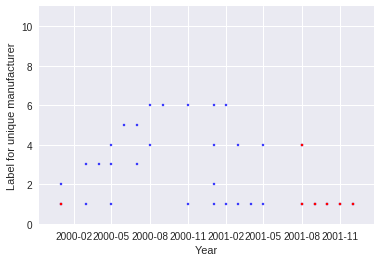

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2366787.pdf
2399556
0 6 730 35
2366789
0 1 213 4
2366792
0 1 303 10
2366795
0 1 58 2
2366796
0 1 272 9
105806
0 3 2129 64
2366799
0 2 455 17
2399568
1 9 485 29
2366801
6 1 698 16
5053778
0 1 29 1
2399571
0 1 122 4
2366805
0 1 58 2
2366806
0 1 304 2
2366807
2 1 548 18
2366808
0 3 303 11
2366810
1 3 729 6
2366811
0 1 364 10
5217628
0 1 272 1
2399581
0 5 516 27
2366816
11 5 1276 63

# points: 63  # errors: 11    # unique contractors: 5


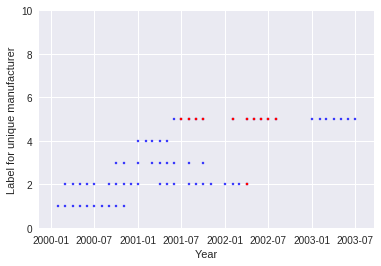

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2366816.pdf
400737
0 1 1399 39
2366818
2 1 577 18
2366819
7 2 761 24
5217636
0 1 517 3
105831
1 2 637 24
2366824
0 1 121 3
2399593
0 3 395 18
2366827
0 2 274 18
5217644
0 1 1987 11
400750
0 5 1215 27
2366832
0 3 182 8
2399601
0 3 333 10
2366834
2 3 1216 75
2366835
11 5 760 24

# points: 24  # errors: 11    # unique contractors: 5


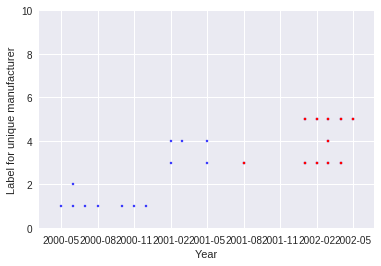

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2366835.pdf
2366836
0 1 90 3
2301301
68 11 1580 186

# points: 186  # errors: 68    # unique contractors: 11


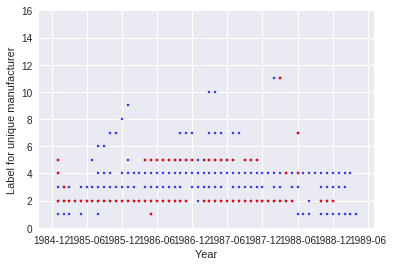

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2301301.pdf
2366839
0 1 244 5
2399611
0 4 424 30
2366844
15 3 1307 50
2366845
15 1 821 27
2366846
0 1 29 1
2366848
41 3 1399 80
2301313
2 3 1002 30
2366852
0 1 60 2
2399623
0 2 426 14
2366859
0 1 272 8
2366860
2 1 363 7
2366861
1 1 425 3
5217679
0 1 29 1
2366864
3 3 424 6
2366865
13 3 1337 50
2366913
13 1 548 17
2399635
1 7 1430 88
2366868
0 1 152 5
2366869
2 3 394 17
2366870
15 4 1217 32
2366871
0 2 180 5
2366874
0 1 29 1
2366875
0 2 58 3
2366876
19 2 1246 42
2366877
3 2 668 7
2366878
16 2 1276 51
2399647
0 1 607 19
2366880
8 2 812 20
2366881
0 2 210 8
2366883
0 1 30 1
105892
0 3 484 25
2366886
9 3 456 22
2366887
2 1 241 6
2366888
0 3 120 12
2399659
0 2 944 29
2366892
0 1 546 18
2366893
3 4 333 12
2366894
2 1 60 2
2301362
1 1 242 4
2366899
0 1 58 2
2366900
0 2 454 5
2366901
0 1 180 4
2366902
9 1 515 15
2366903
5 3 818 29
2399672
0 4 274 11
2366905
7 3 364 13
2366906
0 1 60 2
2366909
2 1 58 2
2366910
17 4

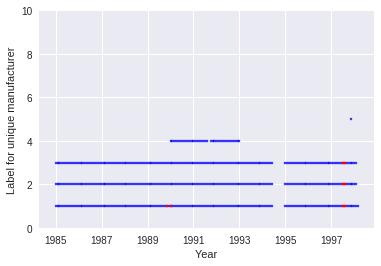

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/500148.pdf
401845
0 1 545 18
500151
2 6 2006 116
500153
0 2 423 16
401857
2 3 849 3
5218756
0 1 390 4
5218764
0 1 183 1
401870
0 1 1582 41
2366200
0 2 517 5
106963
0 3 2067 29
500185
0 1 1197 26
2366203
0 2 821 24
500197
1 9 1154 47
401894
0 6 1063 48
500203
7 13 2128 93

# points: 93  # errors: 7    # unique contractors: 13


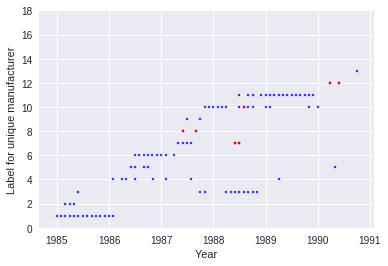

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/500203.pdf
5284333
0 1 180 1
106999
1 4 1763 71
401912
0 1 29 1
5087740
1 1 152 5
5251583
3 1 152 4
5251591
4 1 121 4
205321
0 4 548 16
5284368
3 1 237 8
5251605
1 1 30 1
5284376
0 1 30 1
401948
2 2 729 20
401951
10 10 6146 203

# points: 203  # errors: 10    # unique contractors: 10


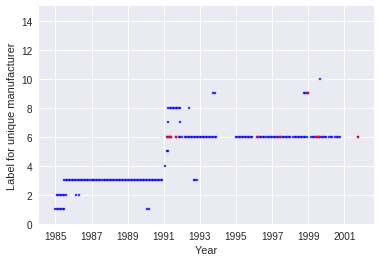

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/401951.pdf
5251621
0 1 211 1
401961
0 3 545 14
2306141
0 1 183 5
205369
0 4 484 37
411061
0 5 1126 24
500288
1 5 849 34
500291
0 4 760 26
5251656
5 5 2069 44
2366221
0 2 760 23
402001
6 4 1185 67
107098
4 17 3467 261
402011
0 3 849 33
500318
0 2 545 17
402023
9 10 6723 289

# points: 289  # errors: 9    # unique contractors: 10


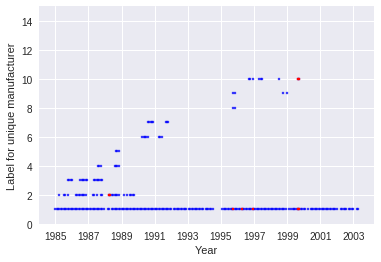

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/402023.pdf
5218926
10 1 825 16
5251702
0 1 729 4
107128
0 2 272 2
402047
1 8 1945 46
2366230
0 3 455 7
2302603
2 1 910 22
402060
1 4 272 16
500380
3 4 545 33
2366234
2 2 1277 43
205473
0 1 670 20
2366235
0 2 545 3
12203494
11 4 2770 175
2366237
0 2 363 7
402096
2 4 1794 52
402102
0 1 180 2
402114
27 4 5201 101
500422
0 2 668 7
20590711
0 9 1733 221
107219
5 27 1856 130
5251796
1 1 30 1
402138
0 5 637 38
107232
0 1 336 4
402159
2 1 327 9
5251826
0 1 304 2
500471
5 1 3345 95
402175
0 1 30 1
500483
2 3 943 13
509401
7 7 2034 58

# points: 58  # errors: 7    # unique contractors: 7


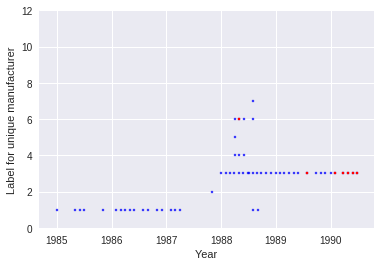

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/509401.pdf
2366255
0 4 1277 99
5251885
0 1 365 1
2366259
1 4 486 12
402230
0 3 272 15
500537
1 5 1094 26
402242
0 4 515 35
500549
2 7 680 37
402254
0 1 27 1
500562
2 15 3436 65
700563
0 1 7 1
500598
0 8 2098 29
2366271
3 4 1245 69
500604
0 1 760 23
2393578
1 2 242 5
2366272
1 6 1155 48
402308
1 8 3985 106
402311
5 8 2891 104
2302883
17 14 4533 327

# points: 327  # errors: 17    # unique contractors: 14


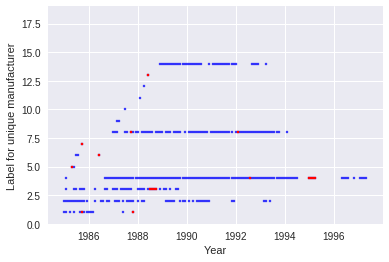

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2302883.pdf
205734
0 5 1794 20
2366279
0 2 303 11
5249864
0 1 30 1
5252024
0 1 365 1
500665
9 2 3102 80
205758
4 18 4016 268
402369
5 11 3286 196
107463
2 5 2798 121
2366284
7 4 546 33
2366285
0 1 1430 43
500689
0 2 150 6
500690
0 12 2098 72
205783
7 13 6572 286

# points: 286  # errors: 7    # unique contractors: 13


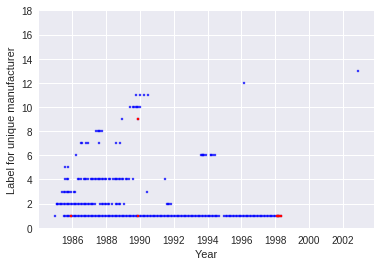

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/205783.pdf
402400
0 1 27 1
400208
1 5 2768 68
2302949
1 2 1794 2
402424
0 1 30 1
2302974
6 7 1794 88
402436
0 2 819 28
2366296
0 2 637 24
402451
5 5 1369 46
2366297
0 3 515 31
402461
2 6 1063 38
500768
2 7 1276 47
500771
0 4 272 32
500793
0 4 2090 52
2303036
0 1 211 7
500801
0 1 1703 47
402503
0 14 1915 170
205898
2 3 607 8
5211662
0 1 58 1
500823
1 1 30 1
2303073
1 1 29 1
107621
1 7 395 17
5252199
0 1 244 1
500847
0 3 89 4
2366313
0 2 788 34
500884
1 3 2799 52
5252245
0 1 101 4
107670
4 10 2676 117
9905303
0 1 89 1
2366973
5 1 850 14
402588
0 5 1338 32
2366320
0 1 423 10
9905315
0 1 84 3
402606
0 2 668 23
500914
0 2 150 8
5219507
1 4 547 4
9905339
4 1 3110 70
2303164
0 3 1825 49
402621
0 4 941 26
2366325
0 1 29 1
2366326
0 2 302 5
5252296
2 4 3875 21
5285070
0 1 121 1
402643
0 3 364 16
9905364
0 2 595 19
20596260
3 4 1674 74
9905376
2 4 2061 57
500963
1 2 2586 83
5219558
0 1 30 1
2366332
0 3 423 9
402667

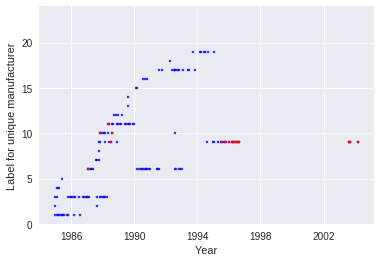

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/402692.pdf
2366338
1 1 1124 30
5285135
0 1 364 5
5252377
0 1 182 3
206106
0 3 1550 58
501037
1 1 1428 38
411188
1 8 911 39
501074
1 2 1460 42
2399118
0 2 395 14
5055830
0 1 27 1
206167
2 8 698 34
107876
6 11 2646 135
5088613
0 1 697 3
2366353
0 1 517 15
501098
0 2 272 16
402801
0 1 515 17
2303346
10 5 788 39

# points: 39  # errors: 10    # unique contractors: 5


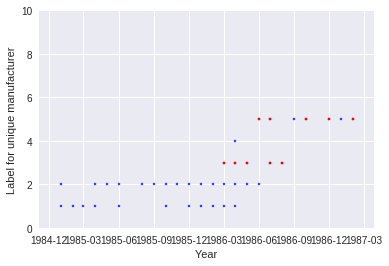

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2303346.pdf
501116
13 3 3376 100
2303371
0 2 2798 2
2366361
0 4 609 32
206234
1 6 2098 27
2000453
2 1 2890 43
5219744
0 1 213 1
501153
0 1 423 13
13201649
0 1 61 2
206258
0 1 30 1
2303413
0 2 454 6
402874
0 1 29 1
206271
2 8 1641 88
501190
0 1 849 10
2366370
0 2 729 26
206295
2 6 1672 122
501220
3 7 1276 76
2366375
0 5 609 21
402928
0 2 1307 42
5219825
0 1 183 1
5252598
0 2 214 3
501244
4 13 1733 115
402941
0 3 1884 65
2303486
0 1 30 1
206349
0 1 335 11
501264
2 4 3041 218
501268
0 2 272 9
501271
0 5 2433 18
206362
1 3 760 17
402977
11 2 6848 147
206374
0 1 30 1
501293
1 1 426 12
2366387
0 1 729 21
206398
1 5 697 31
2366987
2 2 363 11
501323
0 3 302 15
206416
5 19 2280 226
2366393
4 3 308 11
5219930
0 2 91 2
206428
1 3 2485 151
501347
0 5 3255 116
403052
0 1 1035 22
501360
2 4 1825 18
700691
0 1 698 23
5219957
0 1 91 1
2366399
0 1 303 10
501372
2 7 2341 79
5150462
0 1 90 3
2303619
4 9 4594 253
2303620
0 1

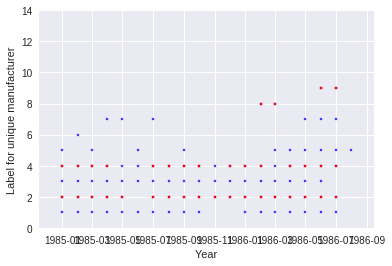

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2303693.pdf
108251
5 16 1945 124
2366416
0 3 698 32
501475
3 6 3954 158
108261
1 11 2159 129
2366417
0 1 29 1
403179
1 1 334 5
403180
10 1 6938 96
206581
1 1 30 1
403192
1 2 729 40
501499
0 7 729 15
2366421
0 1 119 2
2363720
0 5 820 31
501505
0 1 89 1
2306347
2 9 3832 142
2366422
0 1 60 2
501517
0 1 60 2
403222
1 3 272 5
5154583
0 1 545 5
5285658
0 1 180 1
5285666
0 1 180 1
5285674
0 1 364 2
5285682
0 1 180 1
2303796
0 1 395 3
5285690
0 1 180 1
403271
0 4 849 34
5285704
0 1 180 1
5056329
1 2 3104 4
501578
0 1 83 1
5285712
0 1 180 1
403283
1 5 882 26
5285720
0 2 362 3
206684
1 7 851 33
403295
0 1 30 1
403301
2 7 2494 139
501608
0 10 423 39
5285739
0 1 180 1
403313
0 1 89 2
501621
0 3 515 12
108406
1 6 1002 37
5285755
0 1 180 1
2366442
0 1 180 1
5299179
0 1 30 1
403349
0 6 3590 174
501657
0 1 2190 8
2303899
0 5 941 39
2303905
3 18 4685 256
403362
0 3 272 15
501670
3 3 2190 10
2366449
0 2 363 13
403374
0 1 2

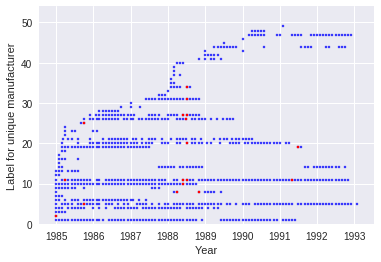

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/9100283.pdf
403428
3 18 3286 157
403431
1 3 303 8
501736
0 1 84 1
403441
1 3 2465 78
108534
0 1 545 16
403453
0 1 729 19
700757
1 2 303 10
2366465
0 1 241 6
403465
0 6 517 19
2304016
10 10 2952 203

# points: 203  # errors: 10    # unique contractors: 10


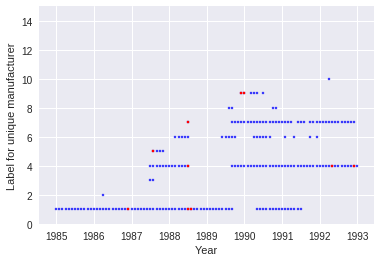

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2304016.pdf
403477
0 1 180 2
501785
10 6 2799 114

# points: 114  # errors: 10    # unique contractors: 6


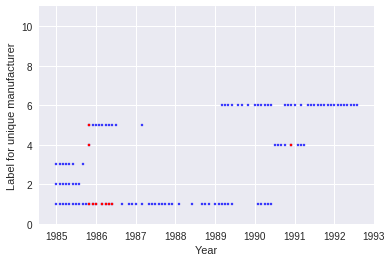

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/501785.pdf
2304028
0 3 2037 23
5285917
1 1 30 1
6203425
2 3 3559 107
405851
1 1 175 2
501797
0 2 272 4
403520
0 2 760 38
700769
1 10 2190 48
5253195
0 1 242 8
5154893
0 1 58 1
501839
1 1 913 22
5285968
0 1 272 1
6203474
0 1 30 1
5253217
0 1 33 1
403556
0 1 667 19
2363732
0 2 60 3
2366483
3 5 759 30
501876
0 1 89 3
2304119
0 1 242 5
5253241
1 1 364 1
2306414
7 13 2707 153

# points: 153  # errors: 7    # unique contractors: 13


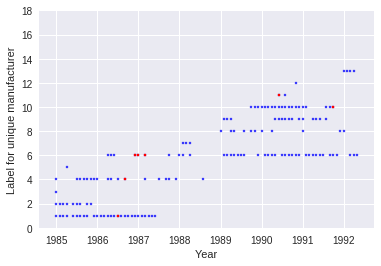

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2306414.pdf
403611
3 8 1063 54
2304156
4 5 2310 81
403623
0 3 3893 39
2304168
0 1 150 4
2304171
7 17 2098 131

# points: 131  # errors: 7    # unique contractors: 17


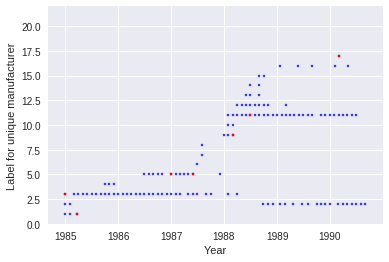

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2304171.pdf
5253292
0 1 15 1
2366493
1 2 1276 42
403635
0 1 213 7
600246
1 1 183 1
6203577
0 2 244 3
2304193
0 1 272 1
5253314
0 1 273 1
403660
0 2 760 18
501979
0 3 2572 10
207068
0 3 150 11
600295
0 2 34 2
12200171
5 1 1123 80
600301
0 1 364 1
403696
2 6 1611 53
207093
5 13 5231 153
403702
1 11 2737 84
5220610
0 1 60 1
108807
19 10 6207 644

# points: 644  # errors: 19    # unique contractors: 10


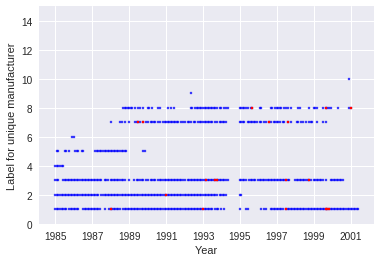

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/108807.pdf
12200201
3 4 576 23
116439
1 1 183 1
5286158
0 1 30 1
600337
3 9 3041 273
5286166
0 1 29 1
403741
0 2 852 5
108832
0 3 1580 57
502054
0 1 760 25
403763
12 5 1125 40

# points: 40  # errors: 12    # unique contractors: 5


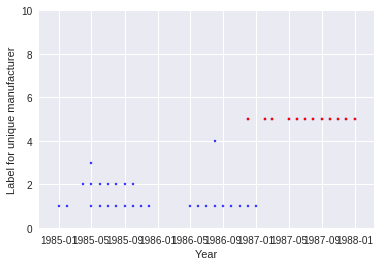

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/403763.pdf
411358
0 1 181 2
108856
0 1 30 1
5253438
0 1 121 2
403775
0 4 760 29
5187904
0 1 84 3
403787
0 1 484 11
2366521
0 1 214 3
5155162
0 1 364 1
502111
3 2 2401 77
403817
2 1 1063 30
5286255
0 1 60 1
12200304
1 1 58 2
502133
0 5 1460 54
403830
0 6 1095 60
2366527
0 2 272 11
502145
1 2 1825 49
12200328
0 3 668 59
12200331
0 2 89 6
502157
1 3 1185 27
403854
3 4 1703 47
502169
2 6 3224 120
403866
1 6 1246 32
108959
1 6 2067 121
2304417
0 3 153 6
502182
14 6 2615 47

# points: 47  # errors: 14    # unique contractors: 6


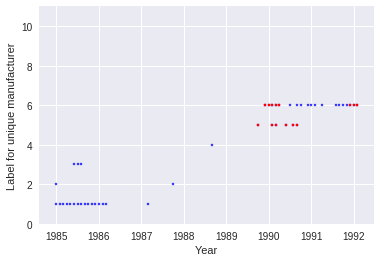

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/502182.pdf
403881
1 3 1125 64
207275
0 5 1185 54
2304429
2 1 515 17
502194
0 1 302 1
502200
8 9 2860 186

# points: 186  # errors: 8    # unique contractors: 9


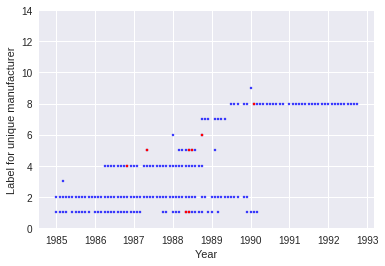

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/502200.pdf
5056962
0 1 30 1
2366539
2 3 1065 19
403908
0 1 303 10
12200389
0 3 119 10
502224
2 2 1764 102
600532
0 4 637 10
12200407
2 4 913 17
5286360
0 1 29 1
502236
1 4 2768 192
600544
0 2 729 23
2366545
0 3 241 15
403945
0 3 607 25
5155320
0 1 49 2
600571
2 2 4137 119
12200444
1 3 58 4
5253632
0 2 427 5
403969
0 6 819 43
109058
0 1 760 25
109061
1 1 27 1
207366
3 5 2890 107
12200456
0 1 30 1
5220874
0 2 359 14
6203917
0 1 29 1
5155344
0 1 60 2
2304533
0 2 150 6
502297
0 5 2190 140
502303
0 1 2129 37
2304545
0 2 1246 18
5220904
0 1 29 1
2366556
1 1 152 5
5220912
0 1 30 1
6203954
0 1 910 7
404019
7 2 2006 63
502327
4 10 2811 49
109113
0 2 3132 120
600635
2 2 2433 42
12200511
4 9 576 58
502339
2 7 515 36
502340
0 1 788 23
2366561
2 2 547 19
12200535
0 2 670 6
404056
0 1 180 6
207457
4 5 2221 67
12200547
4 10 1217 34
404071
2 2 1215 4
2366567
3 1 516 17
12200559
0 12 882 40
12200560
3 1 1095 36
404081
0 3

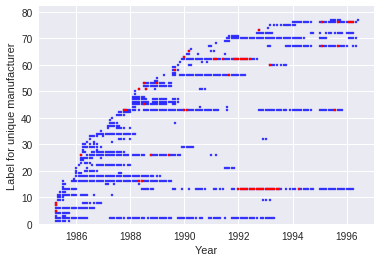

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/12200572.pdf
404101
8 9 2340 150

# points: 150  # errors: 8    # unique contractors: 9


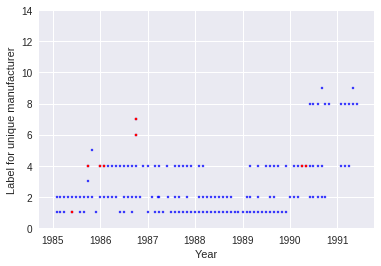

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/404101.pdf
12200596
0 1 150 4
2304661
0 2 1307 7
404123
0 1 515 17
502431
2 4 729 9
2366576
7 8 883 43

# points: 43  # errors: 7    # unique contractors: 8


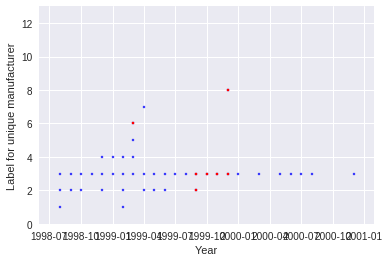

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2366576.pdf
600738
2 1 152 4
600741
0 1 1733 52
2366577
0 1 303 10
5253802
0 1 29 1
12202441
5 3 852 33
6204089
3 1 1094 36
2366581
0 1 30 1
404160
0 5 484 48
207561
1 4 333 16
404172
4 2 1550 56
5221072
0 1 91 1
12200671
0 2 244 2
2304739
28 48 2921 601

# points: 601  # errors: 28    # unique contractors: 48


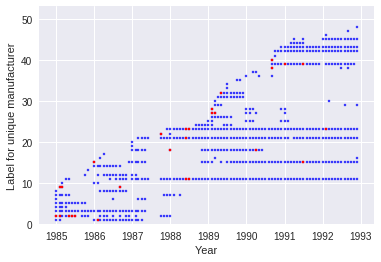

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2304739.pdf
404196
1 2 670 20
5221099
0 3 121 9
700885
6 2 4479 130
502534
0 4 788 44
207627
1 8 4137 163
2366594
0 2 333 10
5221137
0 1 548 15
1300994
0 2 609 15
5253918
0 1 30 1
5253926
0 1 181 6
404263
4 4 2587 45
502571
0 1 698 23
5253934
0 1 118 4
207664
0 1 1092 2
2366600
0 2 58 3
2304818
0 2 364 16
502583
3 4 1460 31
109381
9 4 4898 240
502601
5 1 3345 97
5221196
0 1 121 4
5057358
0 1 30 1
5286735
1 1 30 1
2366606
3 1 333 11
600921
1 4 242 15
2366608
1 2 699 20
2304879
2 3 1338 46
2366611
1 2 576 14
2393918
4 3 455 21
2317461
0 1 119 4
5162816
0 1 180 1
20596545
0 1 334 11
207755
1 1 2981 95
404366
1 6 729 49
2304922
3 7 1094 50
2366618
0 1 30 1
109472
10 4 3011 41
601007
0 3 1307 50
2304946
7 14 1764 108

# points: 108  # errors: 7    # unique contractors: 14


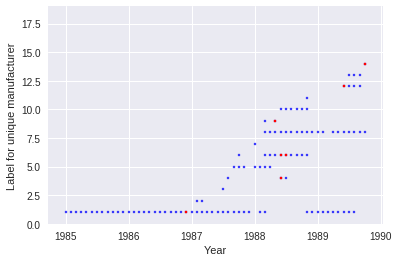

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2304946.pdf
109502
0 3 1094 60
207809
0 1 1582 36
2365943
2 7 1945 58
502728
1 2 242 6
2304971
4 8 1915 37
404433
0 2 729 9
2366627
0 2 302 7
502741
0 3 941 12
109526
1 8 3286 124
5155800
1 1 760 23
207834
1 16 2799 164
2306554
18 20 2646 94

# points: 94  # errors: 18    # unique contractors: 20


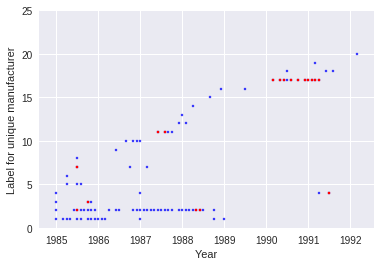

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2306554.pdf
2366629
0 1 29 1
502753
1 4 1726 98
2399398
3 10 3043 116
601068
0 2 486 2
109551
1 2 2098 18
207858
0 2 121 7
109563
0 1 241 6
5221374
0 1 29 1
207871
0 3 698 26
109575
0 4 1368 37
2366636
2 3 1431 6
2366637
1 1 182 6
207895
0 4 819 32
502819
0 2 1033 16
5221412
0 1 213 1
207913
0 4 1705 14
404524
0 3 454 17
5254191
0 1 364 1
5286964
0 1 272 1
207925
2 5 943 29
207937
0 2 423 11
404548
0 1 545 16
5221447
0 1 211 7
5004471
0 1 27 1
207949
0 1 517 9
404561
0 2 121 3
502871
0 2 809 10
2366650
0 1 29 1
502881
0 2 2221 4
207974
0 3 517 9
404585
0 1 819 21
502893
0 11 2494 74
404597
4 9 1945 83
5057656
0 1 182 1
404603
0 1 423 13
5188741
0 1 364 1
502923
0 5 423 15
700952
0 5 515 33
5057693
0 1 30 1
404639
3 1 2310 62
601251
3 2 4137 121
404652
2 16 3955 205
502959
1 6 576 35
502960
5 1 3041 85
502972
0 5 3041 94
502984
1 6 2249 84
109770
2 4 698 29
2305227
0 3 1125 29
404706
0 1 263 7
5647587
0 1 

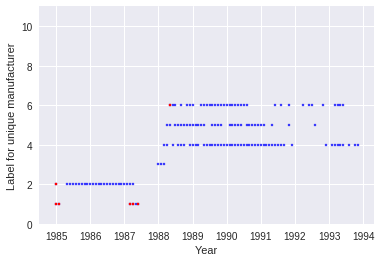

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2305562.pdf
5221919
0 1 149 1
405024
0 3 637 31
5287464
0 1 364 3
20590125
2 10 2890 100
5221935
3 4 2770 45
5221943
0 1 59 2
110139
3 3 1185 29
503356
2 6 1724 91
405061
2 6 3832 147
2366288
0 2 1947 3
503368
0 6 1307 42
2305616
1 5 1578 87
20590162
10 8 1703 23

# points: 23  # errors: 10    # unique contractors: 8


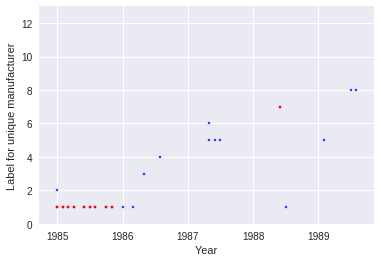

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/20590162.pdf
110164
0 1 30 1
2305631
0 1 1519 40
5254752
0 1 30 1
5156452
0 1 214 6
405097
0 2 637 2
20590186
4 12 1611 83
2366738
0 1 60 2
5287537
0 1 272 1
2399507
0 5 150 8
20590198
3 6 5262 147
405115
2 6 941 74
110206
2 6 2098 72
2366741
0 1 60 2
2305665
1 4 1094 78
110218
3 1 213 6
2305677
9 2 515 11
2305690
0 1 183 5
20590241
0 1 2463 75
2366747
2 1 1066 31
503460
2 8 2952 74
20590253
1 14 211 37
110255
1 3 2951 108
5254833
0 1 577 9
20590265
0 3 272 10
503484
2 1 578 6
2366752
3 1 607 19
20590277
0 1 819 16
503496
3 1 1338 39
503502
0 2 157 5
5254868
0 1 30 1
405206
0 4 273 12
2366756
4 4 1033 22
503514
0 1 2129 67
6205148
1 1 29 1
6205151
0 5 211 15
2317606
0 1 58 2
2366225
0 5 972 86
20590320
0 2 272 21
2305781
0 3 1033 33
700150
1 3 1825 61
405243
0 2 58 4
503551
4 2 305 5
2366764
1 2 425 5
5254922
0 1 180 1
2366765
1 1 150 5
20590371
0 2 119 6
405292
0 2 213 6
20590381
7 19 2646 135

# points:

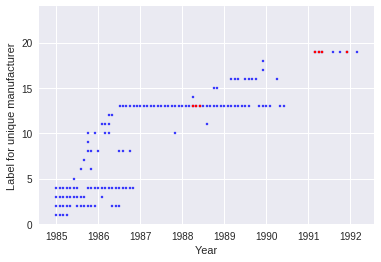

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/20590381.pdf
503599
7 2 1276 22
2361310
0 4 880 71
20590401
2 1 2463 78
2367064
0 1 29 1
20590411
0 1 119 4
405334
0 1 150 1
105788
0 9 1884 171
5222257
0 2 152 7
503666
1 13 2036 87
405371
2 2 2068 32
503678
0 7 2006 29
2394091
3 7 1644 44
2366788
5 4 638 29
5255066
0 1 364 1
503711
1 4 484 24
20590502
0 1 211 6
5222311
2 2 1309 27
2305963
0 1 30 1
405437
0 1 668 20
503745
1 5 303 23
405449
1 2 88 2
20590538
8 12 7059 198

# points: 198  # errors: 8    # unique contractors: 12


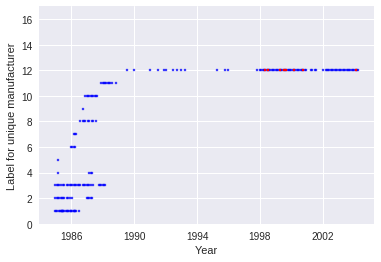

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/20590538.pdf
20590541
0 3 272 11
2366798
0 3 395 18
5222362
0 1 60 1
5287901
0 1 60 2
405474
1 12 1856 81
20590563
1 1 545 7
110565
0 3 941 30
12201965
2 1 922 74
2366803
0 2 454 25
20590605
2 3 2249 67
405528
0 4 1033 48
2366813
10 3 790 21
503861
0 4 1094 51
2306116
0 1 30 1
2366817
3 3 763 19
405577
0 4 788 10
5288010
0 2 119 2
2306128
1 5 701 17
405590
2 9 2037 118
2366820
0 2 182 2
5255260
0 1 30 1
5288029
0 1 272 1
110693
1 6 1794 70
503915
1 4 2432 13
5288045
0 1 303 9
20590708
0 1 454 6
5010110
1 3 243 20
503927
0 1 213 4
405632
2 8 1063 62
20590721
2 5 729 37
503940
0 1 941 23
2366828
3 1 91 3
503952
0 1 30 1
5189779
0 1 119 4
2366830
11 4 578 38
405656
9 4 2921 99
20590745
4 9 6146 212
2317679
1 5 272 31
503964
0 2 760 14
5010118
1 2 853 19
2366833
2 1 60 2
20590770
1 6 1610 34
503988
0 1 364 2
405693
0 21 3163 143
20590782
1 1 2098 60
504002
0 3 264 5
700629
0 2 180 8
2389991
0 5 759 48
504026


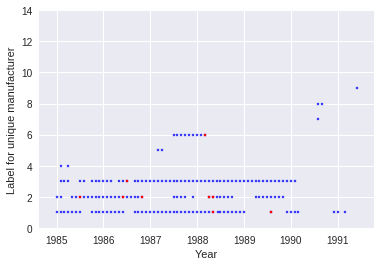

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/406016.pdf
2366891
1 2 180 5
12202507
5 2 727 25
20591117
3 11 3863 251
504336
0 1 607 9
12202519
1 2 729 21
12202520
0 3 1155 4
5310957
0 1 91 1
504348
0 8 454 30
504351
3 9 3161 121
12202532
2 13 1948 107
20591142
2 15 1795 103
5288711
0 1 364 1
5255724
0 1 30 1
12202556
1 2 1033 37
504385
1 1 4686 137
111171
0 4 2432 97
5222982
1 1 2737 4
12202568
0 6 790 13
20591178
0 2 395 6
12202571
0 1 242 2
5222990
0 1 274 1
2366904
0 1 27 1
510051
0 2 395 9
5288533
0 1 364 1
5255767
0 1 30 1
5223008
0 1 911 26
2306657
9 30 1794 221

# points: 221  # errors: 9    # unique contractors: 30


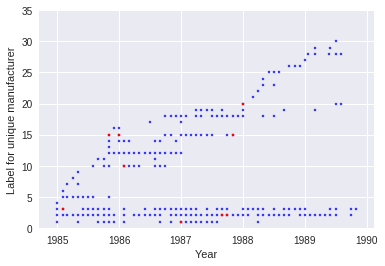

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2306657.pdf
12202601
3 3 1763 53
20591211
0 5 545 35
701038
0 2 729 21
701041
0 2 545 17
12202611
0 8 941 45
406132
0 1 60 1
20591221
0 3 119 6
504440
0 4 515 32
406144
3 17 1307 113
504452
0 1 117 13
701063
5 8 2463 16
5288584
0 1 61 1
5286956
0 1 272 1
701075
0 1 59 2
12202647
2 2 1764 61
20591257
0 6 545 38
5223067
0 1 1580 9
406181
0 1 2921 87
20591270
3 10 1276 66
701099
0 2 150 5
701105
0 1 88 2
406201
0 2 1340 20
12202684
0 2 174 2
2361462
0 3 334 17
12202696
22 6 5021 165

# points: 165  # errors: 22    # unique contractors: 6


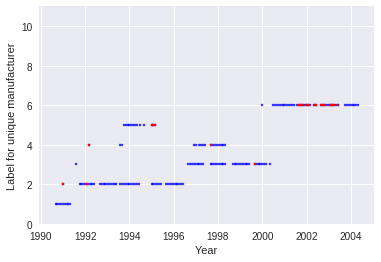

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/12202696.pdf
701130
1 1 389 4
406223
0 1 454 10
20591324
0 5 484 23
5288673
2 1 426 4
5288681
0 1 27 1
701166
0 1 675 5
20591348
0 6 698 33
2366933
0 1 364 12
701191
0 1 1674 22
5223180
0 5 2739 23
111375
0 1 89 3
504592
0 4 423 20
701208
0 2 1309 3
504610
1 8 3102 112
9100763
7 11 2860 160

# points: 160  # errors: 7    # unique contractors: 11


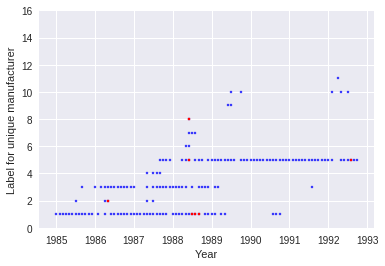

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/9100763.pdf
20591397
0 1 274 1
5288754
0 1 639 12
406341
14 1 608 15
504658
3 5 729 47
504661
3 2 698 19
406363
2 9 788 69
5288797
0 1 30 1
111454
0 5 1794 59
5288800
0 1 152 3
20591464
1 8 2768 57
111466
0 2 454 15
504683
1 16 3194 135
5288819
0 1 214 2
111481
1 8 2737 145
5288827
0 1 333 5
504701
3 4 385 17
2306943
0 2 668 22
5059471
0 1 29 1
2700177
0 1 508 15
2366958
3 2 60 3
2306967
4 3 849 22
104097
1 2 395 13
2700189
0 1 963 30
504737
0 3 119 8
2366010
6 10 2801 46
406442
6 1 1886 16
20591531
0 8 1460 75
504750
2 5 2169 62
2700207
0 1 1399 45
20591543
1 14 1674 79
504762
3 6 1580 60
2700220
0 1 229 4
20591555
0 2 1705 16
504786
1 1 515 16
2366970
0 1 29 1
5223393
0 1 180 1
504804
1 3 1460 6
5190630
0 1 365 1
20591592
0 1 60 2
2700268
0 1 3063 94
5223407
0 1 1338 40
5223415
2 3 2344 9
2700281
1 2 5772 161
20591610
6 11 4747 169
504828
3 1 667 17
20591622
4 8 1002 70
2366977
4 1 121 4
504841
1 5 3164

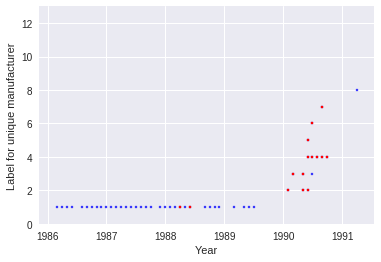

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/12203093.pdf
504920
3 2 1794 104
5092450
0 1 30 1
5146811
0 1 29 1
12203111
0 2 1642 29
406636
0 2 152 6
5256313
0 3 120 5
406651
0 1 27 1
504956
1 9 3955 122
12203135
1 4 1215 36
5289092
0 1 392 11
20591749
0 2 119 3
504971
0 3 814 25
10204306
1 2 29 2
12203159
0 3 700 13
12203160
6 23 3343 192
406685
0 1 27 1
504993
0 1 2190 8
5289122
0 1 274 1
12203172
1 5 484 35
406697
0 9 2190 79
20591786
1 11 2890 142
12203184
3 9 1613 47
2307251
1 2 849 5
5190836
0 1 91 1
2367007
9 1 761 24
12203196
0 1 119 4
505021
0 2 119 8
12203202
2 7 2311 21
20591816
0 1 484 15
2307273
1 4 272 10
20591828
1 6 1825 64
12203226
1 2 576 13
2367013
0 1 211 7
20591841
0 2 576 20
2700517
0 5 2555 22
12203241
0 3 395 15
505067
0 1 181 6
2366021
0 1 213 5
2367016
5 1 364 12
12203251
15 7 1095 60

# points: 60  # errors: 15    # unique contractors: 7


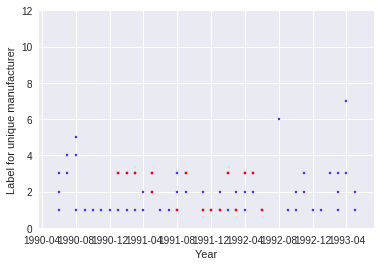

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/12203251.pdf
20591865
1 10 1491 93
406399
0 2 3406 18
2700542
0 1 1115 32
12203263
12 16 1399 120

# points: 120  # errors: 12    # unique contractors: 16


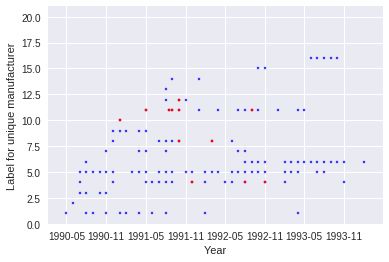

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/12203263.pdf
204331
0 8 2037 53
20591877
0 4 3041 98
2394327
0 6 790 23
5223695
0 1 61 2
2364931
0 2 1125 32
5059859
0 1 517 4
505110
3 6 3255 166
12203287
0 1 638 5
5289246
0 1 30 1
2700578
0 1 180 1
12203299
7 2 2009 46
2700591
0 1 9 1
12203317
0 2 990 26
406843
3 3 2982 24
20591932
0 1 30 1
603454
1 1 1187 37
2700608
0 1 545 15
12203329
2 3 396 11
12203330
0 1 364 12
603466
3 3 1217 32
2367031
1 1 303 10
12203342
6 7 3560 183
5289297
28 5 1003 30

# points: 30  # errors: 28    # unique contractors: 5


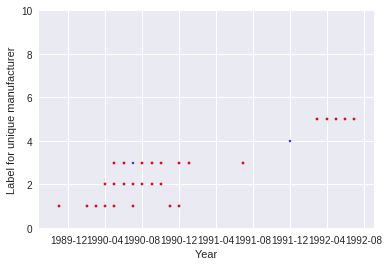

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/5289297.pdf
20591956
0 4 1825 60
603478
0 5 675 15
603481
0 5 1368 55
12203354
1 2 242 6
505183
0 1 56 1
406880
4 1 2526 60
12203366
0 1 456 15
2323345
5 9 4686 95
5322091
0 1 30 1
2367037
0 1 272 8
12203378
0 1 91 3
12203381
0 2 486 12
603511
2 4 2069 45
20591993
2 2 2371 77
12203391
1 4 852 41
800132
12 3 4502 131
20592006
6 22 3194 249
505225
1 1 30 1
20592018
0 2 211 7
2700694
0 1 91 3
603545
1 3 1733 56
800156
0 1 354 15
5043098
0 1 364 2
2367045
0 1 243 4
12203433
0 2 181 7
2323357
0 4 1399 49
505286
2 4 910 12
6600141
1 1 30 1
12203482
0 2 791 17
5289440
0 1 364 1
5191142
0 1 30 1
12203500
0 3 1490 56
20592109
7 1 2890 50
12203512
26 8 3834 244

# points: 244  # errors: 26    # unique contractors: 8


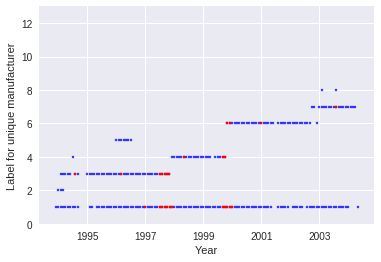

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/12203512.pdf
407033
0 1 58 2
505341
3 2 1550 37
5191166
0 1 27 1
400981
11 20 6300 218

# points: 218  # errors: 11    # unique contractors: 20


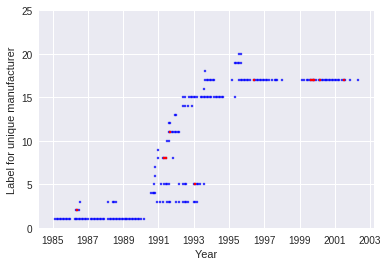

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/400981.pdf
5256704
0 1 60 2
800259
7 3 4533 116
800260
0 1 180 2
20592134
3 4 1063 59
505353
1 7 607 17
2367063
0 2 29 2
12203536
9 3 3347 146
2307601
0 1 27 1
20592146
5 14 2646 296
12203548
0 1 883 21
20592158
0 7 2921 52
505377
0 1 1094 3
12203561
0 1 244 8
407082
0 2 667 16
505390
0 1 2190 7
2397675
0 3 515 4
20592195
3 5 851 29
505419
3 8 1580 24
505420
5 1 1825 20
2367074
0 1 120 4
5289564
0 1 180 1
2700906
1 1 3559 114
800363
0 4 729 26
5289580
0 1 30 1
2361620
1 6 365 31
800387
5 2 3011 28
407173
2 2 1825 46
5010369
0 1 760 2
2700943
1 1 28 1
6207121
0 1 454 13
401006
0 1 305 1
6207127
1 1 29 1
6600347
1 1 853 4
2307741
1 2 1642 2
800417
0 1 60 2
6207145
3 2 2921 38
800429
6 9 2190 136
407215
0 1 29 1
2307765
0 3 364 10
6207158
0 1 29 1
407227
0 1 21 1
20592328
1 1 29 1
505547
1 7 1908 36
2307790
1 5 1276 30
407252
0 1 788 20
505559
0 2 242 4
505560
1 4 910 31
6207200
2 7 1460 55
505572
2 5 701 13

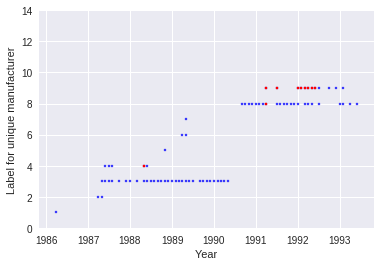

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2307844.pdf
5682952
0 1 1217 38
800521
9 1 2707 87
2701066
0 1 394 13
505614
0 2 2351 5
5289750
0 2 272 2
2701079
0 1 30 1
505638
0 2 425 26
505641
0 2 272 17
800557
3 8 1794 75
20592432
0 4 1794 41
2701108
0 1 4563 143
2307893
3 7 3437 96
2701111
0 1 172 5
2323424
4 5 729 29
800582
2 2 180 4
2307911
0 1 30 1
5191506
0 1 30 1
407379
0 4 1460 45
2307935
0 1 25 1
2307960
0 4 882 9
5257085
1 1 1063 35
2701182
2 6 1126 19
5289858
0 2 60 4
5257093
0 1 150 1
112537
5 3 1399 32
2307996
1 4 1002 58
800673
0 2 302 7
407458
0 1 29 1
2308009
1 10 849 103
5212487
0 1 58 2
800685
4 1 454 12
5060527
0 1 30 1
2308022
7 11 972 119

# points: 119  # errors: 7    # unique contractors: 11


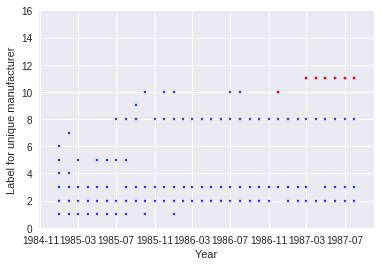

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2308022.pdf
800697
3 4 2009 58
5285909
0 1 29 1
112574
0 1 60 2
2701251
1 1 1245 38
2388984
13 21 2159 110

# points: 110  # errors: 13    # unique contractors: 21


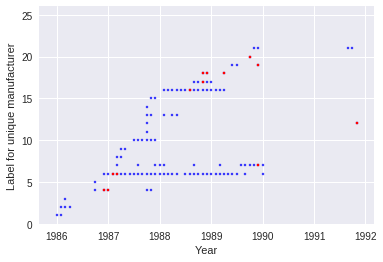

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2388984.pdf
5289939
0 1 548 16
10500055
0 1 364 1
5289947
0 1 30 1
505821
6 2 3528 105
5289955
0 1 244 8
407525
3 6 880 50
2308071
4 8 2860 187
106151
2 2 2615 80
5289971
0 1 364 3
20592638
2 14 3163 217
407562
2 4 2006 19
411991
0 2 152 7
505869
0 1 404 3
5289998
0 3 91 5
2701327
0 2 578 5
2701340
0 2 1460 9
2323461
0 5 1063 46
505894
1 4 423 10
800818
0 1 788 19
407604
0 1 28 1
800831
0 1 121 1
407616
1 1 27 1
5322819
0 1 1309 5
20592717
0 10 1246 45
2308174
0 5 1307 22
2394467
1 2 152 3
5257301
1 2 700 11
117092
1 2 1185 38
20592730
0 4 89 9
2701406
0 1 27 1
20592742
0 1 24 2
2389009
22 15 1703 122

# points: 122  # errors: 22    # unique contractors: 15


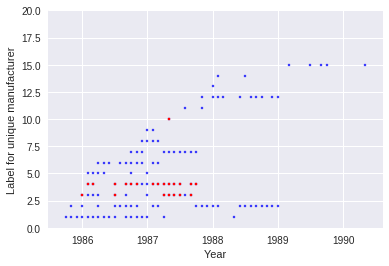

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2389009.pdf
2701417
0 1 979 24
800892
16 4 2249 78
407689
0 1 183 1
800909
0 1 180 1
506011
0 1 30 1
2308253
0 4 515 36
506023
0 1 180 6
20592808
0 1 30 1
2308265
0 1 29 1
5290155
1 1 30 1
506047
1 2 6816 30
407744
0 6 3466 101
5257409
0 1 548 2
407756
0 1 119 4
10500311
6 2 4229 103
20592870
0 1 150 1
112872
0 2 1368 62
801011
2 3 997 13
9910518
4 1 761 12
9910519
0 1 1034 9
9910522
2 1 294 5
9910523
2 1 567 14
5239850
0 1 364 4
204501
1 1 27 1
506114
6 16 3985 176
112902
7 3 4686 118
6600967
0 1 60 2
407823
1 1 30 1
9910546
0 1 30 1
9910547
0 1 30 1
9910554
0 1 30 1
506141
0 2 3559 24
9910560
0 1 29 1
407859
0 1 30 1
10500412
3 1 3255 103
5257557
0 3 911 20
5683543
0 1 729 2
801124
5 2 211 7
20592997
0 1 28 1
407914
0 1 606 19
5192043
10 1 4351 109
506229
0 3 1429 6
407941
0 1 912 16
801161
0 1 809 23
406594
0 1 27 1
5192079
0 1 274 6
407963
1 10 1340 47
2394522
4 14 4169 211
801185
2 1 2645 65
113062
1

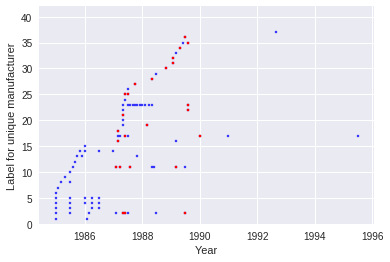

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/113207.pdf
5290562
1 1 30 1
2308678
0 1 1034 5
801355
0 3 515 24
408141
1 5 729 41
5257808
0 1 729 2
506451
1 4 1488 24
408153
1 2 1735 7
506461
3 11 3985 114
20593246
0 3 1549 19
801380
1 2 628 6
703084
2 6 729 21
801392
0 1 30 1
20593271
16 11 4686 173

# points: 173  # errors: 16    # unique contractors: 11


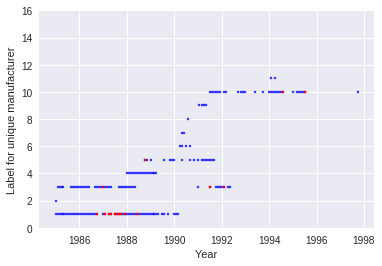

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/20593271.pdf
703096
0 5 844 35
408190
0 1 272 9
801410
14 1 942 30
2393347
0 2 273 6
408207
0 1 29 1
5290643
1 1 29 1
5192341
1 1 244 2
703126
0 3 1307 4
801434
7 1 2129 65
408220
0 1 29 1
20593313
17 1 2222 41
703138
0 1 26 1
703141
0 4 303 13
801446
12 1 4017 109
408232
1 4 729 21
113335
8 29 2555 412

# points: 412  # errors: 8    # unique contractors: 29


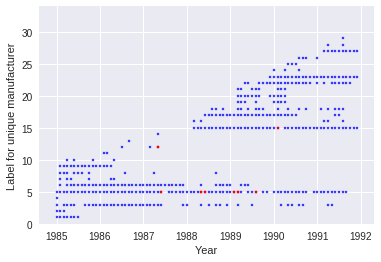

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/113335.pdf
703163
0 1 180 1
80100030
0 1 29 1
10500801
2 1 668 6
10500813
3 5 545 22
408271
0 1 91 3
506576
1 3 2798 210
703187
0 2 547 11
5290716
1 1 29 1
408293
1 3 819 38
5290732
1 1 27 1
506618
0 2 180 5
10500874
0 3 1126 15
408335
0 1 698 21
5159696
0 1 1185 2
5010564
0 1 182 2
408347
0 2 274 6
2318064
4 17 1033 107
506655
1 2 728 14
5258022
2 2 1583 18
408360
0 1 29 1
506667
0 2 454 12
408372
2 1 487 16
506679
0 5 638 43
5192511
0 1 30 1
408384
0 2 180 4
506692
3 2 1307 38
408402
0 11 1672 64
506709
0 1 27 1
5061465
0 1 29 1
408414
1 8 1794 69
2308964
0 3 244 4
2389137
2 5 6603 72
408426
0 5 272 16
5290864
0 1 273 1
2394601
1 5 364 19
408441
2 7 1794 54
408451
4 4 2921 88
408463
2 9 1185 116
506771
0 2 1215 41
703382
0 1 426 14
5258146
0 4 730 9
703400
0 1 426 14
506795
0 1 29 1
506801
7 5 2494 94

# points: 94  # errors: 7    # unique contractors: 5


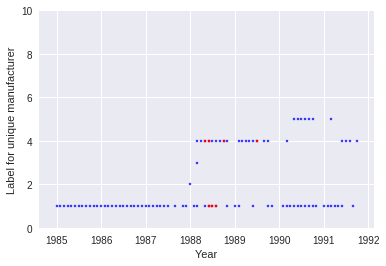

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/506801.pdf
408499
0 1 30 1
703412
0 1 122 4
408505
1 11 1370 58
506813
2 3 2067 51
113608
0 1 484 16
408529
0 5 667 19
10501076
8 18 3863 160

# points: 160  # errors: 8    # unique contractors: 18


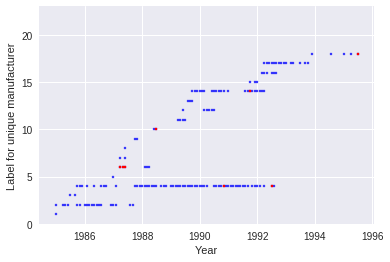

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/10501076.pdf
5192663
6 1 300 9
5256356
0 1 59 2
408542
1 12 2890 168
506862
10 12 6146 392

# points: 392  # errors: 10    # unique contractors: 12


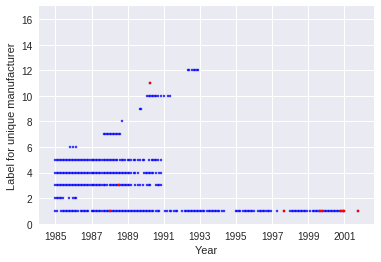

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/506862.pdf
408566
2 2 791 16
20593660
1 2 637 30
703485
0 2 273 9
20593672
0 1 182 5
703497
0 2 273 9
408591
0 2 180 3
900114
0 1 29 1
5010607
0 1 30 1
408608
1 3 333 13
20593702
0 2 149 6
408621
0 6 89 15
20593714
0 2 270 16
506931
0 9 3376 126
900151
0 1 89 1
506941
1 4 1276 11
20593726
0 1 515 6
703552
0 1 303 10
412171
0 4 1735 67
408645
0 2 150 3
5061702
1 1 272 1
113736
0 3 576 34
408657
0 10 2098 78
506965
1 1 180 2
20593751
1 6 1154 40
506977
0 9 1915 32
900199
0 1 29 1
20593775
0 1 880 27
507003
0 1 30 1
113797
0 1 2129 69
507015
0 1 29 1
10501258
2 4 2340 15
507027
1 9 3955 142
20593817
1 1 30 1
507039
0 4 1703 12
408736
10 1 7090 213
20593829
1 2 1185 18
507052
0 2 30 2
10501295
8 2 1398 35
113840
0 4 576 36
20593842
0 4 729 35
113852
15 8 1519 105

# points: 105  # errors: 15    # unique contractors: 8


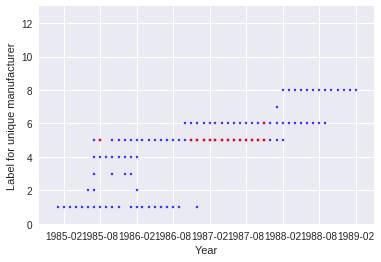

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/113852.pdf
408773
2 2 545 7
507088
1 1 2190 9
12202350
0 1 244 6
113891
2 3 607 21
5272785
0 1 576 11
507118
2 9 2524 127
507121
0 2 333 12
10501362
2 7 1460 34
13202643
2 1 454 2
20593911
0 3 1246 39
900345
0 2 545 2
507131
1 3 272 13
408839
0 4 1613 42
408840
0 2 1094 8
113931
4 6 6724 235
900369
1 1 243 4
10501404
1 1 668 22
507167
0 1 576 16
10501416
0 3 637 16
900394
1 1 1915 21
507180
0 1 1456 38
10501431
1 1 1338 43
408888
0 2 3743 8
408891
0 1 484 12
20593982
3 2 3679 140
2323680
2 9 1338 21
113992
3 1 1277 8
507209
1 1 699 22
408921
2 7 3894 164
507234
0 1 1218 37
20594019
0 3 698 20
2309476
0 6 272 19
10501477
4 12 3529 111
5291372
0 1 30 1
900461
7 3 2131 12
2361917
0 2 425 18
20594032
0 1 183 5
10501489
2 6 1672 53
507271
0 3 423 12
20594056
1 1 29 1
2389228
5 11 1156 54
408980
0 2 180 8
5272815
1 1 180 1
10501532
2 2 1794 59
20594093
1 1 3682 111
507313
0 2 180 9
2307315
0 1 30 1
5291445
0 1 

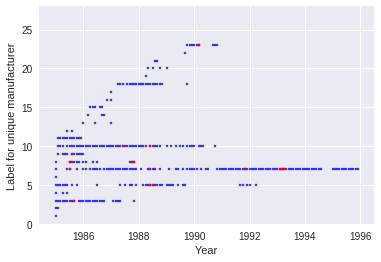

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/10501659.pdf
2309671
0 3 760 45
900655
7 1 454 11
409145
0 2 879 3
900667
25 1 2615 36
20594238
0 2 484 12
5291585
0 1 303 4
910533
3 1 1034 30
5226051
0 1 425 11
409157
2 7 1215 64
114248
1 1 29 1
5291593
0 1 29 1
20594251
1 8 3467 143
6602319
0 1 90 1
507477
1 4 454 16
5291607
0 1 30 1
409182
0 3 910 37
5291615
0 1 182 3
5291623
0 1 578 2
20594287
1 3 1641 52
900722
1 2 244 7
5258871
0 1 485 14
507520
0 6 395 25
20594305
2 11 1550 74
20594317
0 2 515 17
2309774
3 5 395 18
409236
15 14 2371 108

# points: 108  # errors: 15    # unique contractors: 14


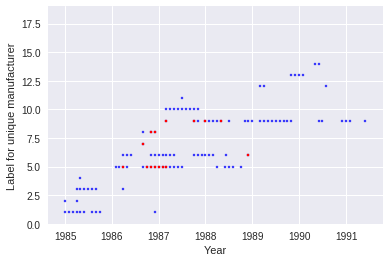

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/409236.pdf
900758
0 2 910 3
20594330
0 4 1399 39
409248
0 5 180 18
409251
1 7 4137 82
20594342
3 9 5112 84
409273
0 1 333 10
409285
6 4 3041 88
20594378
0 2 486 20
505122
1 7 607 29
2309841
1 1 152 5
409303
2 5 4198 66
5291739
0 1 303 8
2309853
2 5 3399 53
10501854
11 21 2463 300

# points: 300  # errors: 11    # unique contractors: 21


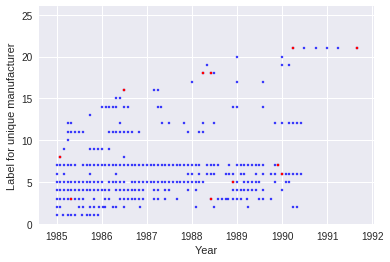

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/10501854.pdf
5291747
1 1 27 1
409327
0 4 243 14
20594421
1 3 578 9
5291771
0 1 274 1
409340
3 17 3681 193
20594433
0 3 241 12
114443
0 1 30 1
5291798
0 1 487 10
5291801
0 3 91 5
20591919
0 3 333 32
409376
1 3 1368 30
10501921
2 1 637 6
900898
0 1 303 2
2309932
5 5 2676 14
409391
3 1 1460 48
6602551
1 1 608 7
409418
0 4 576 36
409431
3 4 788 40
521531
2 3 1459 8
2366099
0 1 425 13
150162
0 7 1460 38
20594548
1 2 1915 47
111934
0 3 180 11
5193591
0 1 30 1
114558
1 20 3832 123
507775
3 5 4047 225
409480
1 4 1460 15
409492
0 7 1094 48
2001561
5 7 2831 83
6602654
8 2 3864 11
901027
0 2 761 3
409509
2 11 3132 87
409510
0 1 119 2
802728
0 1 30 1
901040
0 1 121 4
409522
0 2 880 23
150174
0 4 302 17
5259193
0 1 60 2
111946
0 3 484 27
409534
0 1 423 13
5291976
0 2 546 3
409546
0 3 1004 32
507854
0 1 172 1
5256526
0 1 118 4
409558
5 4 1765 40
409561
0 1 1370 23
5245605
7 2 1551 19
5062627
0 1 6 1
507878
0 2 164 2
52

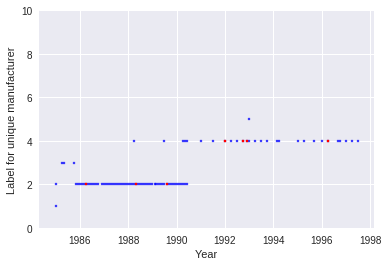

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/901131.pdf
5226511
0 1 303 10
2310168
0 1 30 1
409625
1 2 363 2
507933
0 1 729 2
5292069
0 1 60 2
5005319
0 1 453 2
901167
6 5 4625 47
2310193
0 2 180 9
507957
1 1 910 28
507969
0 5 119 12
409674
3 5 1368 32
5212855
0 1 27 1
114765
0 2 423 16
901210
1 2 545 19
409698
0 4 213 14
901222
1 2 272 8
409717
0 1 89 2
2310272
3 7 1154 87
409731
3 4 1521 52
901258
4 2 333 12
409741
1 3 729 18
901271
0 2 454 15
508056
5 4 3529 119
5062810
0 1 211 4
10502299
4 8 1340 43
5259428
0 1 1154 15
508071
1 4 3467 281
508081
2 5 2371 98
901301
0 1 180 3
508093
0 7 729 24
409790
1 7 364 23
409807
0 8 2070 109
508123
0 1 176 5
409820
2 3 1369 44
6602976
1 8 4139 19
508135
1 3 2129 58
508147
0 2 1215 24
409844
1 1 333 3
901374
0 1 364 1
508159
0 3 729 10
409856
0 2 2890 8
412375
0 2 152 3
508172
1 2 819 21
409871
0 3 1279 30
901404
0 1 29 1
510683
1 1 2190 7
508196
7 8 3406 156

# points: 156  # errors: 7    # unique contractor

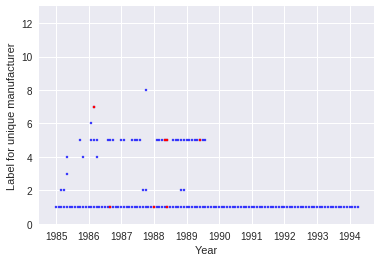

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/508196.pdf
409893
0 1 60 2
508202
0 8 819 55
409901
0 1 140 1
901428
0 2 272 2
508214
6 1 3682 103
5259576
1 1 30 1
409923
0 2 333 2
150241
3 15 882 79
901453
0 1 119 1
508238
0 4 2129 15
409935
0 2 820 10
508241
0 1 36 1
5294819
0 2 425 10
5259606
0 2 608 4
5226848
5 1 487 6
508263
2 14 2341 160
5259630
0 1 273 2
5049064
0 1 364 1
508275
0 3 3710 19
510701
11 12 2098 57

# points: 57  # errors: 11    # unique contractors: 12


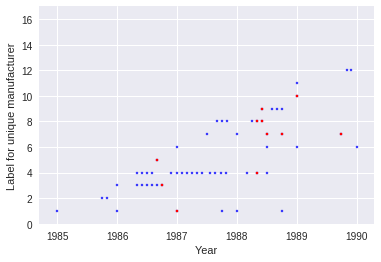

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/510701.pdf
508305
0 2 360 5
5292441
1 2 242 3
5267528
0 1 183 1
5063103
1 1 27 1
5292484
0 1 91 3
5292492
0 3 152 6
115149
0 3 241 10
413008
1 2 182 9
510713
6 11 5020 294
508378
0 3 1002 25
508381
0 1 89 3
5226996
0 1 89 1
901623
0 2 606 9
5292557
0 1 30 1
5292565
0 1 29 1
115241
4 6 3466 174
413011
0 1 273 9
113153
6 30 3437 503
508469
1 2 1307 39
2310715
0 1 29 1
508482
1 4 364 13
901702
1 1 89 1
508494
0 1 903 27
1000019
946 637 7090 27688

# points: 27688  # errors: 946    # unique contractors: 637


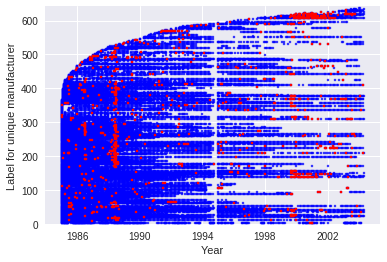

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/1000019.pdf
2310740
0 2 1460 5
508512
2 3 941 39
5161575
0 1 149 5
2366136
0 4 304 11
5194350
0 1 150 4
508536
0 2 150 5
901763
20 1 2159 31
115332
1 16 3924 141
508551
3 4 3011 100
508561
0 1 119 3
901787
1 2 2371 2
115368
0 8 1976 101
115371
0 10 1641 68
5292719
0 1 182 2
5194416
0 2 30 2
5161654
0 1 455 2
20595383
9 7 2921 151

# points: 151  # errors: 9    # unique contractors: 7


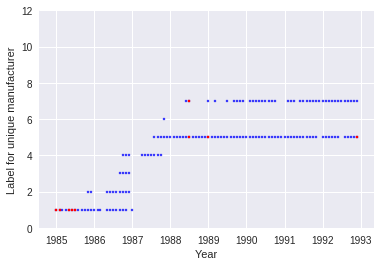

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/20595383.pdf
2310843
1 2 121 2
2310855
0 1 30 1
2366323
3 4 1063 56
12203469
3 2 333 16
10504995
0 1 183 6
20595413
1 1 261 5
5259991
0 1 181 5
115423
3 28 2494 334
2310892
11 16 4321 204

# points: 204  # errors: 11    # unique contractors: 16


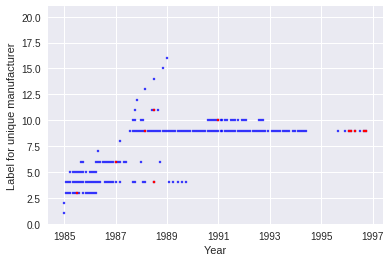

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2310892.pdf
5260019
0 1 101 4
20595449
1 2 760 22
20595450
1 6 3347 163
5260027
0 1 132 5
508676
0 1 302 7
20595462
0 1 699 2
20595474
0 3 1246 43
2310934
0 1 515 14
6603555
1 1 30 1
901933
32 1 2830 37
20595504
2 7 1613 126
508731
0 4 729 40
5260094
0 1 101 4
5292875
1 1 433 9
901970
0 2 1034 6
20595541
0 3 639 16
20595553
0 3 395 6
2307558
2 3 272 17
5292905
0 1 272 3
508779
0 2 1033 28
20595565
1 1 1946 64
115575
2 8 3255 185
5292921
0 1 30 1
902019
4 3 1794 13
20595589
1 1 2342 53
508809
0 2 698 13
508810
1 1 1550 46
115599
0 1 89 3
902032
1 3 2006 3
5292948
0 1 152 1
508822
0 2 729 3
20595607
0 2 1003 23
66405281
0 1 89 1
20595619
0 3 576 24
902056
0 1 365 4
115629
1 10 4168 179
508846
2 5 1825 62
2311094
0 1 29 1
508858
0 3 1460 4
20595644
3 6 1886 72
5292999
0 1 29 1
2311112
0 5 211 10
5293002
6 4 396 10
902093
0 1 30 1
5293006
0 1 152 5
20595668
0 1 122 4
902101
1 2 364 13
20595671
0 1 183 5
11567

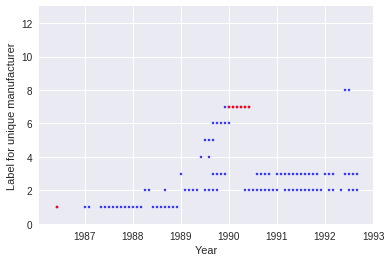

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/410731.pdf
509036
1 1 30 1
410743
2 6 912 40
115836
1 1 30 1
410755
0 3 1094 7
2323990
0 2 211 8
509073
2 6 3225 218
410779
0 1 211 3
6603932
0 1 29 1
410792
0 4 1766 46
509097
5 6 1322 72
5162166
0 2 5143 31
410809
0 2 1674 18
410810
4 23 3316 145
410822
0 6 1154 55
509127
0 3 849 42
115915
1 6 2433 106
5260493
0 2 29 2
5162191
0 1 819 6
115927
9 20 6632 330

# points: 330  # errors: 9    # unique contractors: 20


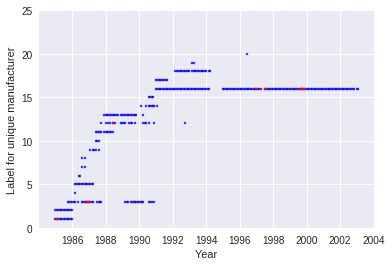

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/115927.pdf
5260507
0 1 335 11
410846
0 3 180 5
509152
0 10 484 59
115939
1 1 30 1
5260523
0 1 29 1
115952
3 5 760 31
2311409
0 1 244 8
509176
0 1 119 1
412545
0 3 944 30
5260558
0 1 361 5
410895
1 1 211 2
410901
0 4 1703 51
5260566
0 1 30 1
410913
0 9 333 35
509218
0 3 1460 6
509221
1 8 1491 31
410925
0 2 334 10
509231
1 1 30 1
410937
9 2 3591 113
410950
3 11 3713 114
116041
1 1 93 1
10503504
0 1 30 1
6604122
1 2 242 3
410974
0 4 669 24
2324027
0 4 118 7
5260647
0 1 30 1
410986
1 1 60 2
410998
2 6 3317 108
509309
0 6 1063 62
5260671
0 1 30 1
116105
2 12 1764 134
2311562
0 4 303 18
411024
3 9 1917 54
509334
2 13 3102 204
411048
0 3 244 6
66405801
0 2 60 3
411051
2 5 2801 94
116142
0 5 303 16
6604213
0 1 364 1
10503607
3 5 364 18
2311616
1 1 30 1
411073
0 2 881 29
10503619
0 4 849 43
116166
0 5 150 8
20596168
0 3 244 12
20596171
0 3 423 22
2311628
0 2 213 5
411085
7 2 2435 73
2311631
0 1 150 5
152262
0 1 11

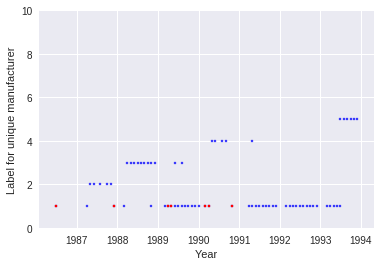

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/411152.pdf
116245
1 10 4107 204
411164
0 9 881 43
116257
3 5 5476 147
5096996
0 1 30 1
411176
2 7 3789 39
509486
2 8 4198 183
20596272
0 2 89 3
2311732
0 2 175 9
411191
0 9 942 58
5293626
1 2 364 3
5293634
2 2 637 5
5260876
0 1 122 4
904120
2 1 1734 20
411218
0 5 761 28
411221
0 5 244 17
20596314
10 10 3714 210

# points: 210  # errors: 10    # unique contractors: 10


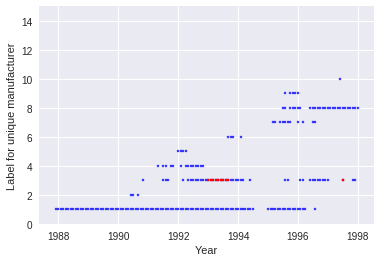

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/20596314.pdf
411231
0 4 610 25
150459
3 9 1185 60
509541
0 1 119 1
5260906
1 1 272 1
411243
0 1 791 22
20596341
0 5 607 26
411255
5 3 2160 93
116351
0 3 1491 53
411267
0 3 1005 34
20596363
2 7 2405 86
411279
3 3 549 18
509590
0 3 211 4
20596375
1 8 1123 40
20596387
7 1 487 7
2389617
0 3 1126 6
6604456
4 1 912 4
411309
0 1 240 3
20596399
4 18 3437 112
150472
0 1 272 1
20596405
0 4 1216 43
411322
0 1 850 4
20596417
1 2 637 14
20596429
0 4 394 10
20596430
0 3 423 13
2700921
3 1 1185 40
116440
0 2 333 22
20596442
0 3 1855 67
2311902
15 10 2646 69

# points: 69  # errors: 15    # unique contractors: 10


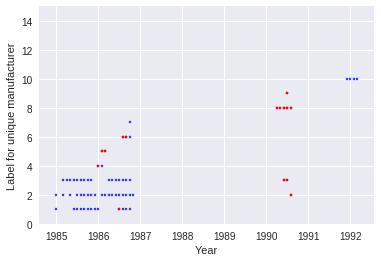

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2311902.pdf
509668
3 3 902 20
509671
0 1 30 1
411371
0 6 1004 44
116464
0 1 30 1
20596466
0 1 455 5
411383
2 8 1095 56
509693
0 7 2433 45
20596478
1 4 546 52
20596481
4 5 2191 71
5195524
1 1 30 1
2311941
4 10 1063 63
20596491
17 3 2648 169
6604560
1 1 30 1
5261082
1 1 89 1
20596508
3 3 640 29
411425
1 7 1369 41
5261090
1 2 1704 2
116518
1 1 545 17
411437
3 13 3865 147
5261104
0 2 580 2
116531
1 1 364 1
804660
0 1 121 1
20596533
0 3 577 19
5261112
0 1 29 1
411449
0 1 30 1
411450
1 10 1643 71
509759
0 5 760 30
509760
0 1 333 11
510944
3 7 3406 113
6604619
0 1 90 1
6604620
0 1 90 1
5293901
4 3 485 15
20596582
3 1 881 29
116592
2 6 1733 49
20596600
10 2 974 43
411516
1 4 2130 33
2324118
1 3 2221 106
5162889
0 1 2495 11
411541
3 4 1702 29
411553
0 2 181 5
505501
1 1 896 27
509875
0 3 1125 30
411577
10 1 4199 36
411589
0 1 152 5
509899
2 3 1550 45
509905
0 2 1094 22
411607
1 1 1429 30
411620
0 1 548 3
116713
2 

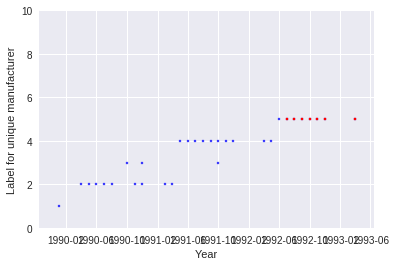

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/412314.pdf
510622
0 1 249 5
510634
0 1 454 15
5065392
0 1 29 1
412341
0 1 213 1
510646
1 2 668 11
2312891
2 2 334 2
412351
0 1 425 10
903875
0 1 273 3
510661
0 2 2737 66
150216
0 9 576 32
5251532
0 1 304 9
412363
27 5 4900 144

# points: 144  # errors: 27    # unique contractors: 5


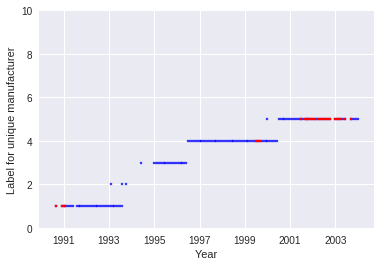

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/412363.pdf
2324258
0 2 121 4
903887
0 1 29 1
150228
0 3 790 26
150231
0 2 334 12
903899
0 1 107 2
5163742
0 1 485 2
903905
2 3 1154 7
412387
0 3 426 17
150253
14 21 1552 155

# points: 155  # errors: 14    # unique contractors: 21


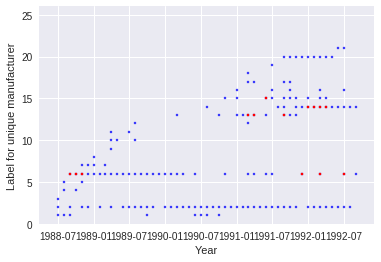

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/150253.pdf
5294835
0 1 272 1
150265
1 7 242 19
5294843
1 1 145 5
2366209
0 2 729 27
412417
0 1 60 1
150277
0 1 61 2
5180545
0 1 183 1
412429
0 1 60 2
412430
0 1 180 6
5262097
0 1 30 1
150290
2 17 760 90
903966
0 1 914 21
150307
3 5 1339 108
412454
0 5 638 23
5000327
0 1 365 1
150319
3 1 4655 110
150320
0 2 1339 38
10505011
0 4 333 23
5262135
0 1 243 1
412478
1 3 1916 34
5294916
1 2 364 3
5000005
0 2 880 2
2313030
1 1 3559 117
10505033
4 11 1035 53
5000011
0 1 29 1
2395277
0 6 768 45
5000017
1 1 181 1
5000019
2 3 2070 4
5294932
0 1 89 1
412508
0 3 1064 44
412511
0 1 272 8
150368
1 5 790 43
5000033
0 1 152 2
5262178
0 2 244 9
150371
0 10 1035 80
5000038
2 1 454 14
5000040
2 1 517 6
412521
1 5 1735 28
150381
9 6 637 24

# points: 24  # errors: 9    # unique contractors: 6


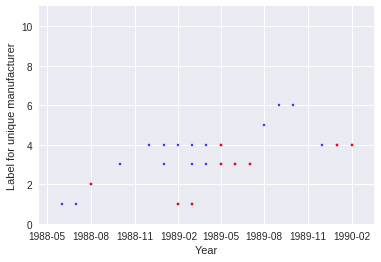

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/150381.pdf
5000046
0 1 30 1
5000050
0 2 1094 5
412533
0 4 640 31
5000055
72 97 6816 707

# points: 707  # errors: 72    # unique contractors: 97


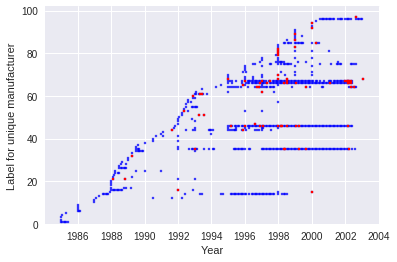

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/5000055.pdf
510841
1 9 729 52
5294975
2 2 365 5
150401
2 7 974 69
205291
0 3 545 12
2701121
0 1 522 12
150411
1 7 912 38
412557
0 7 1095 37
5000078
0 6 760 17
150423
2 10 1368 36
412569
7 13 3532 157

# points: 157  # errors: 7    # unique contractors: 13


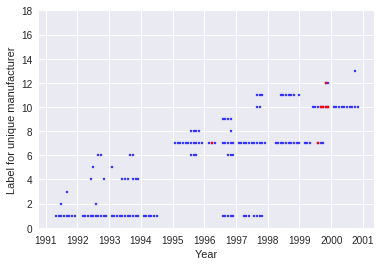

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/412569.pdf
5295009
0 1 91 3
150435
2 20 2372 193
5000104
1 1 516 3
510890
3 4 1215 36
5000110
2 1 58 2
150447
2 11 516 33
5000113
0 1 21 1
412594
0 3 1490 14
5262259
1 1 910 4
5000116
0 1 27 1
5000117
0 1 702 16
412600
0 4 273 10
510907
0 6 2190 81
5000130
0 1 274 1
510919
0 3 454 11
510920
3 16 2734 144
500215
4 4 1550 30
2313169
2 3 2037 17
510932
10 4 2097 21
5000149
1 1 729 2
5000150
0 1 402 4
5000151
0 1 29 1
5000153
0 1 394 11
412636
0 2 456 13
5000159
5 1 640 19
150496
4 13 2739 116
412648
0 3 364 10
5262313
0 1 29 1
412651
0 1 1797 45
150511
0 1 91 3
5262321
0 1 182 2
150514
1 11 761 23
412661
0 3 182 8
510968
1 2 972 19
150526
1 3 577 17
412673
2 4 1978 52
412685
0 5 1733 56
150551
1 16 1398 94
412697
0 2 1186 34
511006
0 3 545 15
150563
0 6 730 32
5000229
0 1 455 2
5000230
0 1 365 1
5000231
0 1 89 1
2366219
1 1 456 14
412715
9 1 4139 105
150575
0 5 1642 32
511031
0 1 333 1
150587
1 2 457 17
5000

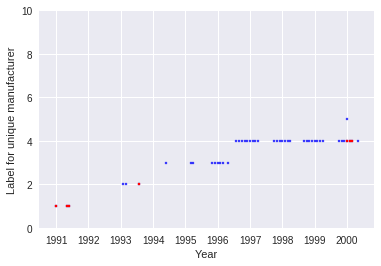

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/412818.pdf
2313364
14 26 3072 206

# points: 206  # errors: 14    # unique contractors: 26


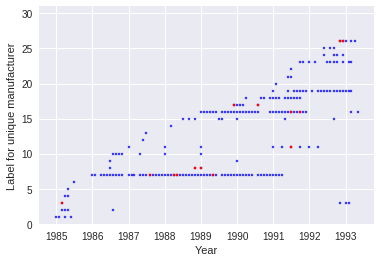

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2313364.pdf
412821
0 5 1460 7
150678
2 6 1582 60
150681
1 6 1157 36
5000346
14 1 487 15
2313376
2 6 1032 46
150691
0 6 2584 40
2324337
0 1 272 8
150708
0 1 58 2
150711
0 2 119 7
511161
1 2 1094 7
5295297
0 1 447 3
412867
0 3 1825 52
5098695
0 1 121 3
5000398
1 1 149 3
412879
0 3 364 9
412880
0 1 121 3
412892
0 1 241 6
5295327
0 1 91 3
5000416
0 2 183 2
2313443
1 2 729 5
511213
0 1 30 1
412910
0 2 486 9
5295343
0 2 303 3
150769
1 2 3863 44
150770
0 7 1095 40
412922
0 1 272 5
150782
6 5 4990 186
412934
0 1 183 5
150794
0 6 607 20
6600578
1 1 364 1
5295378
0 1 182 1
5000469
8 1 1064 26
5000470
5 1 365 11
5295394
0 2 180 2
5131561
0 1 30 1
5011336
0 1 152 2
5000502
1 1 369 2
412983
6 5 2830 98
5295416
0 3 303 8
150848
0 3 702 4
5000515
0 1 30 1
5197132
0 1 728 14
150861
4 9 1095 45
5295440
0 1 29 1
5000419
0 1 91 3
2366229
0 2 2039 58
150873
8 9 2860 101

# points: 101  # errors: 8    # unique contractors: 9


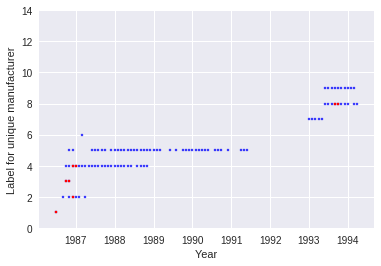

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/150873.pdf
5044111
0 2 1945 4
413021
0 3 882 34
413033
0 1 639 18
5000555
1 2 1887 3
2395368
1 9 2099 97
5000565
0 2 243 9
5000566
0 1 364 1
150903
0 3 152 7
5000570
0 1 60 2
5000576
0 1 183 1
413057
0 1 486 8
5000585
8 2 304 10
5000587
1 2 730 2
413069
1 1 29 1
5000596
0 3 792 5
413082
4 1 821 9
5000603
0 1 90 2
5000604
0 1 30 1
5000623
0 1 364 1
2302536
1 2 305 3
2313650
0 2 819 28
150964
3 5 1215 19
5000631
1 1 91 2
5164473
0 1 334 1
5000634
0 1 91 1
5000635
0 1 91 1
5000637
0 3 579 7
5000638
0 1 364 2
511432
7 9 2889 166

# points: 166  # errors: 7    # unique contractors: 9


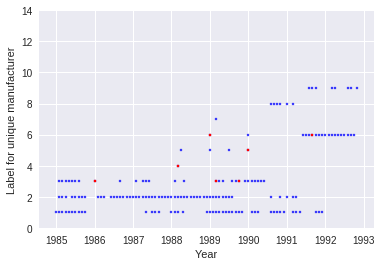

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/511432.pdf
150988
0 12 1825 73
5262798
0 1 274 1
150991
1 7 2037 89
5262801
0 1 274 1
2313686
1 4 3619 19
5000665
0 1 334 9
5000669
0 1 54 1
2313698
1 1 29 1
151014
2 7 1248 44
2313704
0 1 29 1
511471
0 1 119 4
151026
7 7 2401 39

# points: 39  # errors: 7    # unique contractors: 7


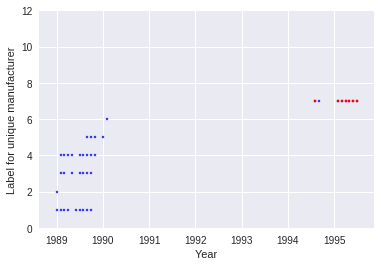

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/151026.pdf
5000695
0 1 183 1
511481
0 1 607 19
5295610
0 1 60 2
151038
1 12 1582 149
151041
1 10 753 47
151051
2 7 3316 130
5262860
0 1 62 2
151063
1 9 1855 136
5000728
0 1 730 2
5000729
0 1 487 3
5000730
1 1 90 2
5000731
2 2 90 3
5295645
1 1 60 2
2313765
3 5 729 31
5000743
0 1 90 2
5000751
0 1 48 1
5000756
0 2 729 3
5000758
0 1 30 1
5000760
0 1 28 1
2324404
0 8 484 17
2313790
0 2 183 4
5000768
1 1 27 1
151105
9 2 455 19
5213452
0 1 27 1
5164618
0 1 364 1
151117
0 2 182 6
5000788
15 1 3834 89
5000792
0 1 60 2
5000800
0 1 91 2
151142
1 17 1368 227
413288
4 3 638 23
413291
5 2 2160 48
412946
0 2 518 20
5295726
0 2 121 4
511602
17 10 3317 116

# points: 116  # errors: 17    # unique contractors: 10


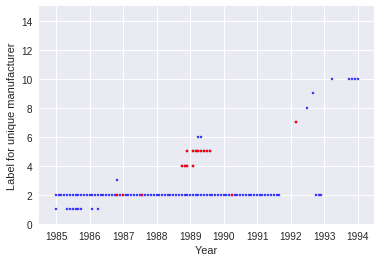

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/511602.pdf
2313844
2 10 4076 138
151166
0 3 516 18
2324416
2 8 2493 75
5169771
0 1 30 1
151178
0 1 29 1
511638
0 1 364 4
151191
1 9 1246 56
5000865
0 1 119 2
5000866
0 1 211 2
511651
2 5 1794 44
5000868
0 1 27 1
5000869
0 1 454 3
5000870
1 1 880 19
151208
0 4 668 27
5197481
0 1 152 5
151211
0 5 242 9
2313901
0 3 1245 44
511663
2 6 1794 77
5263026
0 1 60 2
5000884
0 3 640 10
151221
0 3 272 14
2313911
1 1 29 1
151233
2 6 698 31
5295815
11 3 487 14
5263050
0 1 27 1
5295823
0 3 241 6
511699
0 1 30 1
5295831
0 1 90 3
151257
5 4 578 9
5000926
1 1 105 2
5066463
1 1 180 1
5000929
0 1 211 1
151269
2 11 1279 77
5000946
0 1 29 1
5000954
0 1 150 1
5000957
0 1 1460 5
511742
0 4 1337 8
151300
3 3 272 8
511754
0 3 1217 23
800727
0 4 364 7
511766
0 6 423 20
2314010
0 4 607 23
151324
6 15 2463 355
151336
4 3 2921 99
511791
0 4 303 29
5295920
0 2 61 2
5164849
0 1 60 2
5001010
0 1 29 1
5001011
1 1 487 8
5001013
1 1 1398 10


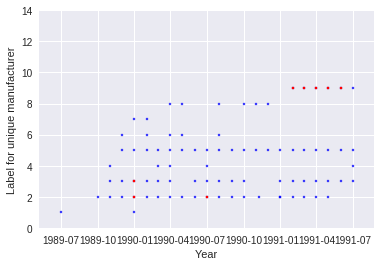

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/151361.pdf
511811
0 1 60 2
151373
0 5 456 20
5001041
0 1 364 1
5197661
7 1 212 7
2324453
0 7 819 48
5246830
0 1 90 1
151403
0 5 392 30
5001071
0 1 182 1
151415
0 5 2433 72
5001082
0 1 485 4
5001084
0 1 273 2
5001086
0 1 27 1
5295424
0 1 447 3
5001091
0 2 972 4
5001095
1 1 89 3
511882
0 2 545 26
151440
1 2 302 2
2314137
3 8 395 20
151452
1 4 1156 9
2314149
0 7 1580 49
2314150
1 3 729 39
5001128
1 1 180 1
151488
1 6 698 24
151491
0 4 364 16
511951
1 3 1137 70
5197776
0 1 183 1
5001172
1 1 272 1
5001174
0 1 119 1
511961
0 3 484 15
5001183
2 1 424 3
151521
2 11 2161 63
5001187
0 2 487 2
5263336
0 1 244 1
151531
2 3 395 6
5001203
0 1 29 1
5001204
3 1 151 4
5001205
5 3 335 5
5001206
2 1 182 6
151543
3 5 1307 54
5001211
1 1 90 3
5001212
1 1 30 1
511997
1 1 910 29
5001214
1 1 30 1
512001
2 11 2341 62
151555
2 12 883 44
5001221
1 1 30 1
5001222
1 2 274 3
5001227
1 1 61 2
5296145
1 2 485 2
5066773
0 1 364 2
5001238

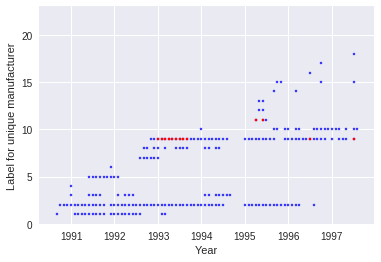

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/151579.pdf
151580
1 4 423 8
5197855
0 1 40 2
2362715
0 1 152 1
5001252
0 1 30 1
5001253
0 1 30 1
151592
4 5 850 17
512047
0 5 1429 69
2314290
9 7 1976 105

# points: 105  # errors: 9    # unique contractors: 7


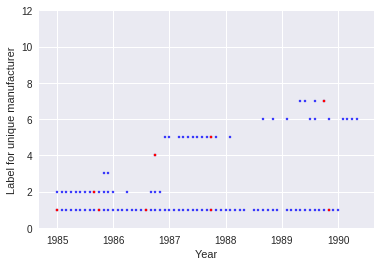

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2314290.pdf
5296188
0 1 69 1
5689405
0 1 30 1
5001291
2 1 131 2
5001292
0 1 30 1
151634
2 8 1733 79
5001302
0 1 30 1
512096
2 1 718 32
9101801
0 1 7 1
5082471
0 1 29 1
5001324
0 1 396 7
151661
1 4 973 14
512114
2 8 4107 95
2314356
2 5 910 21
151671
0 5 546 37
522260
0 1 60 2
5001344
1 1 213 1
5001346
1 1 314 3
151683
0 2 515 13
6606981
0 1 182 1
5001353
1 3 1248 8
5001354
0 2 100 2
5001355
0 1 313 2
5001356
0 1 69 1
512141
1 3 1094 13
151695
2 9 1309 49
5001364
0 1 30 1
2395502
0 2 213 9
5001366
0 1 90 3
512151
6 2 3863 119
5066906
1 1 303 4
5001372
0 1 546 3
1200288
0 1 1271 15
151713
0 4 638 14
512163
4 3 849 24
150897
0 5 1399 24
151725
12 2 3712 118
151737
0 2 548 9
512187
0 3 607 19
5001406
0 1 369 2
413045
1 1 486 10
2390048
3 5 1246 33
151750
0 2 152 7
5000567
1 1 273 3
5001431
0 1 274 1
151774
0 2 1582 53
512229
0 1 30 1
512230
1 9 729 30
2314472
0 2 1246 45
151786
4 5 640 7
5296366
0 1 60 2
50014

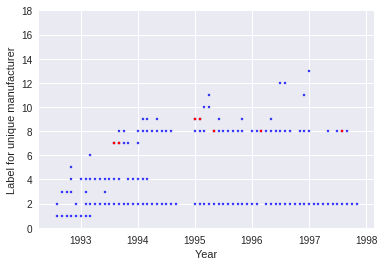

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/152067.pdf
152080
0 4 545 27
5001746
1 1 89 3
5001747
1 1 30 1
5001749
0 2 190 2
407641
0 2 89 4
5001752
0 1 517 7
1200665
6 1 3011 36
5001758
0 1 91 1
5001759
0 1 152 2
5001760
0 1 274 1
5263905
0 1 456 3
5001762
0 1 89 3
5001770
1 1 30 1
5001771
0 2 61 3
5001773
0 1 182 6
5000628
1 3 90 5
152122
7 7 1094 43

# points: 43  # errors: 7    # unique contractors: 7


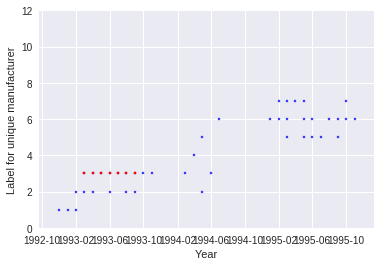

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/152122.pdf
5001791
0 1 30 1
512576
0 2 698 14
152134
1 6 698 40
1200720
0 1 1361 16
5001818
0 1 1735 7
5001821
0 1 90 1
152158
1 4 760 17
5001823
0 1 90 1
2314848
8 17 4563 249

# points: 249  # errors: 8    # unique contractors: 17


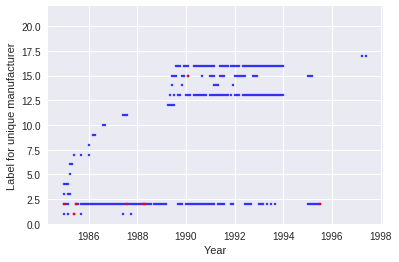

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2314848.pdf
5001834
1 1 243 6
5001835
0 1 29 1
5001836
5 3 244 17
1200756
0 1 2677 25
152183
1 5 578 38
5067391
2 2 121 3
152195
0 3 545 17
5001863
0 1 365 1
152201
0 3 392 9
5296781
0 1 150 3
5001871
0 1 29 1
2314897
0 4 607 21
152213
1 3 333 12
5001879
0 1 30 1
5001884
0 1 183 1
152225
0 7 1064 51
5175409
1 1 30 1
512680
0 1 29 1
5296811
1 1 30 1
152237
1 1 30 1
152250
0 1 60 2
5264065
0 1 1155 28
5001922
1 1 668 12
512710
0 2 1125 12
5296846
2 2 303 2
5296854
4 1 608 19
151282
1 4 1521 35
2362831
0 1 91 2
5296862
9 1 364 10
152298
0 1 183 6
2314988
1 1 333 4
152304
2 2 363 17
5001971
3 3 487 39
5001979
0 1 27 1
152316
0 2 545 18
5001986
0 2 423 3
5000662
0 3 305 6
2315014
0 4 211 11
5001992
0 1 30 1
5001993
0 1 185 1
152331
10 5 3163 88

# points: 88  # errors: 10    # unique contractors: 5


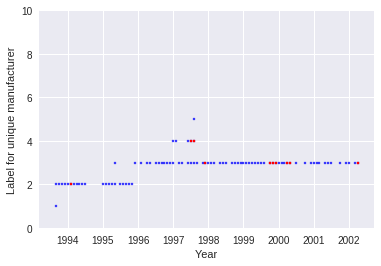

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/152331.pdf
500525
1 14 2463 227
5133075
0 1 91 3
5002012
0 3 2921 15
512801
0 2 152 3
5002019
1 1 1247 30
5002020
0 1 85 1
5002021
0 2 274 2
5002024
0 1 60 2
512813
3 7 996 69
2315063
0 2 1460 40
512825
1 17 3102 188
5002048
3 4 2861 125
5213665
0 2 683 5
5002057
2 1 61 2
5002058
0 1 61 2
5002060
1 2 183 6
5002061
0 1 1186 6
5002062
0 1 181 1
2366280
0 2 790 6
5296978
0 2 30 2
152407
2 1 2006 47
2315099
0 1 119 4
512862
0 2 242 5
152419
0 2 30 2
152420
0 1 152 3
152444
3 4 1340 38
5002116
2 2 211 4
5002117
0 1 58 1
5002124
0 1 182 1
5002125
0 1 182 1
5002126
0 1 182 1
5002127
2 1 942 6
152468
9 3 1855 55
5002136
0 1 90 1
5002137
0 1 89 1
5002138
0 1 28 1
5264286
1 2 29 2
152481
2 1 486 2
5264294
1 2 121 3
5295602
1 1 546 14
5002162
0 1 30 1
5002164
0 1 91 3
152501
4 1 1218 29
5002166
0 1 30 1
512953
0 7 3194 95
152511
13 5 2435 135

# points: 135  # errors: 13    # unique contractors: 5


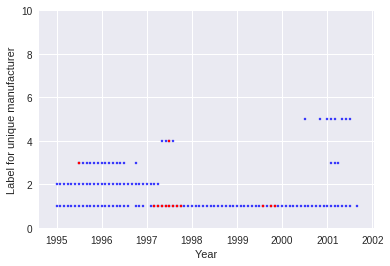

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/152511.pdf
512965
0 3 364 5
2315208
0 3 2071 26
152523
0 2 89 5
5264332
0 1 274 1
5002193
0 1 182 1
152535
0 1 333 8
512989
2 8 1825 33
152547
1 1 89 2
5264359
1 1 365 1
2315245
4 14 3164 162
5264367
0 3 1629 50
407720
0 3 89 5
513015
0 2 116 5
152572
0 1 394 10
513027
0 1 1611 19
2315269
0 5 515 34
152584
9 7 1154 48

# points: 48  # errors: 9    # unique contractors: 7


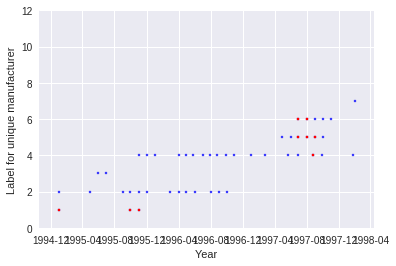

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/152584.pdf
5002261
3 1 180 3
152602
4 7 911 51
2315294
4 5 2615 93
5264421
0 1 30 1
152614
3 9 1003 72
5002279
0 1 29 1
5002280
0 1 60 2
2315312
2 8 1215 75
152626
0 4 455 14
152638
7 1 2647 83
5273781
0 1 61 2
513088
2 4 1976 113
513091
1 2 1185 9
152651
0 3 243 10
2315348
0 4 454 40
152663
8 4 2191 75
152675
5 2 2374 54
152687
1 3 1005 18
5264499
0 1 30 1
513143
1 1 60 2
5002361
0 1 790 3
152699
0 1 1125 29
5264510
0 1 9 1
152705
1 3 1673 48
5001370
0 3 517 5
5264537
0 1 9 1
152730
9 10 1157 133

# points: 133  # errors: 9    # unique contractors: 10


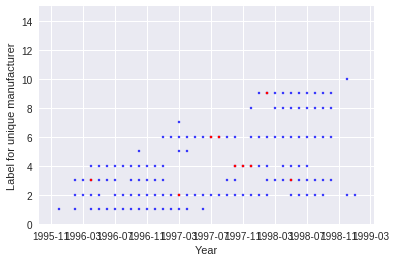

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/152730.pdf
5264545
0 2 770 4
5264561
0 1 334 3
152754
2 8 1370 49
2395678
0 4 973 12
2315452
3 1 213 7
2390218
8 6 1095 60

# points: 60  # errors: 8    # unique contractors: 6


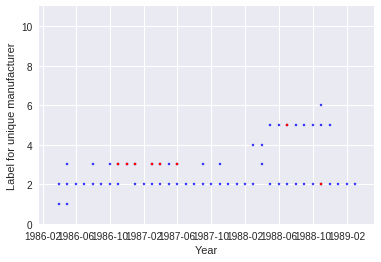

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2390218.pdf
152766
0 2 850 17
5002434
1 1 182 2
120005
6 21 2282 257
5264588
3 2 2221 12
152781
0 1 60 2
5002451
0 1 122 4
5264596
0 1 334 3
152791
3 2 760 19
5002457
0 1 3 1
5002460
0 1 181 1
120030
0 2 1945 5
152808
3 11 1550 75
5264618
0 1 2007 8
152811
2 4 486 18
513261
0 4 1063 10
152821
1 1 1064 29
120054
0 7 699 30
5297400
0 2 181 2
5002493
0 1 30 1
120066
0 1 334 2
513283
2 21 3102 145
5297419
16 1 4351 82
120078
1 9 852 51
120081
1 6 3136 131
152857
3 2 1154 37
120091
0 2 334 3
513313
2 6 729 38
152869
2 2 1124 27
120108
2 17 1947 192
2315567
1 5 2280 97
5002546
0 1 29 1
5002553
0 2 182 2
5002554
0 1 182 1
5002556
0 4 365 7
5002560
0 3 212 3
5002562
0 1 182 1
152900
8 6 818 29

# points: 29  # errors: 8    # unique contractors: 6


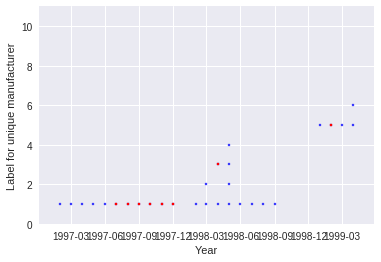

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/152900.pdf
5002565
0 1 182 1
2315592
0 5 1154 54
152912
4 2 517 28
120145
0 2 303 9
5264723
4 1 121 4
5264731
0 1 152 2
152924
9 6 1673 99

# points: 99  # errors: 9    # unique contractors: 6


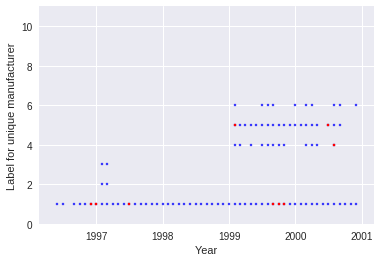

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/152924.pdf
120157
0 6 333 17
513386
2 5 2617 58
5002606
0 1 182 3
5002607
0 1 150 1
5002609
0 1 27 1
513404
0 7 668 60
5199232
0 1 482 11
152961
4 2 578 17
120194
3 29 1157 144
5264774
0 1 244 7
120200
0 1 486 15
2362946
2 2 272 8
5264782
0 1 152 3
5002647
0 1 606 20
5002648
0 1 180 5
152985
1 3 667 26
5002652
0 1 29 1
5002653
2 2 30 2
5264804
0 1 241 2
152997
1 2 790 10
153001
0 3 578 7
2315695
2 1 606 20
5002679
0 1 60 2
5002684
1 1 29 1
5000778
0 1 29 1
2315713
0 2 30 2
153035
0 1 850 28
5297613
0 4 364 5
5002702
0 1 27 1
5002715
0 1 212 5
522491
0 1 335 2
153060
1 3 60 5
2315749
1 2 1063 38
513519
0 2 150 10
153072
0 2 606 13
5297656
0 1 364 1
513532
5 4 3376 111
153096
3 3 759 28
153102
0 3 517 18
513556
0 1 941 31
2315798
0 2 2497 2
513571
0 7 880 28
9910534
0 1 29 1
153126
0 4 1186 53
2315816
0 1 30 1
153138
0 5 211 12
5002803
0 1 30 1
153141
5 6 2047 48
2315831
0 1 30 1
5264952
0 1 183 1
5002809
0

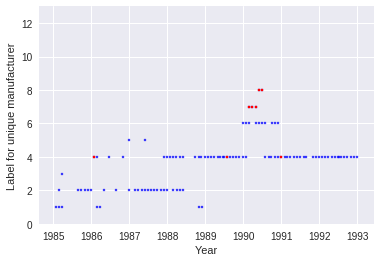

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/514032.pdf
5265401
0 1 61 2
2316286
0 3 180 7
5000875
0 1 30 1
9100775
2 1 90 2
5101581
0 1 30 1
5265428
0 1 213 1
5298199
7 5 487 12
1300519
0 1 718 14
1300520
9 3 3518 100
2316331
2 10 972 70
5003308
2 2 30 2
514093
3 8 3376 131
5003314
1 3 91 5
5003319
0 1 365 1
521221
0 3 2494 57
5003325
0 1 119 2
5003330
0 1 181 2
5003345
0 1 305 2
5000311
0 1 274 1
514147
2 10 1276 48
1300581
8 2 2426 72
2316390
19 26 3133 194

# points: 194  # errors: 19    # unique contractors: 26


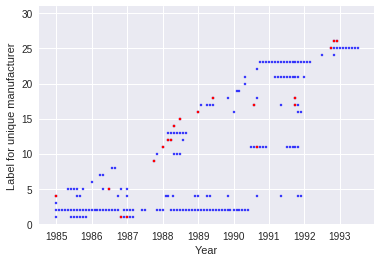

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2316390.pdf
514159
0 2 545 19
514160
0 5 515 37
2363070
1 1 58 2
5265533
0 1 60 1
2316420
0 3 303 17
514184
1 7 2884 57
5003410
0 1 152 5
5298326
1 2 1095 2
2323771
2 4 515 23
5298334
0 1 364 11
1300647
3 3 5112 159
2316456
1 2 211 3
5265584
0 1 29 1
2316471
9 7 4837 198

# points: 198  # errors: 9    # unique contractors: 7


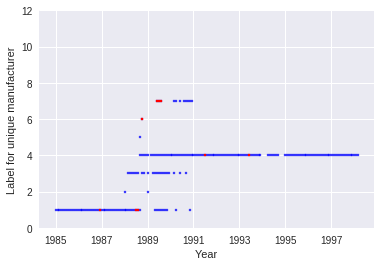

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2316471.pdf
5265592
0 1 60 2
514238
0 1 91 1
2316481
1 1 29 1
5003461
0 1 120 3
2365924
4 6 1613 134
514251
0 1 1276 6
260472
2 2 3073 68
5003474
0 1 60 2
5003479
0 1 634 20
5069038
0 1 1976 37
1300726
5 1 3518 92
5003520
0 2 457 2
5003521
6 1 182 6
5003531
0 1 91 3
5003540
0 1 30 1
5003541
0 1 60 2
514342
0 7 150 17
5003561
0 1 273 2
5298474
0 1 58 2
5265711
0 1 60 2
5003569
1 3 180 10
514354
1 3 1154 10
1300787
0 1 1487 32
2316596
0 3 576 29
5003573
1 1 849 19
5003574
0 1 334 7
5003577
3 3 546 28
5003579
0 3 668 14
1300799
3 1 1884 61
5003587
0 1 30 1
5265738
0 1 40 2
5003596
0 1 30 1
5003599
0 1 61 2
5298512
0 1 119 4
5003601
0 1 30 1
5003602
0 1 29 1
5003603
0 1 61 1
5003608
0 1 60 2
5003609
1 2 29 2
1300829
7 3 3518 87
511717
8 21 1550 155

# points: 155  # errors: 8    # unique contractors: 21


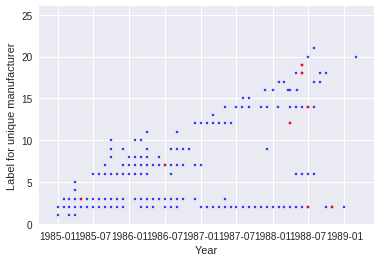

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/511717.pdf
5003624
2 2 334 2
5219388
0 1 91 2
5298547
0 1 149 5
1300854
0 1 60 2
5003646
0 1 30 1
5003647
1 1 30 1
5298571
0 1 758 9
2316687
0 1 243 2
5003685
0 1 365 1
5298598
1 1 58 1
5003687
0 1 365 1
5003688
0 1 365 1
5298601
0 1 27 1
5003691
0 2 121 2
1300908
0 1 880 7
5295858
1 1 90 2
5003695
0 1 30 1
5003696
0 1 27 1
5003702
0 1 60 2
5003703
7 1 803 12
5003704
0 1 30 1
2363124
1 2 302 11
5003706
0 1 60 2
5003707
0 1 30 1
2316742
1 4 1519 60
5298636
0 1 58 2
5200334
0 1 30 1
5265878
0 3 304 8
5003741
0 1 30 1
2316766
6 5 2402 129
5003746
0 1 272 1
5233127
0 1 364 1
5003752
0 1 58 2
5003753
3 1 88 3
1300970
1 1 547 8
5265908
0 1 517 2
151294
0 5 425 20
514551
0 1 180 6
5003778
0 1 60 2
5003779
0 3 272 6
2316811
0 2 729 28
5003793
0 1 60 2
5003802
0 2 89 3
5298717
0 1 333 1
514603
0 2 119 8
5167668
2 1 1257 28
5298741
0 1 333 1
514627
0 5 942 6
514639
0 1 30 1
514652
0 9 2077 57
2002711
16 43 1856 402

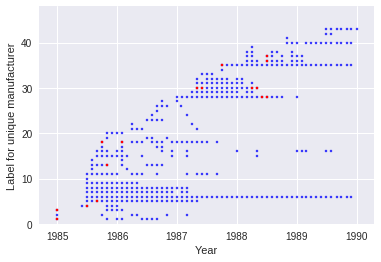

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2002711.pdf
5200547
0 1 152 1
5135023
0 1 60 1
2316997
0 3 333 18
5003979
0 1 30 1
2317011
2 7 819 30
2317035
18 13 849 64

# points: 64  # errors: 18    # unique contractors: 13


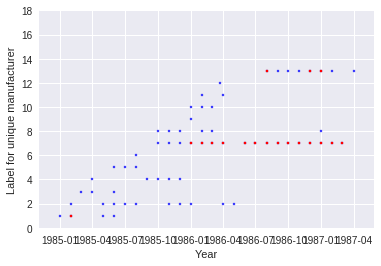

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/2317035.pdf
5266165
0 1 593 10
5266173
0 2 211 8
5069580
0 1 89 1
5200660
0 1 364 1
514871
0 1 152 2
5299004
0 1 333 1
5299012
0 1 333 1
5004105
0 1 29 1
514895
8 9 5051 357

# points: 357  # errors: 8    # unique contractors: 9


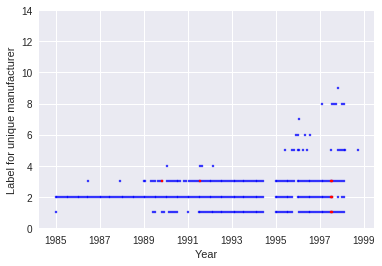

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/514895.pdf
514901
0 1 1460 6
5299063
0 1 61 2
514937
0 4 788 24
5004159
0 1 30 1
5004160
0 1 30 1
2317187
0 1 272 3
514949
0 4 1976 29
9100180
0 3 1094 39
5004183
0 1 60 2
514974
1 5 3833 89
5004202
0 1 211 2
5004203
0 1 303 7
5004204
0 1 180 2
2317229
0 1 30 1
5004206
0 1 305 1
9100210
0 2 545 14
5012342
0 1 180 1
2350014
0 2 303 2
2366802
3 5 577 29
2317254
0 4 302 10
5004233
0 1 30 1
2317266
0 1 89 1
2350038
0 1 29 1
515036
1 1 21 1
2317278
0 1 29 1
2317281
0 1 27 1
5214033
0 2 544 5
5168107
0 1 791 15
2350063
0 1 60 2
515061
0 4 272 11
2350075
0 1 272 6
2350087


KeyboardInterrupt: 

In [150]:
type_company="c"

path_fig='/home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/'
lista=lista_m


if type_company=="c":
    path_fig='/home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/'
    lista=lista_c
    

    
for company in lista:
    
    if company not in dict_cID_time_series:

        print company
    #ID="101059"      #"2300783"   #"501803"       #"101059"  #"102982"    #"2323709"    #2391375"    #6203152"   #116191"   #113694"  
    #"102982"  #6203152"#504506"  #"101059"  OJO IS ES CONTRACTOR ES "_"+ID Y MANUFACT ES DI+"_"

    
        ID=str(company)
        looking_for=ID+"_" 

        if type_company=="c":
            ID=str(company)
            looking_for="_"+ID 




        cont=0
        cont_unique_partners=1
        dict_partner_id_cont_partner={}
        list_rows=[]
        list_for_dropping=[]
        partners=[]
        list_days=[]
        list_days_errors=[]

        list_Pinf=[]

        y_values=[]
        y_values_errors=[]


        list_dates=[]

        df_aux=df[df['Cj'] == company]
        
        for index, row in df_aux.iterrows():

            if looking_for in row['Mi_Cj']:
                list_rows.append(row)             


                partner=row['Cj']
                if type_company=="c": 
                    partner=row['Mi']

                partners.append(partner)  


                if partner not in dict_partner_id_cont_partner:            
                    dict_partner_id_cont_partner[partner]=cont_unique_partners                    
                    cont_unique_partners +=1

                initial_date_transaction=row['start_date_trans']
                final_date_transaction=row['end_date_trans']

                list_dates.append(initial_date_transaction)
                list_dates.append(final_date_transaction)


                #year=int(row['start_date_trans'].split("-")[0])    # example of date:  1985-01-01     
                #month=int(row['start_date_trans'].split("-")[1])       
                #day=int(row['start_date_trans'].split("-")[2])                
                #initial_date_transaction=datetime.datetime(year, month, day)

                list_days.append(initial_date_transaction)
                list_Pinf.append(row['P_inf'])
                y_values.append(dict_partner_id_cont_partner[partner])

                if row['P_inf']==1:
                    list_days_errors.append(initial_date_transaction)
                    y_values_errors.append(dict_partner_id_cont_partner[partner])



                        #pass#list_for_dropping.append(index)
            else:
                list_for_dropping.append(index)


            cont +=1    


        #df.drop(df.index[list_for_dropping])  


        delta_time=(sorted(list_dates)[-1] - sorted(list_dates)[0]).days
        print len(y_values_errors), len(set(partners)), delta_time, len(list_rows)


        if len(y_values_errors) >6 and len(set(partners)) >4  and delta_time > 300  and len(list_rows)>20:

            print "\n# points:",len(list_rows)," # errors:",len(list_days_errors), "   # unique contractors:",len(set(partners))


            x1 = np.array(list_days)
            y1 = np.array(y_values)

            x2 = np.array(list_days_errors)
            y2 = np.array(y_values_errors)
            #plt.plot(x,y)   this is for plotting a line

            dict_cID_time_series[company]=(x1, y1, x2, y2)




            plt.ylim(0, len(set(partners))+5)

            plt.scatter(x1, y1,color='blue',s=8,alpha=0.7, marker='s')  # s is for size of the dots (i can also pass a list of different sizes, one per point)
            plt.scatter(x2, y2,color='red', s=6.5, marker='s')
            #plt.title(ID)c2393359

            plt.ylabel('Label for unique contractor')        
            if type_company=="c": 
                plt.ylabel('Label for unique manufacturer')

            plt.xlabel('Year')


            fig = plt.gcf()
            fig.savefig(path_fig+ID+'.png', dpi=600)
            plt.show()
            print "plotted:", path_fig+ID+'.pdf'

print "done"


In [151]:


pickle_company="/home/juliaponcela/at_NICO/Supply_networks/Results/dict_cID_time_series.pickle"
pickle.dump(dict_cID_time_series, open(pickle_company, 'wb'))
print "written:",pickle_company


len(dict_cID_time_series)

written: /home/juliaponcela/at_NICO/Supply_networks/Results/dict_cID_time_series.pickle


162

0 1 27 1
1 2 2156 76
4 9 1915 197
2 2 1440 70
0 1 58 2
7 1 1130 9
0 1 29 1
7 8 1399 75

# points: 75  # errors: 7    # unique contractors: 8


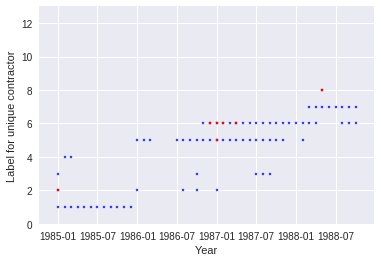

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/100365.pdf
10 26 2555 303

# points: 303  # errors: 10    # unique contractors: 26


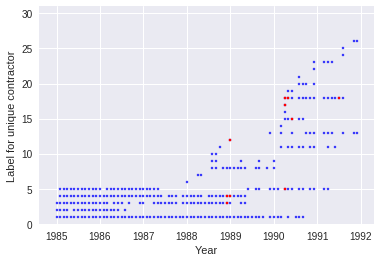

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/108558.pdf
1 3 333 15
8 22 2129 152

# points: 152  # errors: 8    # unique contractors: 22


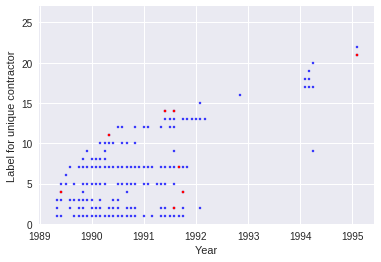

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/114704.pdf
0 1 29 1
0 4 570 83
0 1 119 1
2 4 2494 223
0 3 851 32
41 43 7059 824

# points: 824  # errors: 41    # unique contractors: 43


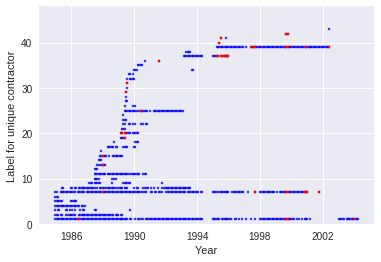

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/100389.pdf
0 7 637 83
0 1 180 1
0 1 27 1
98 178 3863 2058

# points: 2058  # errors: 98    # unique contractors: 178


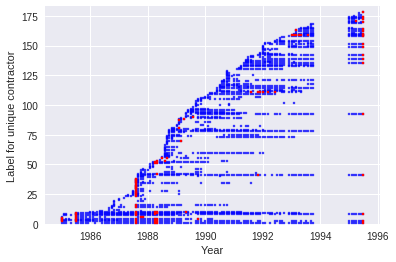

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/10500138.pdf
51 184 3559 851

# points: 851  # errors: 51    # unique contractors: 184


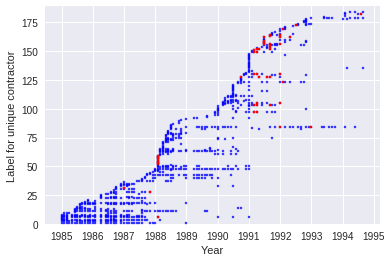

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/501803.pdf
0 1 182 1
2 2 1094 34
0 1 58 2
0 2 30 2
128 174 4260 1951

# points: 1951  # errors: 128    # unique contractors: 174


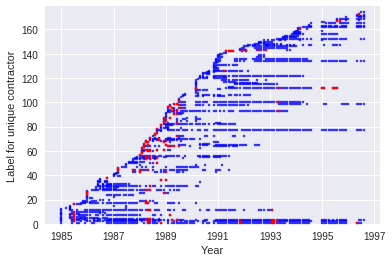

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/10502196.pdf
0 1 30 1
0 2 130 11
0 3 180 16
14 56 2586 596

# points: 596  # errors: 14    # unique contractors: 56


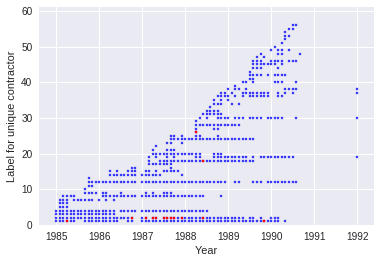

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/108601.pdf
2 2 395 8
2 2 760 29
0 6 547 44
2 5 729 44
0 17 2463 130
9 4 2761 100
1 11 1460 88
1 6 119 7
10 52 1399 256

# points: 256  # errors: 10    # unique contractors: 52


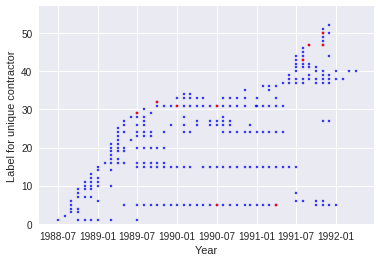

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/260174.pdf
9 45 972 354

# points: 354  # errors: 9    # unique contractors: 45


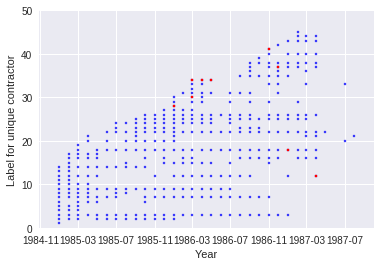

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/110671.pdf
15 11 4686 337

# points: 337  # errors: 15    # unique contractors: 11


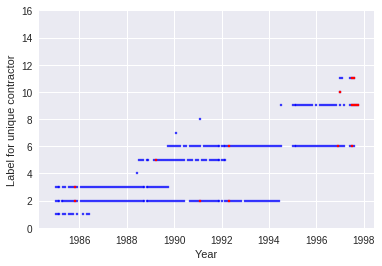

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/112720.pdf
1 2 2280 63
180 378 7090 4361

# points: 4361  # errors: 180    # unique contractors: 378


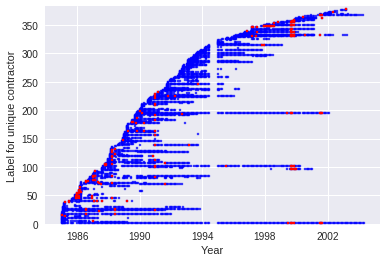

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/103779.pdf
0 20 1125 139
31 73 2646 441

# points: 441  # errors: 31    # unique contractors: 73


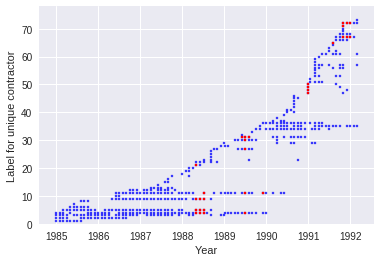

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2316377.pdf
3 27 2098 213
0 1 444 10
0 1 294 9
1 5 1002 61
0 1 364 4
0 36 849 298
1 8 454 41
1 23 3455 440
15 29 2707 260

# points: 260  # errors: 15    # unique contractors: 29


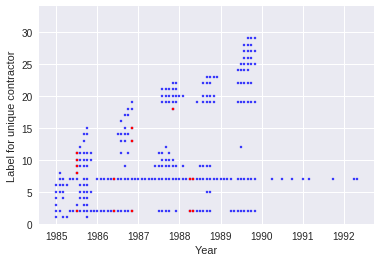

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/6203504.pdf
5 3 2220 48
7 6 4836 274

# points: 274  # errors: 7    # unique contractors: 6


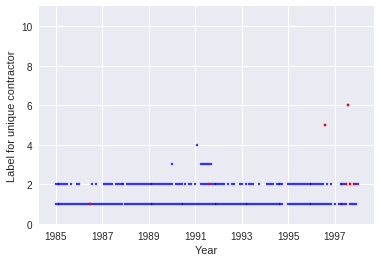

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/104565.pdf
4 8 2068 112
0 6 788 31
0 1 8 2
0 1 272 1
23 36 2524 573

# points: 573  # errors: 23    # unique contractors: 36


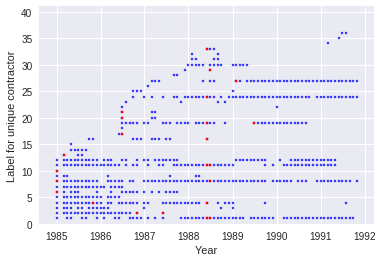

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2302081.pdf
104 132 7059 1528

# points: 1528  # errors: 104    # unique contractors: 132


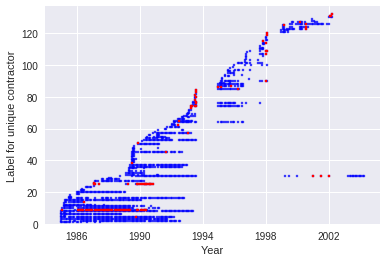

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/114819.pdf
1 8 515 29
2 3 545 33
24 76 1338 477

# points: 477  # errors: 24    # unique contractors: 76


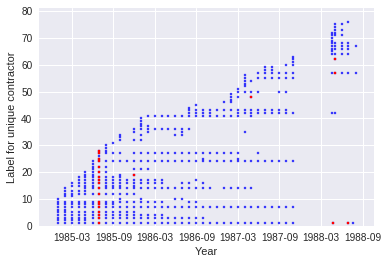

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/10500230.pdf
0 3 1094 3
5 38 1307 372
197 110 6719 1597

# points: 1597  # errors: 197    # unique contractors: 110


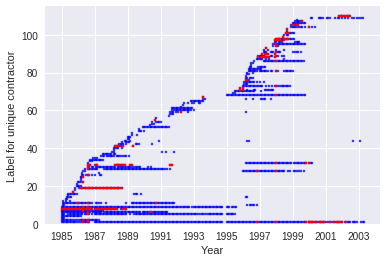

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/202897.pdf
0 1 29 1
2 2 334 2
0 9 2952 174
5 16 760 71
1 16 698 155
2 15 454 77
2 3 242 23
0 7 1064 12
1 2 729 27
9 5 7090 417

# points: 417  # errors: 9    # unique contractors: 5


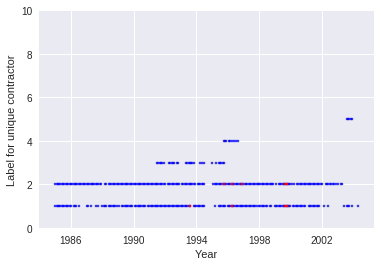

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/202915.pdf
0 3 303 13
10 23 1733 356

# points: 356  # errors: 10    # unique contractors: 23


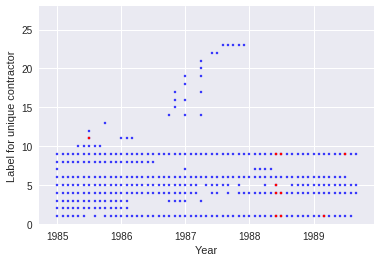

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2312359.pdf
6 26 972 286
89 168 7000 2269

# points: 2269  # errors: 89    # unique contractors: 168


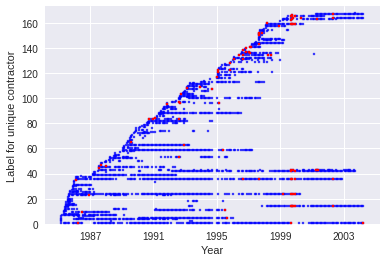

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/207901.pdf
0 7 58 10
7 2 6724 17
5 23 5050 153
0 2 38 2
10 18 1550 178

# points: 178  # errors: 10    # unique contractors: 18


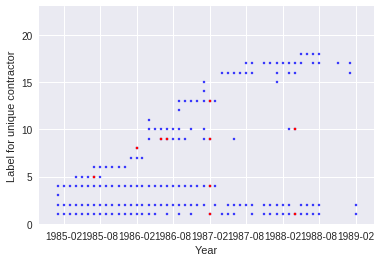

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2306232.pdf
0 4 263 22
0 1 249 5
33 50 1460 626

# points: 626  # errors: 33    # unique contractors: 50


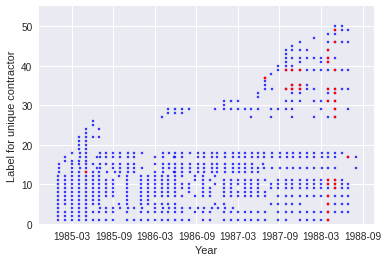

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/9101500.pdf
10 109 2890 974

# points: 974  # errors: 10    # unique contractors: 109


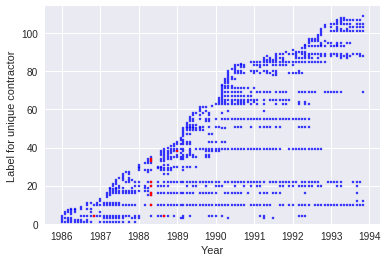

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2390206.pdf
0 4 515 21
26 83 2799 533

# points: 533  # errors: 26    # unique contractors: 83


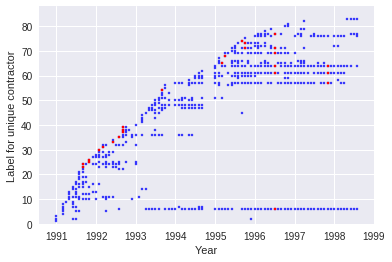

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/260290.pdf
0 1 274 1
7 11 4747 264

# points: 264  # errors: 7    # unique contractors: 11


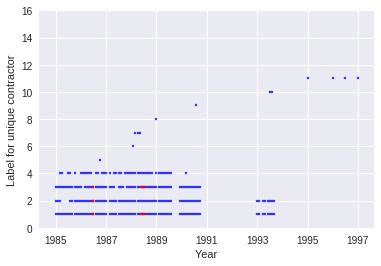

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/6203589.pdf
0 2 89 5
1 1 1915 34
0 2 819 29
2 2 3469 20
1 1 2371 53
0 1 26 1
1 12 1733 82
9 28 2402 314

# points: 314  # errors: 9    # unique contractors: 28


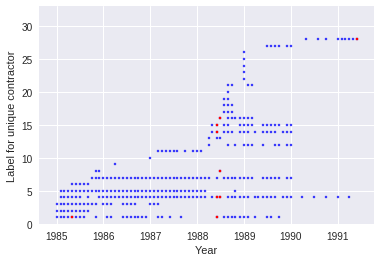

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2306268.pdf
0 1 119 1
13 12 1215 44

# points: 44  # errors: 13    # unique contractors: 12


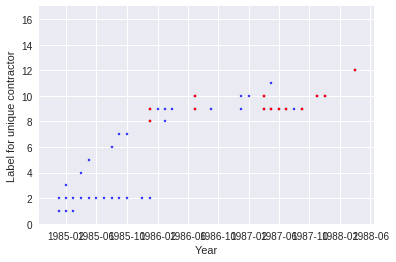

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/104671.pdf
19 29 749 202

# points: 202  # errors: 19    # unique contractors: 29


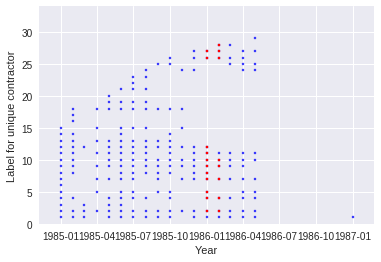

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/10500321.pdf
1 24 2190 286
6 14 972 55
65 145 4321 697

# points: 697  # errors: 65    # unique contractors: 145


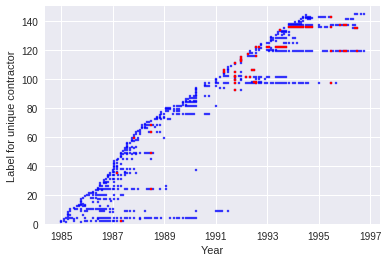

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/12202213.pdf
92 343 5020 3636

# points: 3636  # errors: 92    # unique contractors: 343


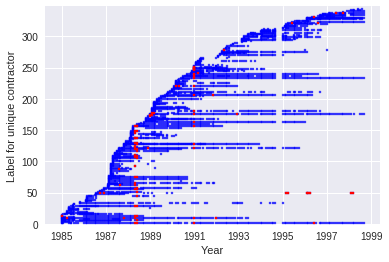

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2322663.pdf
0 1 1703 44
3 22 1915 239
0 4 494 14
19 81 2436 616

# points: 616  # errors: 19    # unique contractors: 81


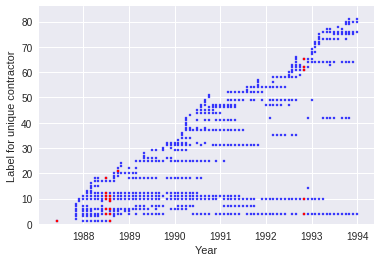

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2392306.pdf
2 10 1309 68
0 15 119 40
1 1 1145 34
0 8 758 42
0 10 364 49
4 2 567 19
1 5 819 60
4 43 2037 246
2 1 454 2
20 41 1856 321

# points: 321  # errors: 20    # unique contractors: 41


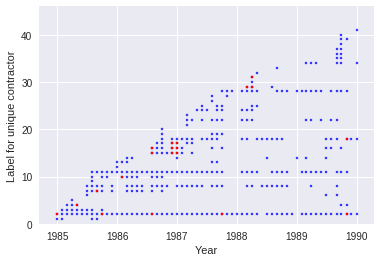

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/116993.pdf
0 7 517 31
238 162 4352 1238

# points: 1238  # errors: 238    # unique contractors: 162


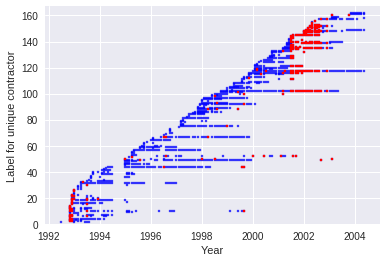

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/12203421.pdf
6 12 1825 136
4 15 880 111
0 1 30 1
0 1 180 2
0 5 696 28
1 2 302 6
1 1 1125 32
3 27 423 158
0 1 515 17
0 1 30 1
0 1 698 7
71 181 2129 1070

# points: 1070  # errors: 71    # unique contractors: 181


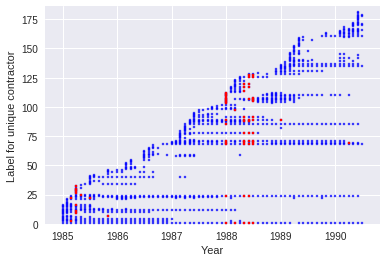

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2304284.pdf
64 52 6358 619

# points: 619  # errors: 64    # unique contractors: 52


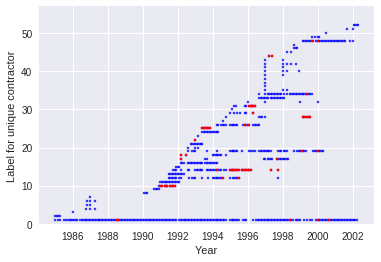

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/9101597.pdf
5 25 1125 253
4 19 2615 241
1 6 729 32
1 1 819 16
2 9 2433 184
167 296 7029 3834

# points: 3834  # errors: 167    # unique contractors: 296


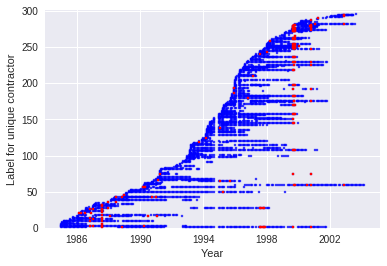

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/117031.pdf
1 1 90 2
12 13 3041 142

# points: 142  # errors: 12    # unique contractors: 13


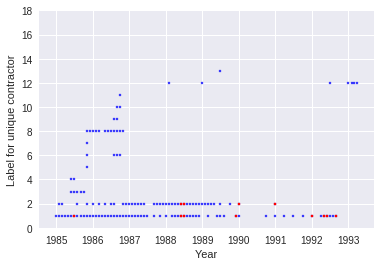

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2308393.pdf
18 114 3467 799

# points: 799  # errors: 18    # unique contractors: 114


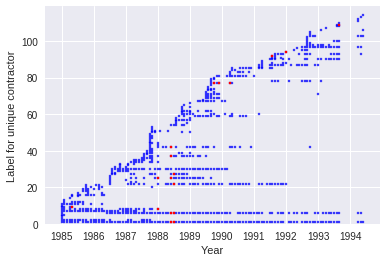

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2300205.pdf
13 36 2344 209

# points: 209  # errors: 13    # unique contractors: 36


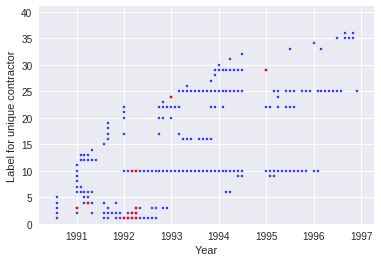

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2398941.pdf
21 9 2160 114

# points: 114  # errors: 21    # unique contractors: 9


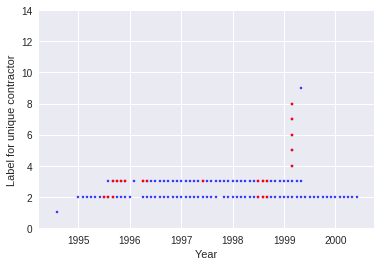

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2103095.pdf
1 5 2069 41
10 17 5143 287

# points: 287  # errors: 10    # unique contractors: 17


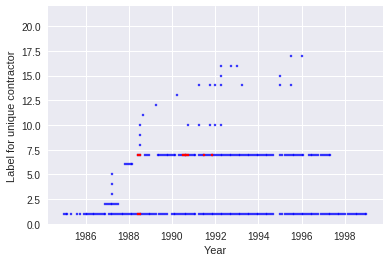

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/6203701.pdf
94 156 7059 1284

# points: 1284  # errors: 94    # unique contractors: 156


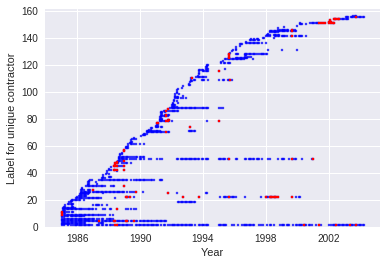

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2318647.pdf
0 1 30 1
0 1 29 1
5 10 5112 165
1 9 484 50
2 10 1063 100
2 4 5477 14
19 29 3376 462

# points: 462  # errors: 19    # unique contractors: 29


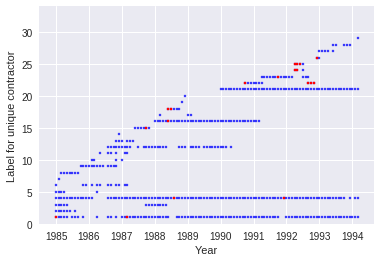

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/117067.pdf
0 3 91 6
3 1 1094 3
5 43 4624 453
3 10 788 98
0 1 196 1
3 16 1033 134
1 1 183 1
1 6 364 7
2 10 639 19
1 8 729 47
3 4 2098 61
0 6 819 42
2 23 1794 217
2 5 1399 22
3 17 2921 130
5 8 2221 84
5 1 5293 146
3 2 7090 98
0 4 152 4
3 12 3735 60
2 1 699 3
0 5 880 73
0 4 1299 116
0 1 21 1
3 31 794 78
0 1 729 2
19 62 5720 548

# points: 548  # errors: 19    # unique contractors: 62


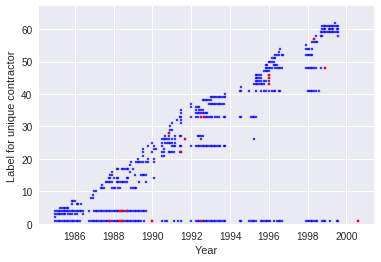

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2322821.pdf
0 10 914 21
9 33 1825 512

# points: 512  # errors: 9    # unique contractors: 33


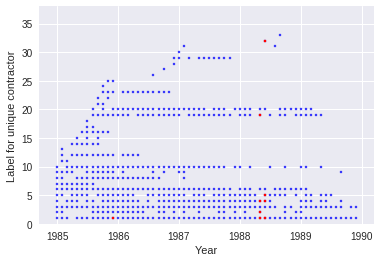

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2306797.pdf
0 1 1459 28
3 3 60 4
7 32 1672 318

# points: 318  # errors: 7    # unique contractors: 32


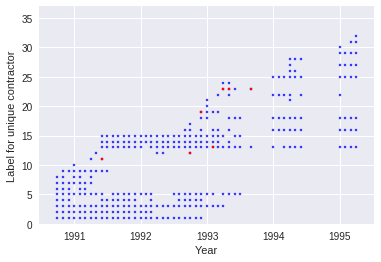

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2398931.pdf
3 33 819 196
4 9 1276 83
0 1 211 6
18 70 3681 746

# points: 746  # errors: 18    # unique contractors: 70


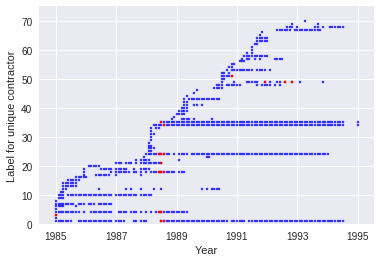

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2317722.pdf
0 1 152 5
33 27 7090 1196

# points: 1196  # errors: 33    # unique contractors: 27


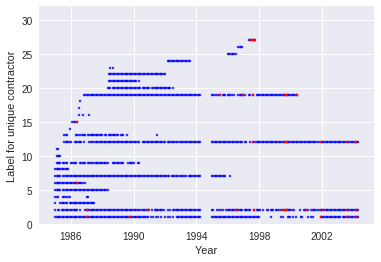

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/102817.pdf
12 93 1675 867

# points: 867  # errors: 12    # unique contractors: 93


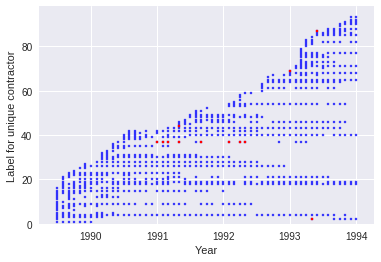

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2396579.pdf
0 16 913 59
0 1 89 1
4 9 1519 138
2 1 2645 65
4 13 424 88
4 7 303 25
1 23 150 49
13 19 2921 172

# points: 172  # errors: 13    # unique contractors: 19


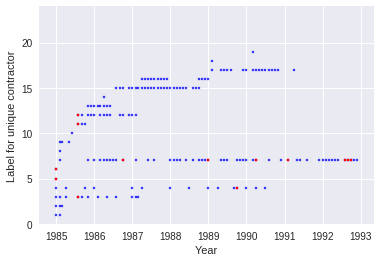

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/111031.pdf
55 167 6662 2654

# points: 2654  # errors: 55    # unique contractors: 167


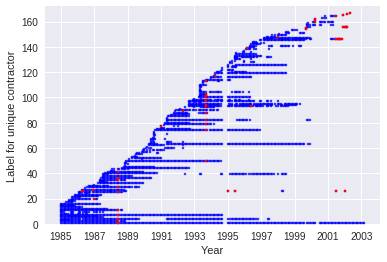

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2304442.pdf
4 8 333 22
0 2 1763 8
0 3 2677 56
6 24 2312 370
7 46 3406 612

# points: 612  # errors: 7    # unique contractors: 46


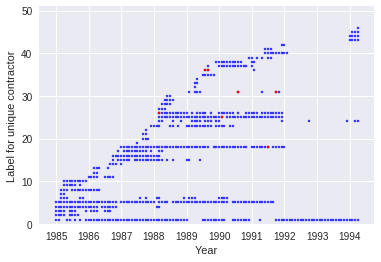

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/111041.pdf
11 23 1611 242

# points: 242  # errors: 11    # unique contractors: 23


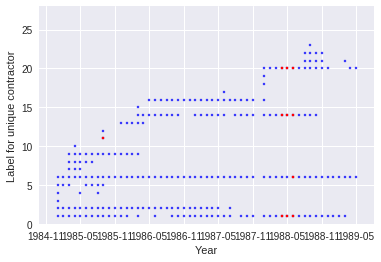

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2303051.pdf
118 137 7059 2393

# points: 2393  # errors: 118    # unique contractors: 137


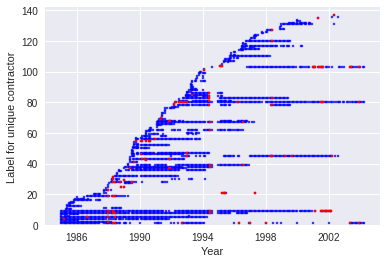

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2300357.pdf
0 1 364 2
16 59 1825 467

# points: 467  # errors: 16    # unique contractors: 59


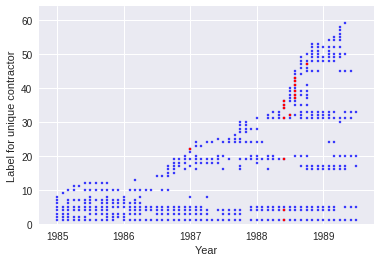

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2302408.pdf
1 1 6 1
12 56 2221 447

# points: 447  # errors: 12    # unique contractors: 56


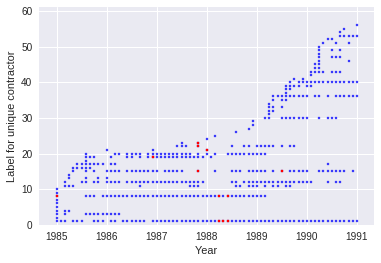

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2302411.pdf
0 6 58 10
2 12 364 30
0 1 150 3
1 4 275 16
15 108 1095 604

# points: 604  # errors: 15    # unique contractors: 108


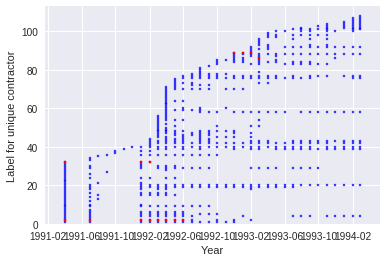

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2361814.pdf
7 42 1094 251

# points: 251  # errors: 7    # unique contractors: 42


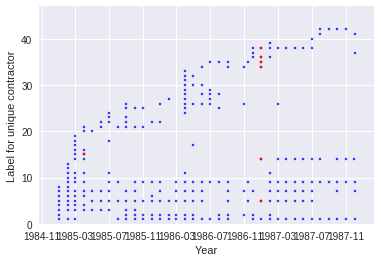

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/10500175.pdf
0 1 365 1
9 35 2556 321

# points: 321  # errors: 9    # unique contractors: 35


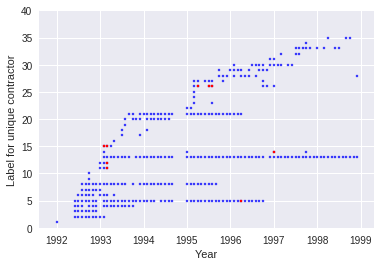

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2365918.pdf
47 85 2921 450

# points: 450  # errors: 47    # unique contractors: 85


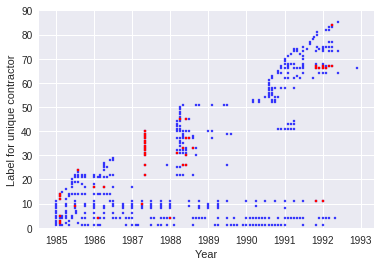

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/10500576.pdf
1 49 364 115
0 1 759 2
4 96 972 383
0 1 637 19
0 1 213 2
0 5 972 77
0 4 303 18
0 2 119 5
0 1 7 1
0 8 1664 40
11 13 1155 138

# points: 138  # errors: 11    # unique contractors: 13


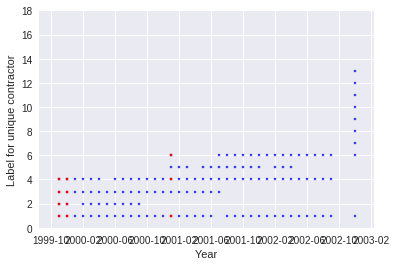

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/260599.pdf
0 1 28 1
2 2 3011 27
3 15 1064 107
0 1 30 1
4 27 1519 132
7 9 1338 105

# points: 105  # errors: 7    # unique contractors: 9


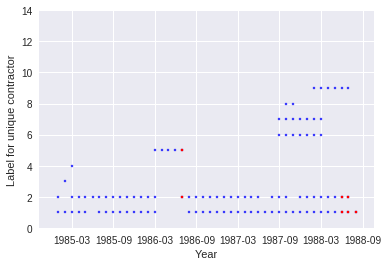

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/6203905.pdf
6 10 152 24
98 74 7059 896

# points: 896  # errors: 98    # unique contractors: 74


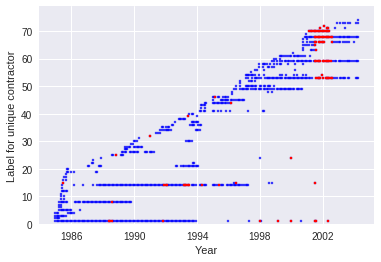

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2306566.pdf
2 2 699 6
14 77 729 227

# points: 227  # errors: 14    # unique contractors: 77


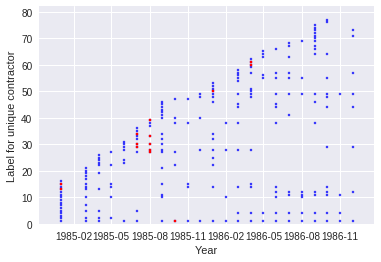

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/10500621.pdf
0 1 21 1
19 95 2190 629

# points: 629  # errors: 19    # unique contractors: 95


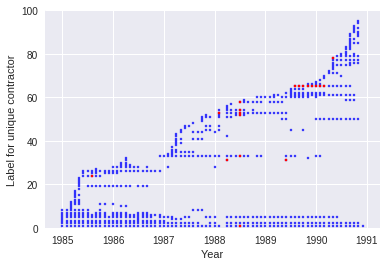

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2314770.pdf
1 1 329 8
0 9 456 16
7 11 3774 109

# points: 109  # errors: 7    # unique contractors: 11


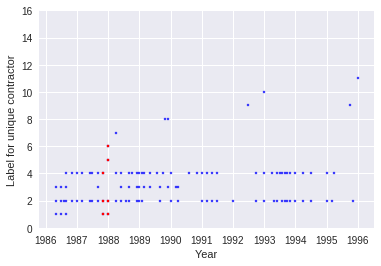

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/510488.pdf
29 193 3743 2224

# points: 2224  # errors: 29    # unique contractors: 193


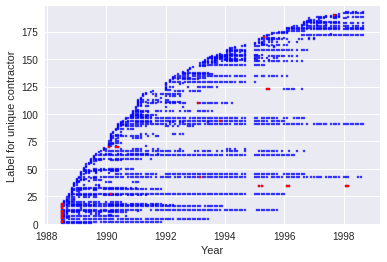

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2394649.pdf
0 1 30 1
0 1 83 1
0 1 30 1
68 33 1550 344

# points: 344  # errors: 68    # unique contractors: 33


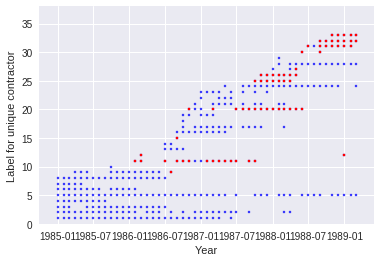

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/104991.pdf
3 5 4261 6
14 14 2707 290

# points: 290  # errors: 14    # unique contractors: 14


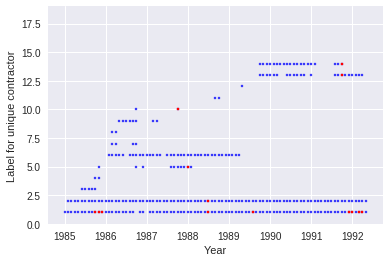

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2300451.pdf
5 9 1884 181
0 3 58 6
115 218 2555 3390

# points: 3390  # errors: 115    # unique contractors: 218


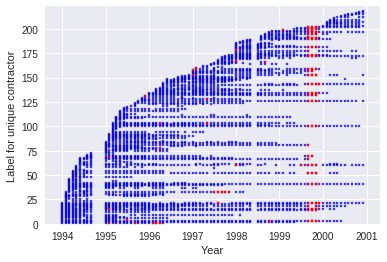

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/152110.pdf
6 24 3255 333
1 1 760 24
0 19 849 129
0 1 668 11
5 103 3165 822
1 1 27 1
0 2 333 20
0 2 395 14
10 56 5051 518

# points: 518  # errors: 10    # unique contractors: 56


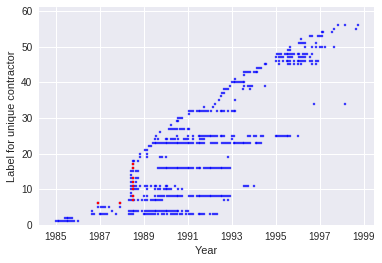

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2306487.pdf
0 2 121 2
1 9 29 9
1 1 365 2
62 117 4259 1699

# points: 1699  # errors: 62    # unique contractors: 117


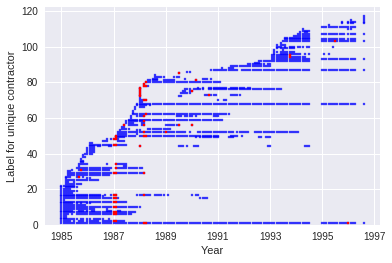

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/10500692.pdf
5 22 3832 262
0 5 1095 14
7 24 637 42

# points: 42  # errors: 7    # unique contractors: 24


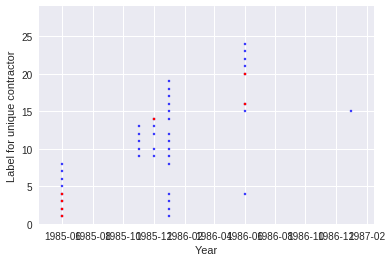

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2325081.pdf
2 2 90 5
7 16 2829 198

# points: 198  # errors: 7    # unique contractors: 16


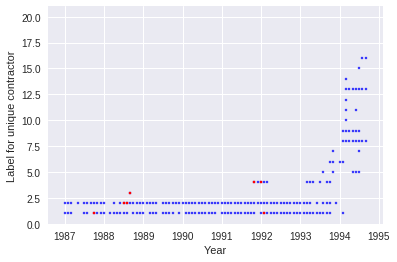

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2390620.pdf
4 21 303 96
0 1 1794 36
1 1 1279 6
0 1 27 1
8 27 1094 140

# points: 140  # errors: 8    # unique contractors: 27


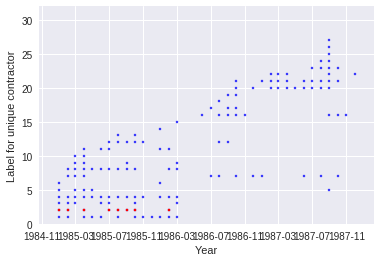

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/115307.pdf
0 1 183 6
10 47 3771 351

# points: 351  # errors: 10    # unique contractors: 47


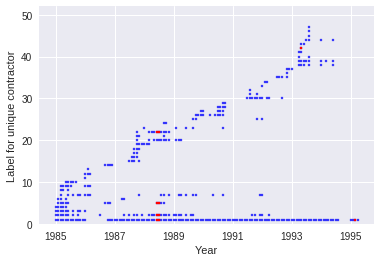

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2306670.pdf
2 1 4777 117
1 14 456 25
0 7 637 73
2 7 454 46
0 3 119 10
0 1 29 1
10 42 2129 402

# points: 402  # errors: 10    # unique contractors: 42


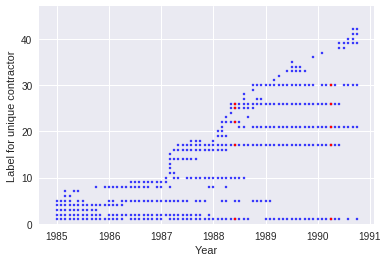

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2300540.pdf
0 1 420 8
5 6 576 53
1 59 668 173
0 1 364 1
2 7 455 36
0 4 1218 14
2 15 2159 191
0 1 364 3
0 5 457 20
30 29 3470 355

# points: 355  # errors: 30    # unique contractors: 29


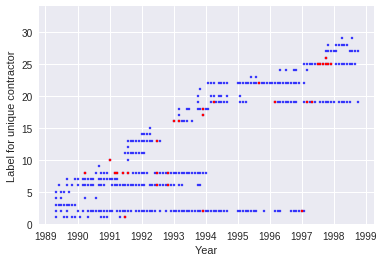

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/151075.pdf
207 174 7059 2212

# points: 2212  # errors: 207    # unique contractors: 174


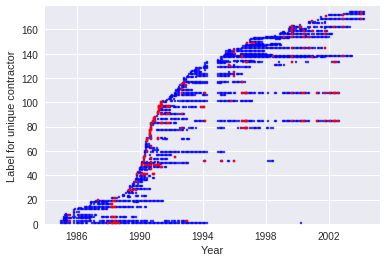

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/9106066.pdf
0 1 243 1
0 2 819 3
4 15 729 97
54 45 1125 282

# points: 282  # errors: 54    # unique contractors: 45


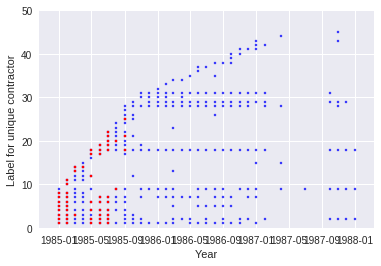

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/10500761.pdf
0 1 7 1
1 21 2251 143
3 26 1611 260
3 14 2615 244
1 2 941 39
10 117 1033 802

# points: 802  # errors: 10    # unique contractors: 117


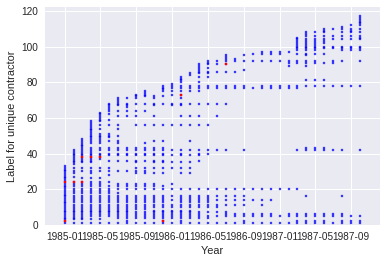

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2308770.pdf
1 4 273 28
1 7 1641 119
7 24 2371 342

# points: 342  # errors: 7    # unique contractors: 24


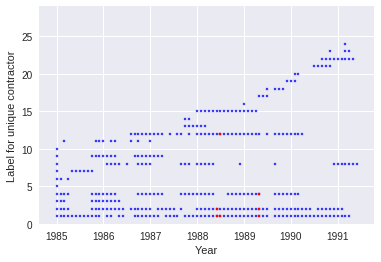

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2316973.pdf
3 30 819 184
5 34 1307 261
2 1 5478 132
16 29 3165 541

# points: 541  # errors: 16    # unique contractors: 29


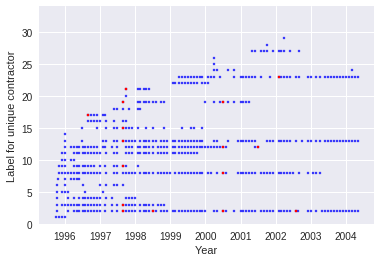

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2366131.pdf
156 360 6998 3665

# points: 3665  # errors: 156    # unique contractors: 360


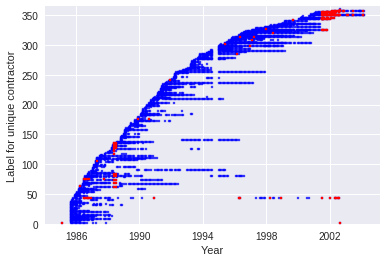

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2325172.pdf
66 121 1641 1238

# points: 1238  # errors: 66    # unique contractors: 121


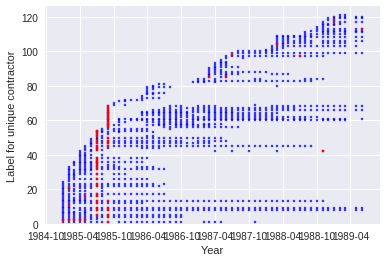

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/107189.pdf
16 33 1938 430

# points: 430  # errors: 16    # unique contractors: 33


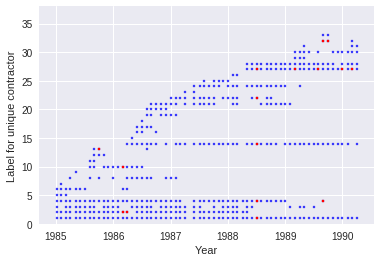

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2301830.pdf
0 6 30 6
2 1 2100 51
28 44 1215 303

# points: 303  # errors: 28    # unique contractors: 44


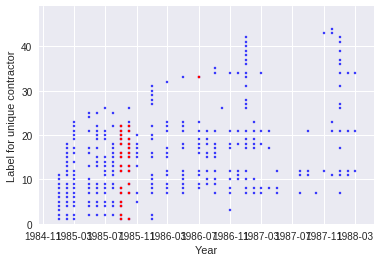

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/504506.pdf
0 1 1915 12
0 1 183 4
0 4 395 45
3 6 910 87
1 18 729 184
52 27 7090 970

# points: 970  # errors: 52    # unique contractors: 27


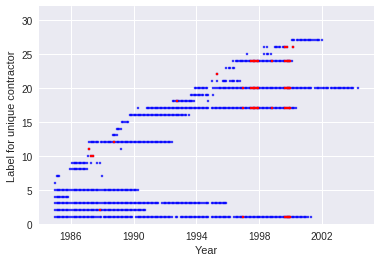

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/101059.pdf
1 2 883 2
0 2 394 2
0 1 362 8
0 1 21 1
1 1 180 1
5 33 1884 195
5 2 1539 115
41 164 3467 944

# points: 944  # errors: 41    # unique contractors: 164


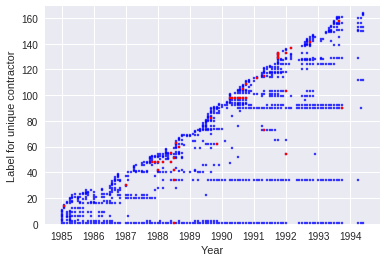

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2306773.pdf
0 3 91 3
1 23 1185 163
1 1 29 1
1 2 1094 33
0 2 30 2
0 5 607 27
0 1 272 5
0 11 1276 69
0 2 181 2
0 1 183 1
1 17 1185 110
4 1 912 4
2 4 1945 83
0 1 114 5
9 14 1186 106

# points: 106  # errors: 9    # unique contractors: 14


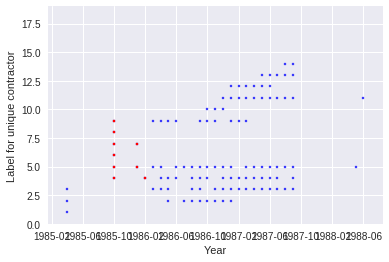

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2003697.pdf
0 3 58 3
19 77 1979 294

# points: 294  # errors: 19    # unique contractors: 77


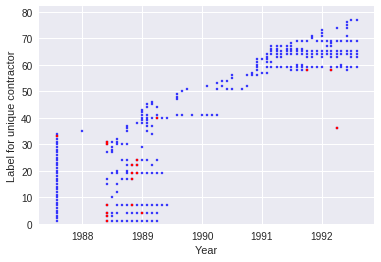

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2394169.pdf
0 3 1734 4
1 2 1057 2
4 35 1580 226
87 64 7029 1334

# points: 1334  # errors: 87    # unique contractors: 64


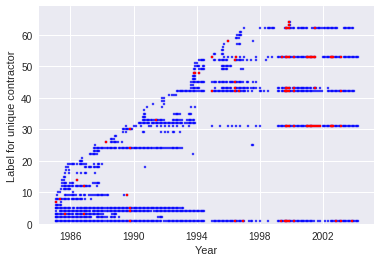

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/207615.pdf
0 55 242 227
23 47 1125 355

# points: 355  # errors: 23    # unique contractors: 47


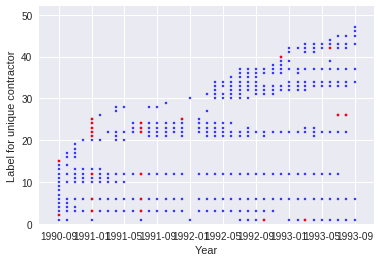

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2396932.pdf
1 3 242 16
0 1 1733 15
37 87 2280 880

# points: 880  # errors: 37    # unique contractors: 87


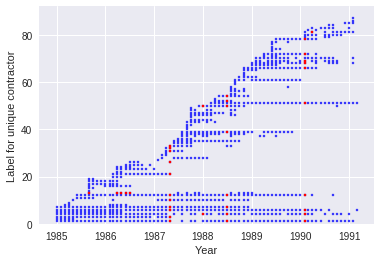

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2302731.pdf
29 56 3345 719

# points: 719  # errors: 29    # unique contractors: 56


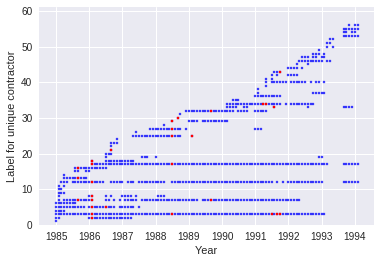

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/101138.pdf
3 15 5355 281
7 1 7029 72
1 6 2064 173
0 5 849 66
1 6 1185 23
20 56 2129 730

# points: 730  # errors: 20    # unique contractors: 56


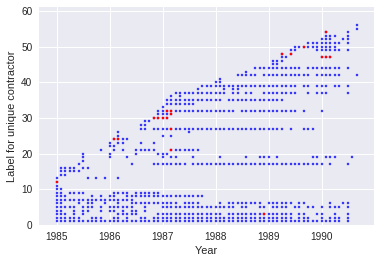

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/115484.pdf
3 35 2921 203
0 2 1703 93
74 164 5081 1956

# points: 1956  # errors: 74    # unique contractors: 164


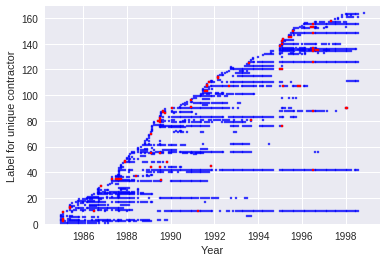

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/207652.pdf
0 1 274 12
1 4 668 57
19 39 2798 677

# points: 677  # errors: 19    # unique contractors: 39


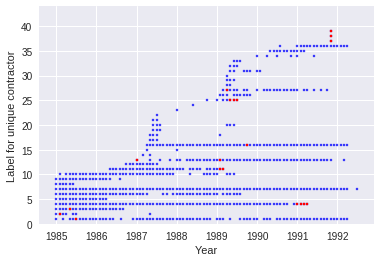

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/101163.pdf
0 5 1200 80
3 53 849 241
11 1 1058 36
1 12 1368 75
0 1 183 1
13 2 2829 89
4 57 1399 559
2 11 1711 114
0 1 548 12
3 53 4260 355
3 4 2586 119
0 1 30 1
4 64 1915 686
0 16 364 81
22 70 1945 230

# points: 230  # errors: 22    # unique contractors: 70


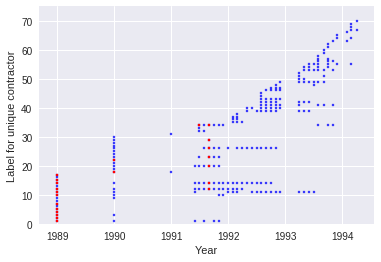

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/12000081.pdf
3 15 1703 161
2 12 1491 130
0 1 364 1
24 46 1825 362

# points: 362  # errors: 24    # unique contractors: 46


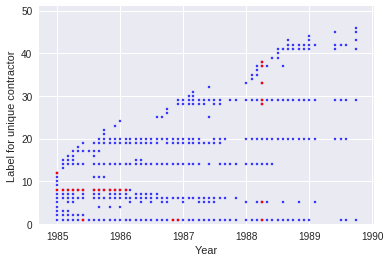

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2311008.pdf
0 6 1197 69
4 1 1033 34
0 2 395 11
0 1 90 3
5 14 2676 258
178 340 5323 3006

# points: 3006  # errors: 178    # unique contractors: 340


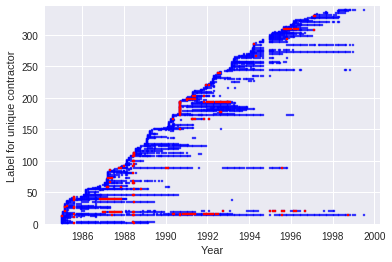

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2300783.pdf
7 41 4504 187

# points: 187  # errors: 7    # unique contractors: 41


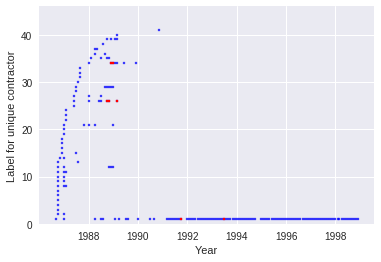

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2003685.pdf
1 6 2221 99
0 6 1393 15
25 23 4351 505

# points: 505  # errors: 25    # unique contractors: 23


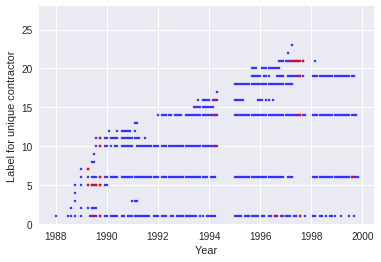

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/150393.pdf
15 42 3924 1153

# points: 1153  # errors: 15    # unique contractors: 42


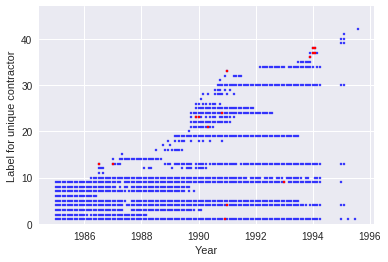

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/105338.pdf
0 2 4565 59
0 1 89 1
0 1 394 13
125 283 4502 3838

# points: 3838  # errors: 125    # unique contractors: 283


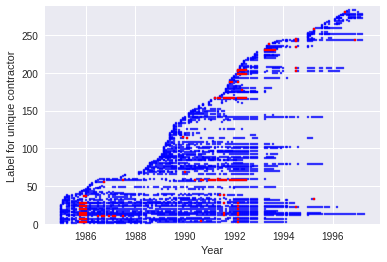

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2100101.pdf
0 7 1522 58
68 173 6969 3583

# points: 3583  # errors: 68    # unique contractors: 173


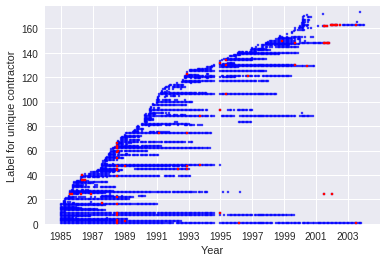

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2303127.pdf
21 45 3620 403

# points: 403  # errors: 21    # unique contractors: 45


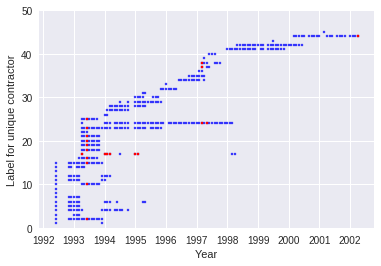

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2363501.pdf
65 60 5629 452

# points: 452  # errors: 65    # unique contractors: 60


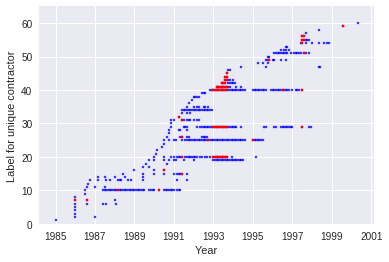

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2100113.pdf
3 1 4285 263
0 4 119 4
0 4 1399 95
10 33 609 138

# points: 138  # errors: 10    # unique contractors: 33


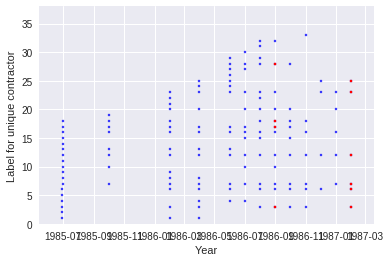

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/506783.pdf
0 6 180 11
19 13 2006 127

# points: 127  # errors: 19    # unique contractors: 13


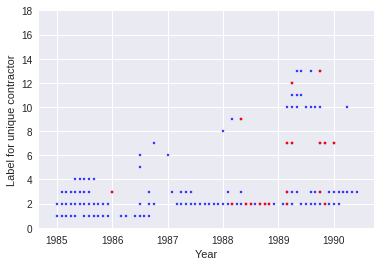

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2317217.pdf
0 2 150 2
0 2 150 5
3 12 975 86
18 34 1825 233

# points: 233  # errors: 18    # unique contractors: 34


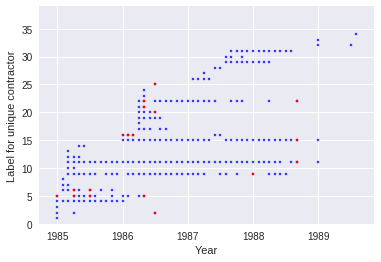

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/113578.pdf
3 2 119 6
0 1 70 2
0 8 121 11
1 9 333 27
0 2 180 3
2 11 2098 60
0 6 149 8
0 2 395 2
2 21 1884 322
6 24 1003 122
50 194 3896 423

# points: 423  # errors: 50    # unique contractors: 194


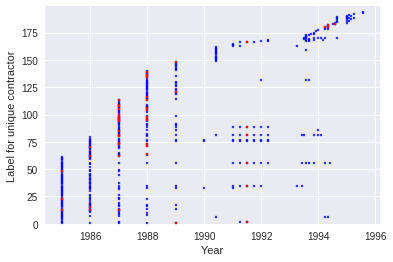

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/508861.pdf
2 2 119 2
2 1 3072 95
0 1 122 4
2 27 2860 136
1 3 58 4
0 1 7 1
0 2 5960 12
2 25 670 64
0 1 181 1
3 29 2280 299
12 174 3317 1663

# points: 1663  # errors: 12    # unique contractors: 174


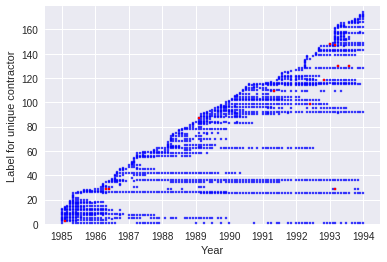

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2304983.pdf
1 1 19 1
5 16 880 61
0 1 30 1
2 6 4382 33
1 1 30 1
30 51 2129 469

# points: 469  # errors: 30    # unique contractors: 51


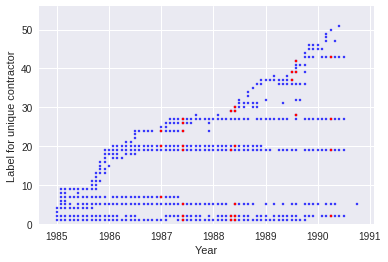

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/10503139.pdf
21 92 4107 776

# points: 776  # errors: 21    # unique contractors: 92


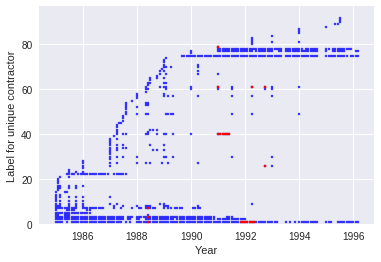

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/10503140.pdf
1 15 485 55
0 1 29 1
8 1 485 9
1 2 943 5
12 3 3102 72
0 1 89 3
2 4 2650 28
9 22 2190 338

# points: 338  # errors: 9    # unique contractors: 22


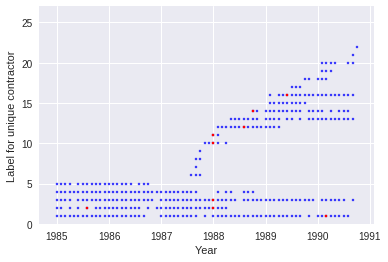

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/107517.pdf
1 1 29 1
1 1 21 1
0 1 30 1
9 47 1794 289

# points: 289  # errors: 9    # unique contractors: 47


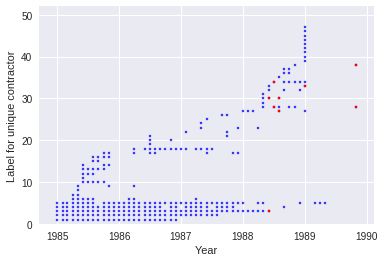

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2300931.pdf
22 11 637 71

# points: 71  # errors: 22    # unique contractors: 11


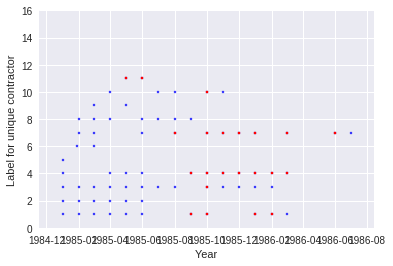

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2100228.pdf
0 10 904 71
2 22 515 78
0 34 819 325
7 7 4137 362

# points: 362  # errors: 7    # unique contractors: 7


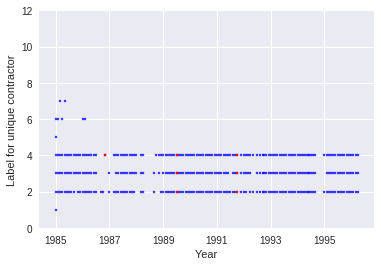

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/601101.pdf
13 16 1522 223

# points: 223  # errors: 13    # unique contractors: 16


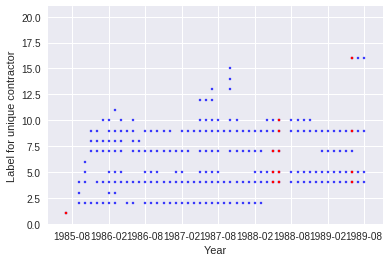

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2325408.pdf
1 16 484 66
2 22 364 96
0 5 89 7
0 1 576 19
6 4 1915 61
0 1 1460 35
138 90 7059 2485

# points: 2485  # errors: 138    # unique contractors: 90


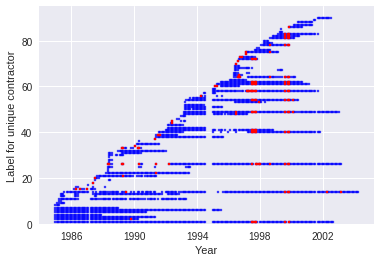

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/105508.pdf
7 17 880 127

# points: 127  # errors: 7    # unique contractors: 17


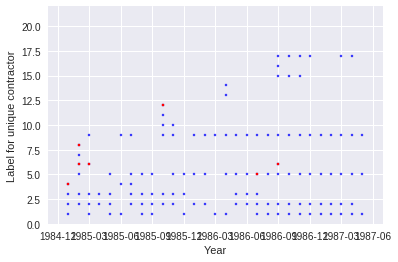

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/105511.pdf
110 39 3072 278

# points: 278  # errors: 110    # unique contractors: 39


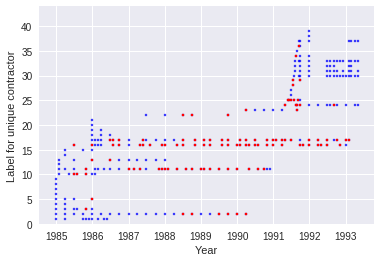

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2100265.pdf
0 3 668 31
28 108 2372 780

# points: 780  # errors: 28    # unique contractors: 108


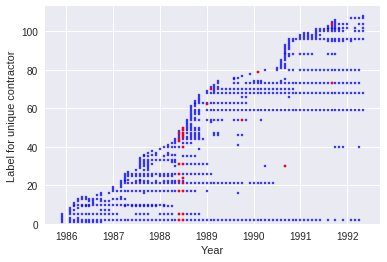

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2325548.pdf
0 12 637 64
0 3 360 16
1 1 29 1
6 51 2280 231
132 398 6389 3895

# points: 3895  # errors: 132    # unique contractors: 398


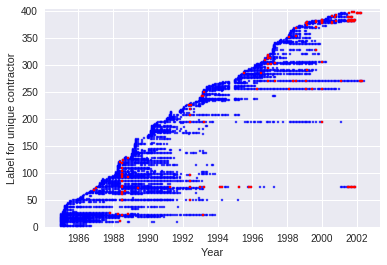

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2309178.pdf
10 6 2121 87

# points: 87  # errors: 10    # unique contractors: 6


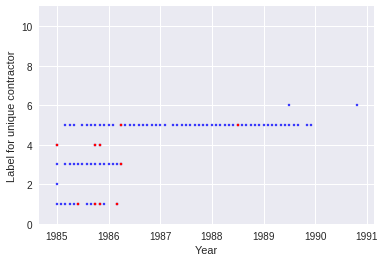

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/601147.pdf
1 2 151 3
5 9 2433 159
0 14 81 26
0 2 454 20
8 5 1276 44

# points: 44  # errors: 8    # unique contractors: 5


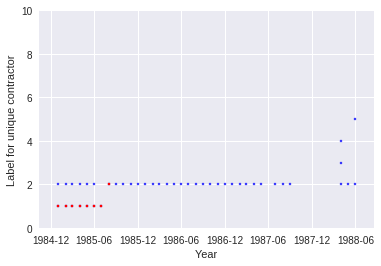

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2001998.pdf
1 1 88 1
21 11 1642 323

# points: 323  # errors: 21    # unique contractors: 11


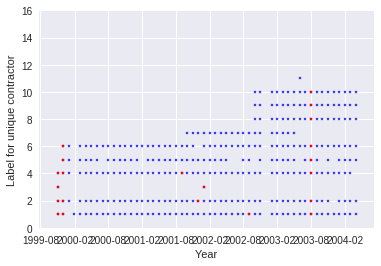

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/153443.pdf
0 7 880 58
12 35 2465 309

# points: 309  # errors: 12    # unique contractors: 35


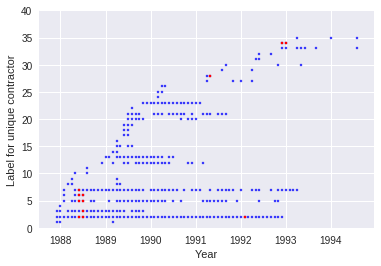

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2393177.pdf
0 2 29 2
2 8 1276 76
33 97 3467 929

# points: 929  # errors: 33    # unique contractors: 97


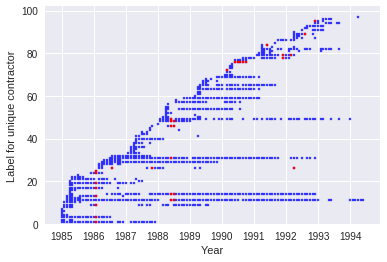

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2321506.pdf
0 2 729 3
0 1 42 1
0 1 21 1
5 31 637 179
14 55 5659 862

# points: 862  # errors: 14    # unique contractors: 55


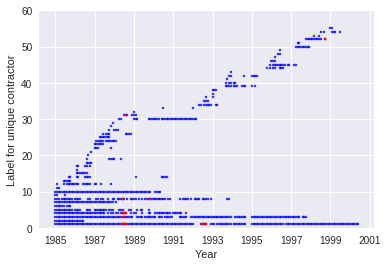

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2301039.pdf
0 1 112 1
0 2 90 2
0 1 6 1
1 25 1276 102
0 2 3131 5
6 2 7029 205
7 13 4412 191

# points: 191  # errors: 7    # unique contractors: 13


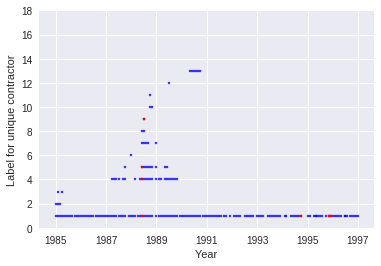

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2301052.pdf
0 1 152 5
0 1 272 4
1 1 871 2
0 3 152 5
3 6 545 75
7 15 819 44

# points: 44  # errors: 7    # unique contractors: 15


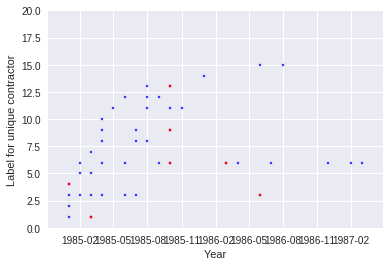

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/115851.pdf
0 1 4017 29
0 7 2006 13
2 10 2859 19
2 2 913 44
7 37 1550 222

# points: 222  # errors: 7    # unique contractors: 37


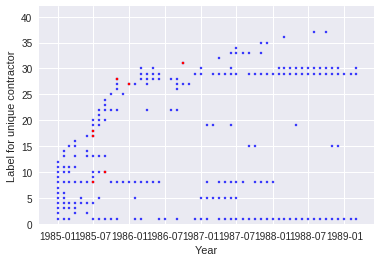

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/113815.pdf
0 2 1825 75
4 17 1125 86
17 188 3743 1920

# points: 1920  # errors: 17    # unique contractors: 188


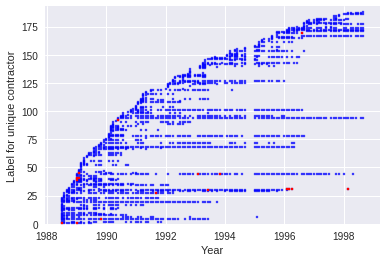

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2394650.pdf
0 8 1979 60
8 4 4676 145
7 42 1063 271

# points: 271  # errors: 7    # unique contractors: 42


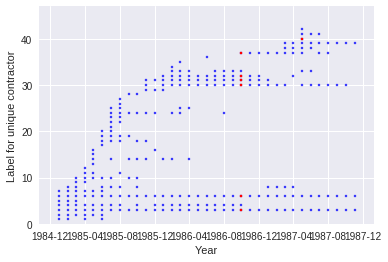

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/113827.pdf
1 16 333 89
17 49 1764 398

# points: 398  # errors: 17    # unique contractors: 49


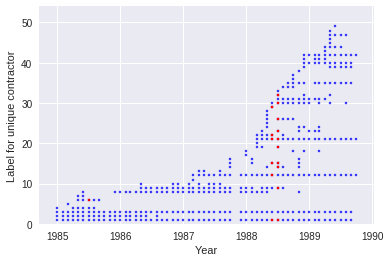

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2315804.pdf
0 1 29 1
9 41 2280 409

# points: 409  # errors: 9    # unique contractors: 41


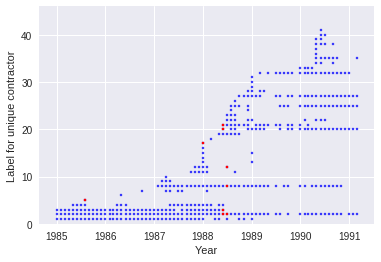

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2313388.pdf
17 31 1825 176

# points: 176  # errors: 17    # unique contractors: 31


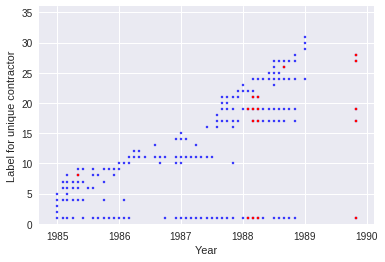

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2305197.pdf
1 1 515 16
0 3 334 23
0 5 1034 11
0 3 454 3
0 55 1978 427
0 1 180 1
25 55 2037 455

# points: 455  # errors: 25    # unique contractors: 55


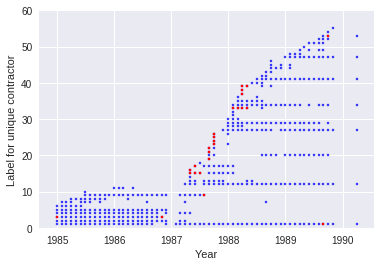

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/109757.pdf
5 34 880 394
0 2 548 3
4 10 698 67
9 55 5508 272

# points: 272  # errors: 9    # unique contractors: 55


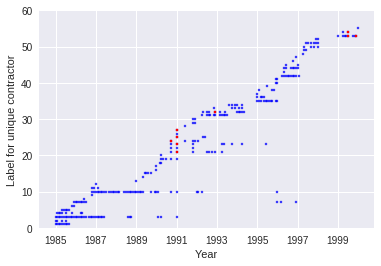

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2303176.pdf
1 1 183 2
5 8 2371 130
0 1 7 1
4 18 1246 257
17 42 3741 389

# points: 389  # errors: 17    # unique contractors: 42


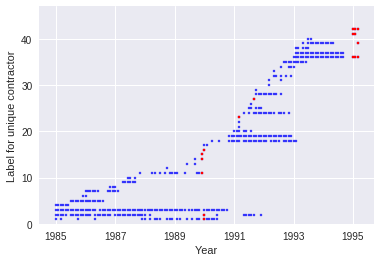

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/406739.pdf
6 18 3741 111
33 80 4231 881

# points: 881  # errors: 33    # unique contractors: 80


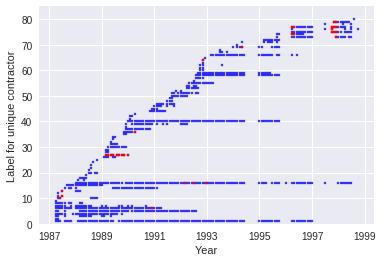

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/150745.pdf
1 1 1971 49
0 7 484 55
0 2 30 2
0 1 4228 68
8 21 2432 190

# points: 190  # errors: 8    # unique contractors: 21


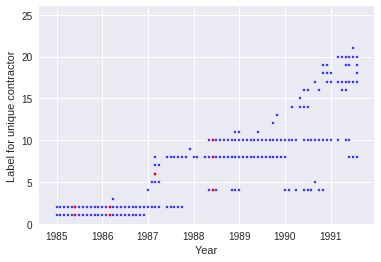

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/113888.pdf
0 1 152 1
15 36 699 192

# points: 192  # errors: 15    # unique contractors: 36


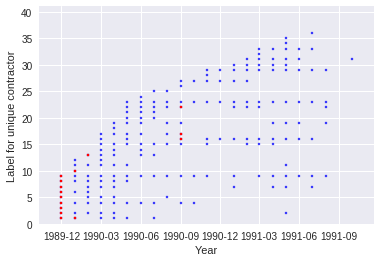

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/12203238.pdf
4 17 791 57
0 3 1211 45
0 1 119 1
7 38 1215 164

# points: 164  # errors: 7    # unique contractors: 38


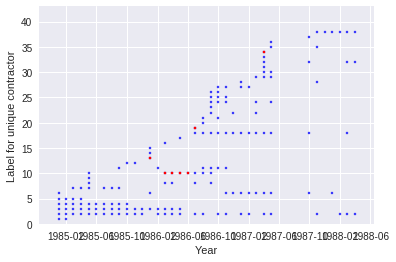

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/103676.pdf
73 177 5020 1382

# points: 1382  # errors: 73    # unique contractors: 177


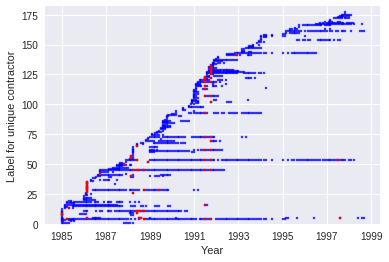

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2323709.pdf
85 132 7090 1133

# points: 1133  # errors: 85    # unique contractors: 132


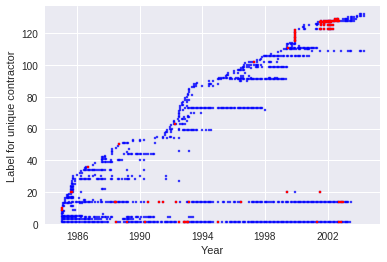

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2307327.pdf
1 1 364 1
0 4 3894 120
0 1 5 1
1 1 29 1
0 1 30 1
1 20 2249 199
37 66 791 202

# points: 202  # errors: 37    # unique contractors: 66


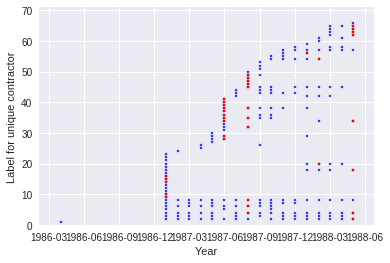

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2391314.pdf
9 12 788 65

# points: 65  # errors: 9    # unique contractors: 12


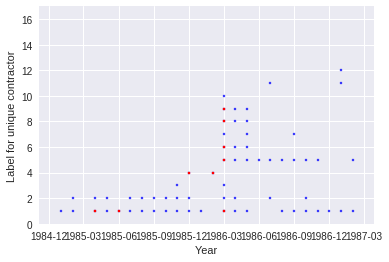

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/115988.pdf
0 2 181 5
9 10 1338 29

# points: 29  # errors: 9    # unique contractors: 10


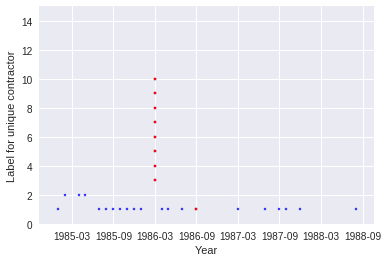

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2323734.pdf
0 3 1368 50
3 1 6997 363
10 41 4716 569

# points: 569  # errors: 10    # unique contractors: 41


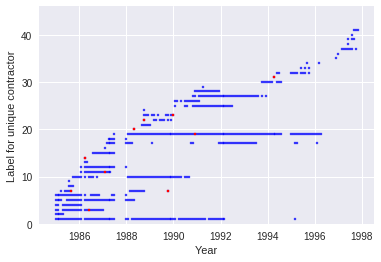

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/202009.pdf
0 14 364 68
0 4 407 24
0 1 91 1
0 1 364 1
9 19 1215 108

# points: 108  # errors: 9    # unique contractors: 19


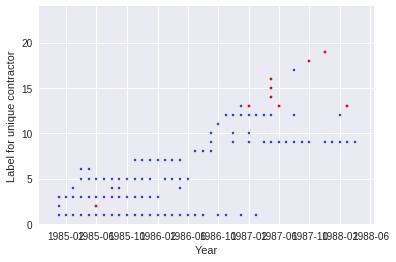

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/105764.pdf
29 52 2006 379

# points: 379  # errors: 29    # unique contractors: 52


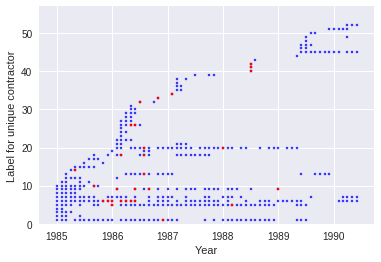

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/109861.pdf
0 1 7 1
0 2 4837 153
0 1 5 1
0 2 213 11
3 11 1399 95
0 4 88 9
5 21 1641 194
0 1 180 6
0 2 2952 2
14 131 3559 1047

# points: 1047  # errors: 14    # unique contractors: 131


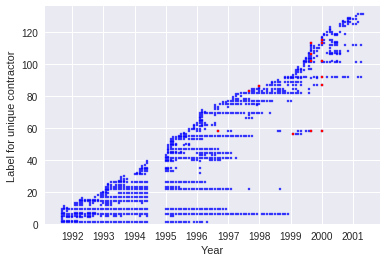

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2399544.pdf
1 7 1583 29
1 1 152 5
1 1 181 1
0 24 2676 336
5 2 2091 5
0 1 545 15
0 1 29 1
45 63 7059 880

# points: 880  # errors: 45    # unique contractors: 63


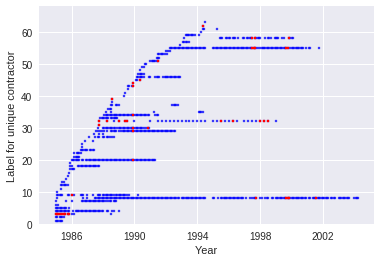

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/107852.pdf
4 19 1399 142
3 4 4168 111
21 70 1825 1063

# points: 1063  # errors: 21    # unique contractors: 70


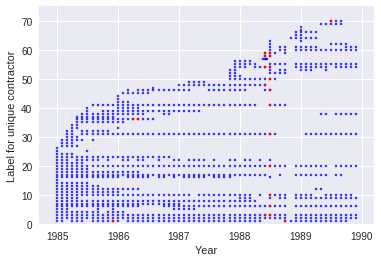

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/19000655.pdf
0 1 28 1
0 5 1368 12
44 134 3710 1251

# points: 1251  # errors: 44    # unique contractors: 134


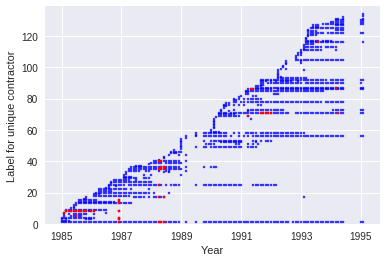

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2305367.pdf
1 11 515 33
2 13 455 56
1 15 548 35
0 1 30 1
0 3 484 21
0 1 630 17
11 11 1399 65

# points: 65  # errors: 11    # unique contractors: 11


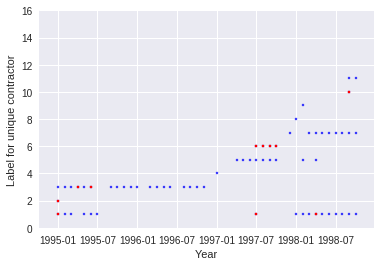

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/152936.pdf
0 1 30 1
0 6 211 16
8 53 2249 262

# points: 262  # errors: 8    # unique contractors: 53


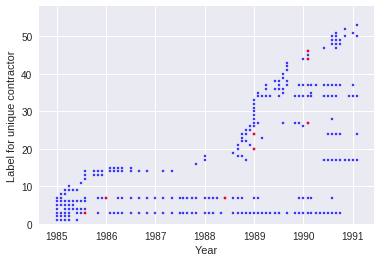

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/501104.pdf
1 2 1582 17
0 2 1401 47
0 1 30 1
0 1 1185 2
99 215 3985 1922

# points: 1922  # errors: 99    # unique contractors: 215


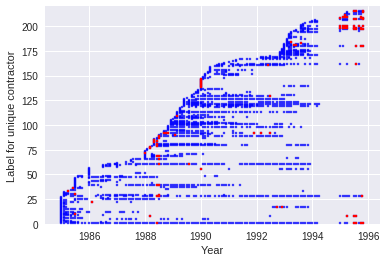

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2311549.pdf
13 76 3041 527

# points: 527  # errors: 13    # unique contractors: 76


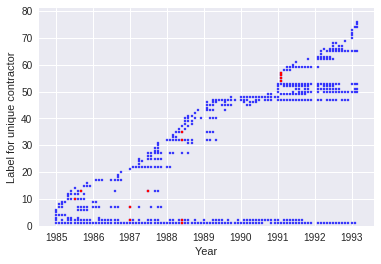

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2307455.pdf
0 1 182 1
0 1 21 1
0 3 644 39
0 2 2890 76
1 26 849 96
5 43 2555 153
0 6 333 28
2 19 3041 98
0 7 516 45
2 4 121 4
22 28 5753 392

# points: 392  # errors: 22    # unique contractors: 28


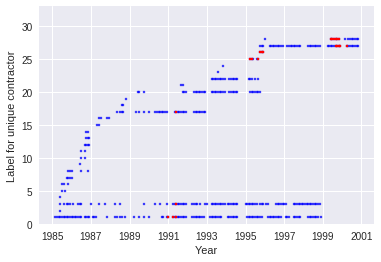

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/202137.pdf
1 17 637 116
2 2 942 2
0 1 71 2
2 21 515 93
1 9 515 21
198 214 7057 2521

# points: 2521  # errors: 198    # unique contractors: 214


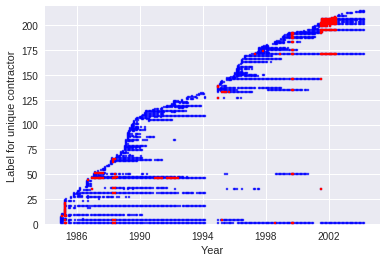

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2303401.pdf
1 1 1611 46
22 10 5781 410

# points: 410  # errors: 22    # unique contractors: 10


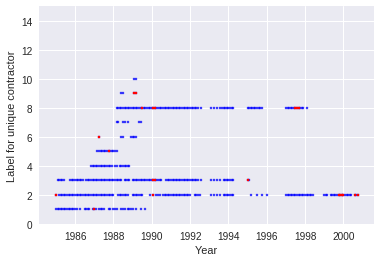

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/113906.pdf
5 6 1945 131
8 13 1338 111

# points: 111  # errors: 8    # unique contractors: 13


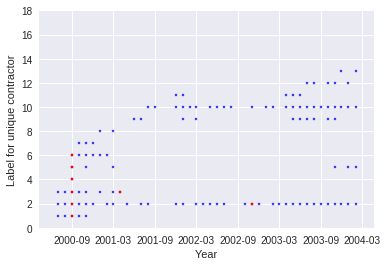

plotted: /home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/2366897.pdf
0 1 847 27
1 2 364 6
23 26 1033 111

# points: 111  # errors: 23    # unique contractors: 26


KeyboardInterrupt: 

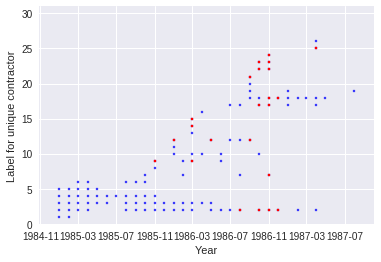

In [152]:
type_company="m"

path_fig='/home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/'
lista=lista_m


if type_company=="c":
    path_fig='/home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Contractors/'
    lista=lista_c

    
for company in lista:

    #ID="101059"      #"2300783"   #"501803"       #"101059"  #"102982"    #"2323709"    #2391375"    #6203152"   #116191"   #113694"  
    #"102982"  #6203152"#504506"  #"101059"  OJO IS ES CONTRACTOR ES "_"+ID Y MANUFACT ES DI+"_"

    
    ID=str(company)
    looking_for=ID+"_" 
    
    if type_company=="c":
        ID=str(company)
        looking_for="_"+ID 
    
       
        
    
    cont=0
    cont_unique_partners=1
    dict_partner_id_cont_partner={}
    list_rows=[]
    list_for_dropping=[]
    partners=[]
    list_days=[]
    list_days_errors=[]

    list_Pinf=[]

    y_values=[]
    y_values_errors=[]

    
    list_dates=[]
    
    
    df_aux=df[df['Mi'] == company]
    
    for index, row in df_aux.iterrows():
        
        if looking_for in row['Mi_Cj']:
            list_rows.append(row)             
            
            
            partner=row['Cj']
            if type_company=="c": 
                partner=row['Mi']
            
            partners.append(partner)  
                                    

            if partner not in dict_partner_id_cont_partner:            
                dict_partner_id_cont_partner[partner]=cont_unique_partners                    
                cont_unique_partners +=1

            initial_date_transaction=row['start_date_trans']
            final_date_transaction=row['end_date_trans']

            list_dates.append(initial_date_transaction)
            list_dates.append(final_date_transaction)
            
            
            #year=int(row['start_date_trans'].split("-")[0])    # example of date:  1985-01-01     
            #month=int(row['start_date_trans'].split("-")[1])       
            #day=int(row['start_date_trans'].split("-")[2])                
            #initial_date_transaction=datetime.datetime(year, month, day)

            list_days.append(initial_date_transaction)
            list_Pinf.append(row['P_inf'])
            y_values.append(dict_partner_id_cont_partner[partner])

            if row['P_inf']==1:
                list_days_errors.append(initial_date_transaction)
                y_values_errors.append(dict_partner_id_cont_partner[partner])



                    #pass#list_for_dropping.append(index)
        else:
            list_for_dropping.append(index)


        cont +=1    

  
    #df.drop(df.index[list_for_dropping])  


    delta_time=(sorted(list_dates)[-1] - sorted(list_dates)[0]).days
    print len(y_values_errors), len(set(partners)), delta_time, len(list_rows)


    if len(y_values_errors) >6 and len(set(partners)) >4  and delta_time > 300  and len(list_rows)>20:
        
        print "\n# points:",len(list_rows)," # errors:",len(list_days_errors), "   # unique contractors:",len(set(partners))
        

        x1 = np.array(list_days)
        y1 = np.array(y_values)

        x2 = np.array(list_days_errors)
        y2 = np.array(y_values_errors)
        #plt.plot(x,y)   this is for plotting a line


        dict_mID_time_series[company]=(x1, y1, x2, y2)
       
        
        
        plt.ylim(0, len(set(partners))+5)

        plt.scatter(x1, y1,color='blue',s=8,alpha=0.7, marker='s')  # s is for size of the dots (i can also pass a list of different sizes, one per point)
        plt.scatter(x2, y2,color='red', s=6.5, marker='s')
        #plt.title(ID)
        
        plt.ylabel('Label for unique contractor')        
        if type_company=="c": 
            plt.ylabel('Label for unique manufacturer')
            
        plt.xlabel('Year')


        fig = plt.gcf()
        fig.savefig(path_fig+ID+'.png', dpi=600)
        plt.show()
        print "plotted:", path_fig+ID+'.pdf'

print "done"




#plt.savefig("test.png",dpi=300)   #fname, dpi=None, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1,frameon=None)
#plt.savefig("mandelbrot.pdf",dpi=300)

In [153]:
pickle_company="/home/juliaponcela/at_NICO/Supply_networks/Results/dict_mID_time_series.pickle"
pickle.dump(dict_mID_time_series, open(pickle_company, 'wb'))
print "written:",pickle_company

len(dict_mID_time_series)

written: /home/juliaponcela/at_NICO/Supply_networks/Results/dict_mID_time_series.pickle


169

In [18]:

font_legend=40
font_axes=60
font_ticks=50
font='Times new roman'



### to get the plotly figure for a selected company

company_type="c"  ## or c






if company_type=="m":
## 2390206   #100389   #10500138   #501803   #207901   #260290   2303401   2311549  19000655   2399544   2323709   150745  109757  2301039   2309178    10503140
    
    
    company= 2398931  #2390620 #2308393  #2390206    ###### 2390206   #  10500138   501803   207901
    x1=dict_mID_time_series[company][0]   # list days
    y1=dict_mID_time_series[company][1]   # list values

    x2=dict_mID_time_series[company][2]
    y2=dict_mID_time_series[company][3]

    
    
    
    
    
    
    
    
    
    
elif company_type=="c":
    
#102660  # 2393359       2003624   #104978      [2364864,  201901,  ]  9100283  
# 2002711  511717   152730   151579    5000055   113335  2306657     2304739

    company= 2304946  #20590538   #2304739         # 2304739  #    2003624   102660   104978
    x1=dict_cID_time_series[company][0]   # list days
    y1=dict_cID_time_series[company][1]   # list values

    x2=dict_cID_time_series[company][2]
    y2=dict_cID_time_series[company][3]

     
    
    
    

trace_high = Scatter(
                x=x1,
                y=y1,
                mode = 'markers',
                name = "transaction",
                marker = dict(
                    size = 20,
                    symbol="circle",
                    color = 'rgba(0,238,118, 1)',                   
                ),
                #line = dict(color = '#17BECF'),
                #opacity = 0.8)
                )
trace_low = Scatter(
                x=x2,
                y=y2,
                mode = 'markers',
                name = "transaction error",
                marker = dict(
                    size = 20,
                    symbol="diamond",
                    color = 'rgba(205,16,118, 1)',                   
                ),
               # line = dict(color = '#7F7F7F'),
               )# opacity = 0.6)

data = [trace_high,trace_low]

layout = dict(
    showlegend=False,
    legend=dict(x=.75, y=.9, # normalized coordenates 0-1
               font=dict(
                    family=font,
                    size=font_legend),
               ),   
    
    margin=Margin(  # if i allow for a margin, then the big axis labels dont overlap with the ticks
        l=150,
        r=50,
        b=150,
        t=0,       
    ),
    #title = "Manually Set Date Range",
    xaxis = dict(
        tickfont=dict(      
            family=font,
            size=font_ticks,
            color='black'
        ),
        #range = ['2016-07-01','2016-12-31'])
        title="Year",
        titlefont=dict(
            family=font,
            size=font_axes,
            color='black'
        #    color='lightgrey'
        ),   
    ),
    
    yaxis = dict(
        #range = ['2016-07-01','2016-12-31'])
        title="Partner's Unique ID",
        titlefont=dict(
            family=font,#family='Arial, sans-serif',
            size=font_axes,
            color='black'
        #    color='lightgrey'
        ),  
        tickfont=dict(      
            family=font,
            size=font_ticks,
            color='black'
        ),
    )
)







# layout = Layout(
#     legend=dict(x=.75, y=.9, # normalized coordenates 0-1
#                font=dict(
#                     family=font,
#                     size=font_legend),
#                ),   
    
#     margin=go.Margin(  # if i allow for a margin, then the big axis labels dont overlap with the ticks
#         l=150,
#         r=50,
#         b=150,
#         t=0,       
#     ),
    
#     paper_bgcolor='rgb(255,255,255)',
#     plot_bgcolor='rgb(224,224,224)',
#     xaxis=XAxis(
#         titlefont=dict(
#             family=font,
#             size=font_axes,
#             color='black'
#         #    color='lightgrey'
#         ),       
#         title='Time [days]',
#         gridcolor='rgb(255,255,255)',
#         range=[1,1600],        
#         showgrid=True,
#         showline=False,
#         showticklabels=True,
#         tickcolor='rgb(127,127,127)',
#         ticks='outside',        
#         tickfont=dict(      
#             family=font,
#             size=font_ticks,
#             color='black'
#         ),
#         zeroline=False
#     ),
#     yaxis=YAxis(
#         title='Survival Rate',
#         titlefont=dict(
#             family=font,#family='Arial, sans-serif',
#             size=font_axes,
#             color='black'
#         #    color='lightgrey'
#         ),  
#         gridcolor='rgb(255,255,255)',
#         showgrid=True,-
#         showline=False,
#         showticklabels=True,
#         tickcolor='rgb(127,127,127)',
#         ticks='outside',
#          tickfont=dict(   
#             family=font,
#             size=font_ticks,
#             color='black'
#         ),
#         zeroline=False
#     ),
# )


















fig = dict(data=data, layout=layout)
iplot(fig, filename = "example_time_series")
#offline.plot(fig, filename='/home/juliaponcela/example_time_series.html')



### i save the figure as html (interactive, that can be open on any browser), and from them i can save as png
offline.plot(fig, auto_open=True, image = 'png', image_filename='/home/juliaponcela/example_time_series' ,
             output_type='file', image_width=1600, image_height=1200, filename='/home/juliaponcela/example_time_series.html', validate=False)


'file:///home/juliaponcela/example_time_series.html'

In [ ]:
#to get the number of errors that happen simultaneously with others
      print "\n# points:",len(list_rows), "   # unique contractors:",len(set(partners))
    print "len_x:",len(list_days), " len_y:", len(y_values),"   for errors len_x:",len(list_days_errors), " len_y:", len(y_values_errors)

dict_ID_m_dict_date_list_errors={}
dict_ID_c_dict_date_list_errors={}
        

for index, row in df.iterrows():
    ID_m=str(row['Mi'])
    ID_c=str(row['Cj'])
   
      
    try:
        dict_ID_m_dict_date_list_errors[ID_m]   
    except:
        dict_ID_m_dict_date_list_errors[ID_m]={}    
        
        
     
    try:
        dict_ID_c_dict_date_list_errors[ID_c]   
    except:
        dict_ID_c_dict_date_list_errors[ID_c]={}    
       
        
        
        
    if row['P_inf']==1:
        
        initial_date_transaction=row['start_date_trans']
        
        try:
            dict_ID_m_dict_date_list_errors[ID_m][initial_date_transaction]
        except:
            dict_ID_m_dict_date_list_errors[ID_m][initial_date_transaction]=[]                        
        dict_ID_m_dict_date_list_errors[ID_m][initial_date_transaction].append(1)

  
        try:
            dict_ID_c_dict_date_list_errors[ID_c][initial_date_transaction]
        except:
            dict_ID_c_dict_date_list_errors[ID_c][initial_date_transaction]=[]                        
        dict_ID_c_dict_date_list_errors[ID_c][initial_date_transaction].append(1)
        
        
                    

  
print "done"    
#     lista=[x for x in list_days_errors if list_days_errors.count(x) == 1]


In [ ]:
type_company="c"  #  "c" or "m"

if type_company=="c":x1 = np.array(list_days)
        y1 = np.array(y_values)

        x2 = np.array(list_days_errors)
        y2 = np.array(y_values_errors)
    lista= lista_c
    dicc=dict_ID_c_dict_date_list_errors
elif type_company=="m":
    lista= lista_m
    dicc=dict_ID_m_dict_date_list_errors

list_jobbers_tot



list_fractions=[]
for company in lista:
    ID=str(company)
    norm=0.
    num_simultaneous_erros=0. df.iloc[222]['Mi']
    for item in sorted(dicc[ID]):
        #print item, dict_ID_dict_date_list_errors[ID][item]
        norm +=len(dicc[ID][item])
        if len(dicc[ID][item]) >1:
            num_simultaneous_erros +=len(dicc[ID][item])        
    try:        
        fract= num_simultaneous_erros/norm
        #print ID,fract
        list_fractions.append(fract)
    except: pass
    
    
    
print "avg fraction of simultaneous errors among", type_company+ ": ",np.mean(list_fractions)  ## for c: 0.0621170626414    ##############  for m: 0.366390814558        


102581

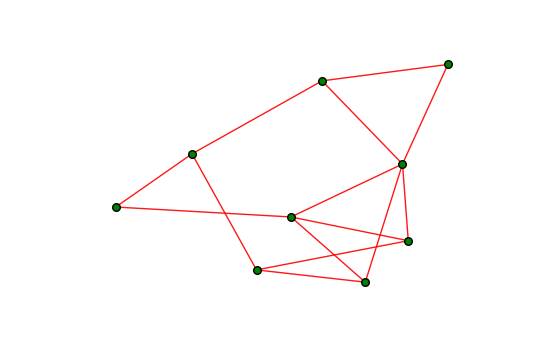

In [182]:
G=nx.Graph()

Nodes=range(9)
G.add_nodes_from(Nodes)
Edges=[(0,1), (0,2), (1,3), (1,4), (1,7), (2,5), (2,8), (3, 4), (3,5),(4,6), (4,7), (4,8), (5,7)]
G.add_edges_from(Edges)
G.add_edge(6,8)
#nx.draw(G, node_color='c',edge_color='k', with_labels=True)


# i can either:
#nx.draw_spring(G,node_size=50,edge_color='b',alpha=.52,font_size=10, scale=.1)

#or:

dict_positions=nx.spring_layout(G)
nx.draw_networkx_edges(G, dict_positions, edgelist=G.edges(), width=1.0, edge_color='r', style='solid', alpha=0.9)#, edge_cmap=None, edge_vmin=None, edge_vmax=None, ax=None, arrows=True, label=None, **kwds)       
        
nx.draw_networkx_nodes(G, dict_positions, nodelist=G.nodes(), node_color='g', node_size=30) #nodelist=None, node_size=300, node_color='r', node_shape='o', alpha=1.0, cmap=None, vmin=None, vmax=None, ax=None, linewidths=None, label=None, **kwds)
limits=plt.axis('off')  # plot network without axis around it



For now i work only with the GC.....
I get the layout for the 1-year acumulated network, but then i plot month by month, preserving the global positions of all nodes.


In [103]:
dict_tuplas={}
for node in dict_node_times_inf:
    #dict_node_times_inf[node]=np.mean(dict_node_times_inf[node])
    #print len(dict_node_times_inf[node]),   np.mean(dict_node_times_inf[node]) 
    dict_tuplas[node]=(np.mean(dict_node_times_inf[node]), len(dict_node_times_inf[node]) )

for w in sorted(dict_tuplas, key=dict_tuplas.get, reverse=True):
       print w, dict_tuplas[w]

113694 (1.0, 42)
2322766 (1.0, 27)
2323308 (1.0, 23)
2325706 (1.0, 23)
2322584 (1.0, 20)
2324374 (1.0, 17)
2320216 (1.0, 16)
204626 (1.0, 15)
2324210 (1.0, 15)
2325411 (1.0, 14)
508861 (1.0, 14)
2322134 (1.0, 14)
2324234 (1.0, 14)
2324775 (1.0, 11)
2324799 (1.0, 11)
2390474 (1.0, 11)
2390838 (1.0, 11)
2305677 (1.0, 11)
2300011 (1.0, 10)
2325354 (1.0, 10)
2389939 (1.0, 10)
2320253 (1.0, 9)
2323497 (1.0, 8)
2324039 (1.0, 8)
2301908 (1.0, 8)
2390152 (1.0, 7)
2323667 (1.0, 7)
2325755 (1.0, 7)
2389265 (1.0, 7)
2324283 (1.0, 7)
2322641 (1.0, 6)
2319470 (1.0, 6)
2390735 (1.0, 6)
2325238 (1.0, 6)
2320538 (1.0, 6)
2389061 (1.0, 6)
2323591 (1.0, 6)
2389150 (1.0, 6)
110036 (1.0, 6)
2323941 (1.0, 6)
2303516 (1.0, 6)
2315920 (1.0, 6)
2314150 (1.0, 6)
2319071 (1.0, 5)
2323163 (1.0, 5)
2315014 (1.0, 5)
2325317 (1.0, 5)
2300904 (1.0, 5)
2323564 (1.0, 5)
2391156 (1.0, 5)
2362685 (1.0, 5)
2319639 (1.0, 5)
2322808 (1.0, 5)
2390051 (1.0, 4)
2324489 (1.0, 4)
2325536 (1.0, 4)
2306426 (1.0, 4)
2366038 (1.0, 

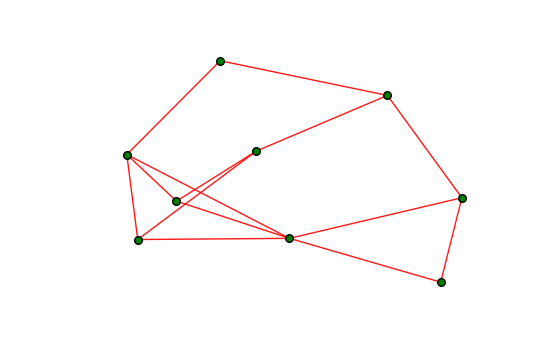

In [190]:
###### for testing
G=nx.Graph()
Nodes=range(9)
G.add_nodes_from(Nodes)
Edges=[(0,1), (0,2), (1,3), (1,4), (1,7), (2,5), (2,8), (3, 4), (3,5),(4,6), (4,7), (4,8), (5,7)]
G.add_edges_from(Edges)
G.add_edge(6,8)
dict_positions=nx.spring_layout(G)


nx.draw_networkx_edges(G, dict_positions, edgelist=G.edges(), width=1.0, edge_color='r', style='solid', alpha=0.9)#, edge_cmap=None, edge_vmin=None, edge_vmax=None, ax=None, arrows=True, label=None, **kwds)       
        
nx.draw_networkx_nodes(G, dict_positions, nodelist=G.nodes(), node_color='g', node_size=30) #nodelist=None, node_size=300, node_color='r', node_shape='o', alpha=1.0, cmap=None, vmin=None, vmax=None, ax=None, linewidths=None, label=None, **kwds)
limits=plt.axis('off')  # plot network without axis around it
